In [1]:
import torch

def train_mod(modelo, name,val_seed=0, val_l=None,val_kernel='rbf'):

    #track time and memory
    torch.cuda.reset_max_memory_allocated()
    initial_memory = torch.cuda.max_memory_allocated()
    starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)        
    starter.record()
    
    if modelo=='lbanp' or modelo=='isanp' or modelo=='isanp2':
        %run gp.py --mode train --expid {name} --model {modelo} --eval_kernel {val_kernel} --train_seed {val_seed} --eval_seed {val_seed} --num_latents {val_l}
    else:
        %run gp.py --mode train --expid {name} --model {modelo} --eval_kernel {val_kernel} --train_seed {val_seed} --eval_seed {val_seed} 
    
    ender.record()
    torch.cuda.synchronize()
    curr_time = starter.elapsed_time(ender)
    #print('Batches: ', len(eval_batches))
    print("Execution time:", curr_time, "miliseconds")
    print("Execution time:", curr_time/1000, "seconds")

    #track time and memory
    final_memory = torch.cuda.max_memory_allocated()
    print("Initial Memory Usage:", initial_memory / (1024 ** 2), "MB")
    print("Final Memory Usage:", final_memory / (1024 ** 2), "MB")
    print("Memory Usage Change:", (final_memory - initial_memory) / (1024 ** 2), "MB")

In [11]:
#%run gp.py --mode train --expid lbanp-num_latents-8 --model lbanp --num_latents 8

Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
generating evaluation sets...
Generating Evaluation Sets with rbf kernel


100%|##########| 3000/3000 [00:04<00:00, 690.87it/s]
Experiment: lbanp-lbanp-num_latents-8
Total number of parameters: 784834

lbanp:lbanp-num_latents-8 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7252 loss 0.7252 (7.637 secs)
lbanp:lbanp-num_latents-8 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6560 loss 0.6560 (8.977 secs)
lbanp:lbanp-num_latents-8 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5769 loss 0.5769 (8.376 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5675 loss 0.5675 (8.035 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4814 loss 0.4814 (7.399 secs)
lbanp:lbanp-num_latents-8 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4298 loss 0.4298 (8.416 secs)
lbanp:lbanp-num_latents-8 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2346 loss 0.2346 (7.836 secs)
lbanp:lbanp-num_latents-8 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2048 loss 0.2048 (8.345 secs)
lbanp:lbanp-num_latents-8 step 1800 lr 4.996e-04 [train_loss]

In [1]:
#!pip install einops

## Warm-up

In [2]:
train_mod('np', 'warmup',val_seed=0, val_l=None,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: np-warmup
Total number of parameters: 232194



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


np:warmup step 200 lr 5.000e-04 [train_loss] loss 0.6588 (3.013 secs)


KeyboardInterrupt: 

Execution time: 6501.6025390625 miliseconds
Execution time: 6.5016025390625 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 32.8037109375 MB
Memory Usage Change: 32.8037109375 MB


# RBF Models

In [2]:
train_mod(modelo='isanp', name='isanp-num_latents-8_rbf_0',val_seed=0, val_l=8,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-8_rbf_0
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-8_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6915 loss 0.6915 (7.297 secs)
isanp:isanp-num_latents-8_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6330 loss 0.6330 (9.376 secs)
isanp:isanp-num_latents-8_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5263 loss 0.5263 (9.791 secs)
isanp:isanp-num_latents-8_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.4680 loss 0.4680 (8.179 secs)
isanp:isanp-num_latents-8_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3958 loss 0.3958 (7.821 secs)
isanp:isanp-num_latents-8_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3140 loss 0.3140 (7.915 secs)
isanp:isanp-num_latents-8_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.1633 loss 0.1633 (8.307 secs)
isanp:isanp-num_latents-8_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1452 loss 0.1452 (9.681 secs)
isanp:isanp-num_latents-8_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0902 loss 0.0902 (7.749 secs)
isanp:isanp-num_latents-8_rbf_0 

Execution time: 6467538.5 miliseconds
Execution time: 6467.5385 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.13623046875 MB
Memory Usage Change: 55.13623046875 MB


## ISANP (16)

In [2]:
train_mod(modelo='isanp', name='isanp-num_latents-16_rbf_0',val_seed=0, val_l=16,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-16_rbf_0
Total number of parameters: 786114



Overriding argument num_latents: 16
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


isanp:isanp-num_latents-16_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7092 loss 0.7092 (15.546 secs)
isanp:isanp-num_latents-16_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6594 loss 0.6594 (14.265 secs)
isanp:isanp-num_latents-16_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5512 loss 0.5512 (14.902 secs)
isanp:isanp-num_latents-16_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.4883 loss 0.4883 (13.838 secs)
isanp:isanp-num_latents-16_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4234 loss 0.4234 (13.342 secs)
isanp:isanp-num_latents-16_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3483 loss 0.3483 (14.153 secs)
isanp:isanp-num_latents-16_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.1743 loss 0.1743 (15.307 secs)
isanp:isanp-num_latents-16_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1579 loss 0.1579 (14.406 secs)
isanp:isanp-num_latents-16_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0658 loss 0.0658 (14.624 secs)
isanp:isanp-nu

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 29.66it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 0.8365 loss -0.8365 (0.045 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 5200 lr 4.967e-04 [train_loss] tar_ll 0.4844 loss -0.4844 (15.661 secs)
isanp:isanp-num_latents-16_rbf_0 step 5400 lr 4.964e-04 [train_loss] tar_ll 0.3200 loss -0.3200 (14.800 secs)
isanp:isanp-num_latents-16_rbf_0 step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4406 loss -0.4406 (13.997 secs)
isanp:isanp-num_latents-16_rbf_0 step 5800 lr 4.959e-04 [train_loss] tar_ll 0.4929 loss -0.4929 (14.112 secs)
isanp:isanp-num_latents-16_rbf_0 step 6000 lr 4.956e-04 [train_loss] tar_ll 0.4934 loss -0.4934 (13.920 secs)
isanp:isanp-num_latents-16_rbf_0 step 6200 lr 4.953e-04 [train_loss] tar_ll 0.5822 loss -0.5822 (14.053 secs)
isanp:isanp-num_latents-16_rbf_0 step 6400 lr 4.950e-04 [train_loss] tar_ll 0.5345 loss -0.5345 (13.876 secs)
isanp:isanp-num_latents-16_rbf_0 step 6600 lr 4.946e-04 [train_loss] tar_ll 0.5255 loss -0.5255 (13.951 secs)
isanp:isanp-num_latents-16_rbf_0 step 6800 lr 4.943e-04 [train_loss] tar_ll 0.5486 loss -0.5486 (15.830 secs)
isanp:isan

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.12it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.1919 loss -1.1919 (0.032 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 10200 lr 4.873e-04 [train_loss] tar_ll 0.8300 loss -0.8300 (14.009 secs)
isanp:isanp-num_latents-16_rbf_0 step 10400 lr 4.868e-04 [train_loss] tar_ll 0.7087 loss -0.7087 (13.964 secs)
isanp:isanp-num_latents-16_rbf_0 step 10600 lr 4.863e-04 [train_loss] tar_ll 0.6584 loss -0.6584 (14.043 secs)
isanp:isanp-num_latents-16_rbf_0 step 10800 lr 4.857e-04 [train_loss] tar_ll 0.6212 loss -0.6212 (14.066 secs)
isanp:isanp-num_latents-16_rbf_0 step 11000 lr 4.852e-04 [train_loss] tar_ll 0.7042 loss -0.7042 (14.224 secs)
isanp:isanp-num_latents-16_rbf_0 step 11200 lr 4.847e-04 [train_loss] tar_ll 0.7022 loss -0.7022 (14.728 secs)
isanp:isanp-num_latents-16_rbf_0 step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6945 loss -0.6945 (14.094 secs)
isanp:isanp-num_latents-16_rbf_0 step 11600 lr 4.836e-04 [train_loss] tar_ll 0.6858 loss -0.6858 (13.953 secs)
isanp:isanp-num_latents-16_rbf_0 step 11800 lr 4.830e-04 [train_loss] tar_ll 0.7226 loss -0.7226 (13.725 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.74it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.0139 loss -1.0139 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 15200 lr 4.720e-04 [train_loss] tar_ll 0.7751 loss -0.7751 (14.218 secs)
isanp:isanp-num_latents-16_rbf_0 step 15400 lr 4.713e-04 [train_loss] tar_ll 0.8029 loss -0.8029 (14.013 secs)
isanp:isanp-num_latents-16_rbf_0 step 15600 lr 4.706e-04 [train_loss] tar_ll 0.7571 loss -0.7571 (13.844 secs)
isanp:isanp-num_latents-16_rbf_0 step 15800 lr 4.698e-04 [train_loss] tar_ll 0.8116 loss -0.8116 (13.868 secs)
isanp:isanp-num_latents-16_rbf_0 step 16000 lr 4.691e-04 [train_loss] tar_ll 0.7873 loss -0.7873 (13.937 secs)
isanp:isanp-num_latents-16_rbf_0 step 16200 lr 4.683e-04 [train_loss] tar_ll 0.8384 loss -0.8384 (14.139 secs)
isanp:isanp-num_latents-16_rbf_0 step 16400 lr 4.675e-04 [train_loss] tar_ll 0.6243 loss -0.6243 (13.844 secs)
isanp:isanp-num_latents-16_rbf_0 step 16600 lr 4.668e-04 [train_loss] tar_ll 0.7746 loss -0.7746 (13.809 secs)
isanp:isanp-num_latents-16_rbf_0 step 16800 lr 4.660e-04 [train_loss] tar_ll 0.8939 loss -0.8939 (13.751 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.14it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.1932 loss -1.1932 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 20200 lr 4.513e-04 [train_loss] tar_ll 0.7866 loss -0.7866 (14.032 secs)
isanp:isanp-num_latents-16_rbf_0 step 20400 lr 4.504e-04 [train_loss] tar_ll 0.8444 loss -0.8444 (13.954 secs)
isanp:isanp-num_latents-16_rbf_0 step 20600 lr 4.494e-04 [train_loss] tar_ll 0.8802 loss -0.8802 (14.227 secs)
isanp:isanp-num_latents-16_rbf_0 step 20800 lr 4.485e-04 [train_loss] tar_ll 0.8161 loss -0.8161 (14.079 secs)
isanp:isanp-num_latents-16_rbf_0 step 21000 lr 4.475e-04 [train_loss] tar_ll 0.8057 loss -0.8057 (14.261 secs)
isanp:isanp-num_latents-16_rbf_0 step 21200 lr 4.466e-04 [train_loss] tar_ll 0.8618 loss -0.8618 (14.408 secs)
isanp:isanp-num_latents-16_rbf_0 step 21400 lr 4.456e-04 [train_loss] tar_ll 0.7930 loss -0.7930 (14.152 secs)
isanp:isanp-num_latents-16_rbf_0 step 21600 lr 4.446e-04 [train_loss] tar_ll 0.8833 loss -0.8833 (13.990 secs)
isanp:isanp-num_latents-16_rbf_0 step 21800 lr 4.436e-04 [train_loss] tar_ll 0.9079 loss -0.9079 (13.923 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.86it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.5426 loss -1.5426 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 25200 lr 4.257e-04 [train_loss] tar_ll 0.9487 loss -0.9487 (14.188 secs)
isanp:isanp-num_latents-16_rbf_0 step 25400 lr 4.245e-04 [train_loss] tar_ll 0.9517 loss -0.9517 (13.884 secs)
isanp:isanp-num_latents-16_rbf_0 step 25600 lr 4.234e-04 [train_loss] tar_ll 0.9309 loss -0.9309 (13.914 secs)
isanp:isanp-num_latents-16_rbf_0 step 25800 lr 4.223e-04 [train_loss] tar_ll 0.9057 loss -0.9057 (13.949 secs)
isanp:isanp-num_latents-16_rbf_0 step 26000 lr 4.211e-04 [train_loss] tar_ll 0.8704 loss -0.8704 (14.161 secs)
isanp:isanp-num_latents-16_rbf_0 step 26200 lr 4.200e-04 [train_loss] tar_ll 0.8801 loss -0.8801 (14.101 secs)
isanp:isanp-num_latents-16_rbf_0 step 26400 lr 4.188e-04 [train_loss] tar_ll 0.9356 loss -0.9356 (13.715 secs)
isanp:isanp-num_latents-16_rbf_0 step 26600 lr 4.177e-04 [train_loss] tar_ll 0.9560 loss -0.9560 (13.946 secs)
isanp:isanp-num_latents-16_rbf_0 step 26800 lr 4.165e-04 [train_loss] tar_ll 0.8690 loss -0.8690 (13.928 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 32.21it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.7242 loss -1.7242 (0.035 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 30200 lr 3.957e-04 [train_loss] tar_ll 1.0086 loss -1.0086 (13.997 secs)
isanp:isanp-num_latents-16_rbf_0 step 30400 lr 3.944e-04 [train_loss] tar_ll 1.0428 loss -1.0428 (13.855 secs)
isanp:isanp-num_latents-16_rbf_0 step 30600 lr 3.931e-04 [train_loss] tar_ll 0.9803 loss -0.9803 (13.967 secs)
isanp:isanp-num_latents-16_rbf_0 step 30800 lr 3.918e-04 [train_loss] tar_ll 0.9641 loss -0.9641 (14.100 secs)
isanp:isanp-num_latents-16_rbf_0 step 31000 lr 3.905e-04 [train_loss] tar_ll 0.9068 loss -0.9068 (13.818 secs)
isanp:isanp-num_latents-16_rbf_0 step 31200 lr 3.892e-04 [train_loss] tar_ll 0.9880 loss -0.9880 (14.395 secs)
isanp:isanp-num_latents-16_rbf_0 step 31400 lr 3.879e-04 [train_loss] tar_ll 0.9626 loss -0.9626 (14.030 secs)
isanp:isanp-num_latents-16_rbf_0 step 31600 lr 3.866e-04 [train_loss] tar_ll 0.8926 loss -0.8926 (14.060 secs)
isanp:isanp-num_latents-16_rbf_0 step 31800 lr 3.853e-04 [train_loss] tar_ll 0.9391 loss -0.9391 (13.890 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 39.70it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.4844 loss -1.4844 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 35200 lr 3.621e-04 [train_loss] tar_ll 0.9924 loss -0.9924 (14.248 secs)
isanp:isanp-num_latents-16_rbf_0 step 35400 lr 3.607e-04 [train_loss] tar_ll 0.9750 loss -0.9750 (14.214 secs)
isanp:isanp-num_latents-16_rbf_0 step 35600 lr 3.593e-04 [train_loss] tar_ll 1.0189 loss -1.0189 (13.975 secs)
isanp:isanp-num_latents-16_rbf_0 step 35800 lr 3.579e-04 [train_loss] tar_ll 1.0899 loss -1.0899 (13.720 secs)
isanp:isanp-num_latents-16_rbf_0 step 36000 lr 3.564e-04 [train_loss] tar_ll 1.0264 loss -1.0264 (13.960 secs)
isanp:isanp-num_latents-16_rbf_0 step 36200 lr 3.550e-04 [train_loss] tar_ll 1.0735 loss -1.0735 (14.101 secs)
isanp:isanp-num_latents-16_rbf_0 step 36400 lr 3.536e-04 [train_loss] tar_ll 0.8333 loss -0.8333 (14.173 secs)
isanp:isanp-num_latents-16_rbf_0 step 36600 lr 3.522e-04 [train_loss] tar_ll 0.8321 loss -0.8321 (14.015 secs)
isanp:isanp-num_latents-16_rbf_0 step 36800 lr 3.507e-04 [train_loss] tar_ll 1.0109 loss -1.0109 (14.093 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.21it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.8384 loss -1.8384 (0.031 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 40200 lr 3.258e-04 [train_loss] tar_ll 1.0644 loss -1.0644 (14.008 secs)
isanp:isanp-num_latents-16_rbf_0 step 40400 lr 3.243e-04 [train_loss] tar_ll 0.9993 loss -0.9993 (13.860 secs)
isanp:isanp-num_latents-16_rbf_0 step 40600 lr 3.228e-04 [train_loss] tar_ll 1.0479 loss -1.0479 (13.643 secs)
isanp:isanp-num_latents-16_rbf_0 step 40800 lr 3.213e-04 [train_loss] tar_ll 0.9563 loss -0.9563 (13.935 secs)
isanp:isanp-num_latents-16_rbf_0 step 41000 lr 3.197e-04 [train_loss] tar_ll 1.0814 loss -1.0814 (13.990 secs)
isanp:isanp-num_latents-16_rbf_0 step 41200 lr 3.182e-04 [train_loss] tar_ll 1.0537 loss -1.0537 (14.174 secs)
isanp:isanp-num_latents-16_rbf_0 step 41400 lr 3.167e-04 [train_loss] tar_ll 1.0120 loss -1.0120 (14.162 secs)
isanp:isanp-num_latents-16_rbf_0 step 41600 lr 3.152e-04 [train_loss] tar_ll 0.9960 loss -0.9960 (14.283 secs)
isanp:isanp-num_latents-16_rbf_0 step 41800 lr 3.137e-04 [train_loss] tar_ll 0.9561 loss -0.9561 (14.073 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.27it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.6653 loss -1.6653 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 45200 lr 2.876e-04 [train_loss] tar_ll 1.1331 loss -1.1331 (14.365 secs)
isanp:isanp-num_latents-16_rbf_0 step 45400 lr 2.860e-04 [train_loss] tar_ll 1.0728 loss -1.0728 (13.945 secs)
isanp:isanp-num_latents-16_rbf_0 step 45600 lr 2.844e-04 [train_loss] tar_ll 1.0976 loss -1.0976 (14.228 secs)
isanp:isanp-num_latents-16_rbf_0 step 45800 lr 2.829e-04 [train_loss] tar_ll 1.0922 loss -1.0922 (14.162 secs)
isanp:isanp-num_latents-16_rbf_0 step 46000 lr 2.813e-04 [train_loss] tar_ll 1.0220 loss -1.0220 (14.253 secs)
isanp:isanp-num_latents-16_rbf_0 step 46200 lr 2.798e-04 [train_loss] tar_ll 1.0887 loss -1.0887 (14.096 secs)
isanp:isanp-num_latents-16_rbf_0 step 46400 lr 2.782e-04 [train_loss] tar_ll 1.1367 loss -1.1367 (13.815 secs)
isanp:isanp-num_latents-16_rbf_0 step 46600 lr 2.767e-04 [train_loss] tar_ll 1.1502 loss -1.1502 (13.957 secs)
isanp:isanp-num_latents-16_rbf_0 step 46800 lr 2.751e-04 [train_loss] tar_ll 1.1849 loss -1.1849 (14.083 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 36.68it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.9020 loss -1.9020 (0.032 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 50200 lr 2.484e-04 [train_loss] tar_ll 1.0722 loss -1.0722 (13.922 secs)
isanp:isanp-num_latents-16_rbf_0 step 50400 lr 2.469e-04 [train_loss] tar_ll 1.0614 loss -1.0614 (13.859 secs)
isanp:isanp-num_latents-16_rbf_0 step 50600 lr 2.453e-04 [train_loss] tar_ll 1.1301 loss -1.1301 (14.055 secs)
isanp:isanp-num_latents-16_rbf_0 step 50800 lr 2.437e-04 [train_loss] tar_ll 1.1254 loss -1.1254 (13.690 secs)
isanp:isanp-num_latents-16_rbf_0 step 51000 lr 2.421e-04 [train_loss] tar_ll 1.1286 loss -1.1286 (13.748 secs)
isanp:isanp-num_latents-16_rbf_0 step 51200 lr 2.406e-04 [train_loss] tar_ll 1.0797 loss -1.0797 (14.222 secs)
isanp:isanp-num_latents-16_rbf_0 step 51400 lr 2.390e-04 [train_loss] tar_ll 1.1077 loss -1.1077 (14.060 secs)
isanp:isanp-num_latents-16_rbf_0 step 51600 lr 2.374e-04 [train_loss] tar_ll 1.1398 loss -1.1398 (14.130 secs)
isanp:isanp-num_latents-16_rbf_0 step 51800 lr 2.359e-04 [train_loss] tar_ll 1.1054 loss -1.1054 (14.230 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 53.06it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.8778 loss -1.8778 (0.026 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 55200 lr 2.093e-04 [train_loss] tar_ll 1.1681 loss -1.1681 (14.051 secs)
isanp:isanp-num_latents-16_rbf_0 step 55400 lr 2.078e-04 [train_loss] tar_ll 1.1717 loss -1.1717 (14.016 secs)
isanp:isanp-num_latents-16_rbf_0 step 55600 lr 2.062e-04 [train_loss] tar_ll 1.1426 loss -1.1426 (13.994 secs)
isanp:isanp-num_latents-16_rbf_0 step 55800 lr 2.047e-04 [train_loss] tar_ll 1.1123 loss -1.1123 (13.877 secs)
isanp:isanp-num_latents-16_rbf_0 step 56000 lr 2.032e-04 [train_loss] tar_ll 1.1248 loss -1.1248 (14.015 secs)
isanp:isanp-num_latents-16_rbf_0 step 56200 lr 2.016e-04 [train_loss] tar_ll 1.1522 loss -1.1522 (14.369 secs)
isanp:isanp-num_latents-16_rbf_0 step 56400 lr 2.001e-04 [train_loss] tar_ll 1.2703 loss -1.2703 (13.966 secs)
isanp:isanp-num_latents-16_rbf_0 step 56600 lr 1.985e-04 [train_loss] tar_ll 1.2548 loss -1.2548 (13.916 secs)
isanp:isanp-num_latents-16_rbf_0 step 56800 lr 1.970e-04 [train_loss] tar_ll 1.1635 loss -1.1635 (13.717 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.43it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.0124 loss -2.0124 (0.031 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 60200 lr 1.713e-04 [train_loss] tar_ll 1.2319 loss -1.2319 (13.956 secs)
isanp:isanp-num_latents-16_rbf_0 step 60400 lr 1.698e-04 [train_loss] tar_ll 1.1038 loss -1.1038 (14.154 secs)
isanp:isanp-num_latents-16_rbf_0 step 60600 lr 1.683e-04 [train_loss] tar_ll 1.1863 loss -1.1863 (14.007 secs)
isanp:isanp-num_latents-16_rbf_0 step 60800 lr 1.668e-04 [train_loss] tar_ll 1.2461 loss -1.2461 (13.913 secs)
isanp:isanp-num_latents-16_rbf_0 step 61000 lr 1.653e-04 [train_loss] tar_ll 1.2441 loss -1.2441 (13.963 secs)
isanp:isanp-num_latents-16_rbf_0 step 61200 lr 1.638e-04 [train_loss] tar_ll 1.1087 loss -1.1087 (14.160 secs)
isanp:isanp-num_latents-16_rbf_0 step 61400 lr 1.624e-04 [train_loss] tar_ll 1.2628 loss -1.2628 (13.990 secs)
isanp:isanp-num_latents-16_rbf_0 step 61600 lr 1.609e-04 [train_loss] tar_ll 1.2520 loss -1.2520 (14.055 secs)
isanp:isanp-num_latents-16_rbf_0 step 61800 lr 1.594e-04 [train_loss] tar_ll 1.0859 loss -1.0859 (13.902 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.62it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.0149 loss -2.0149 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 65200 lr 1.351e-04 [train_loss] tar_ll 1.1532 loss -1.1532 (14.089 secs)
isanp:isanp-num_latents-16_rbf_0 step 65400 lr 1.337e-04 [train_loss] tar_ll 1.2465 loss -1.2465 (14.268 secs)
isanp:isanp-num_latents-16_rbf_0 step 65600 lr 1.323e-04 [train_loss] tar_ll 1.2211 loss -1.2211 (14.236 secs)
isanp:isanp-num_latents-16_rbf_0 step 65800 lr 1.309e-04 [train_loss] tar_ll 1.2531 loss -1.2531 (14.105 secs)
isanp:isanp-num_latents-16_rbf_0 step 66000 lr 1.296e-04 [train_loss] tar_ll 1.1600 loss -1.1600 (14.082 secs)
isanp:isanp-num_latents-16_rbf_0 step 66200 lr 1.282e-04 [train_loss] tar_ll 1.2066 loss -1.2066 (14.185 secs)
isanp:isanp-num_latents-16_rbf_0 step 66400 lr 1.268e-04 [train_loss] tar_ll 1.2315 loss -1.2315 (13.927 secs)
isanp:isanp-num_latents-16_rbf_0 step 66600 lr 1.255e-04 [train_loss] tar_ll 1.1574 loss -1.1574 (14.052 secs)
isanp:isanp-num_latents-16_rbf_0 step 66800 lr 1.241e-04 [train_loss] tar_ll 1.2058 loss -1.2058 (13.750 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 47.29it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.1739 loss -2.1739 (0.027 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 70200 lr 1.018e-04 [train_loss] tar_ll 1.1087 loss -1.1087 (14.042 secs)
isanp:isanp-num_latents-16_rbf_0 step 70400 lr 1.005e-04 [train_loss] tar_ll 1.3129 loss -1.3129 (13.969 secs)
isanp:isanp-num_latents-16_rbf_0 step 70600 lr 9.927e-05 [train_loss] tar_ll 1.2913 loss -1.2913 (13.810 secs)
isanp:isanp-num_latents-16_rbf_0 step 70800 lr 9.802e-05 [train_loss] tar_ll 1.1913 loss -1.1913 (14.144 secs)
isanp:isanp-num_latents-16_rbf_0 step 71000 lr 9.677e-05 [train_loss] tar_ll 1.3313 loss -1.3313 (13.827 secs)
isanp:isanp-num_latents-16_rbf_0 step 71200 lr 9.554e-05 [train_loss] tar_ll 1.2288 loss -1.2288 (13.936 secs)
isanp:isanp-num_latents-16_rbf_0 step 71400 lr 9.430e-05 [train_loss] tar_ll 1.3174 loss -1.3174 (13.810 secs)
isanp:isanp-num_latents-16_rbf_0 step 71600 lr 9.308e-05 [train_loss] tar_ll 1.2390 loss -1.2390 (13.774 secs)
isanp:isanp-num_latents-16_rbf_0 step 71800 lr 9.186e-05 [train_loss] tar_ll 1.2704 loss -1.2704 (13.750 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 44.22it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.2081 loss -2.2081 (0.026 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 75200 lr 7.212e-05 [train_loss] tar_ll 1.2572 loss -1.2572 (13.973 secs)
isanp:isanp-num_latents-16_rbf_0 step 75400 lr 7.102e-05 [train_loss] tar_ll 1.2552 loss -1.2552 (13.901 secs)
isanp:isanp-num_latents-16_rbf_0 step 75600 lr 6.992e-05 [train_loss] tar_ll 1.3331 loss -1.3331 (14.190 secs)
isanp:isanp-num_latents-16_rbf_0 step 75800 lr 6.884e-05 [train_loss] tar_ll 1.3093 loss -1.3093 (14.154 secs)
isanp:isanp-num_latents-16_rbf_0 step 76000 lr 6.776e-05 [train_loss] tar_ll 1.2964 loss -1.2964 (14.037 secs)
isanp:isanp-num_latents-16_rbf_0 step 76200 lr 6.669e-05 [train_loss] tar_ll 1.3017 loss -1.3017 (14.087 secs)
isanp:isanp-num_latents-16_rbf_0 step 76400 lr 6.562e-05 [train_loss] tar_ll 1.2882 loss -1.2882 (14.015 secs)
isanp:isanp-num_latents-16_rbf_0 step 76600 lr 6.456e-05 [train_loss] tar_ll 1.3150 loss -1.3150 (14.207 secs)
isanp:isanp-num_latents-16_rbf_0 step 76800 lr 6.351e-05 [train_loss] tar_ll 1.2490 loss -1.2490 (13.862 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 47.08it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.2817 loss -2.2817 (0.024 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 80200 lr 4.683e-05 [train_loss] tar_ll 1.3872 loss -1.3872 (14.338 secs)
isanp:isanp-num_latents-16_rbf_0 step 80400 lr 4.592e-05 [train_loss] tar_ll 1.2610 loss -1.2610 (13.829 secs)
isanp:isanp-num_latents-16_rbf_0 step 80600 lr 4.501e-05 [train_loss] tar_ll 1.2831 loss -1.2831 (13.886 secs)
isanp:isanp-num_latents-16_rbf_0 step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2255 loss -1.2255 (13.849 secs)
isanp:isanp-num_latents-16_rbf_0 step 81000 lr 4.323e-05 [train_loss] tar_ll 1.3455 loss -1.3455 (14.294 secs)
isanp:isanp-num_latents-16_rbf_0 step 81200 lr 4.235e-05 [train_loss] tar_ll 1.2986 loss -1.2986 (14.257 secs)
isanp:isanp-num_latents-16_rbf_0 step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2375 loss -1.2375 (13.921 secs)
isanp:isanp-num_latents-16_rbf_0 step 81600 lr 4.062e-05 [train_loss] tar_ll 1.3145 loss -1.3145 (13.933 secs)
isanp:isanp-num_latents-16_rbf_0 step 81800 lr 3.976e-05 [train_loss] tar_ll 1.4121 loss -1.4121 (13.727 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 40.90it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3201 loss -2.3201 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 85200 lr 2.654e-05 [train_loss] tar_ll 1.3502 loss -1.3502 (14.137 secs)
isanp:isanp-num_latents-16_rbf_0 step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2841 loss -1.2841 (13.878 secs)
isanp:isanp-num_latents-16_rbf_0 step 85600 lr 2.515e-05 [train_loss] tar_ll 1.3580 loss -1.3580 (14.075 secs)
isanp:isanp-num_latents-16_rbf_0 step 85800 lr 2.447e-05 [train_loss] tar_ll 1.4232 loss -1.4232 (13.941 secs)
isanp:isanp-num_latents-16_rbf_0 step 86000 lr 2.379e-05 [train_loss] tar_ll 1.3088 loss -1.3088 (14.037 secs)
isanp:isanp-num_latents-16_rbf_0 step 86200 lr 2.313e-05 [train_loss] tar_ll 1.3351 loss -1.3351 (14.304 secs)
isanp:isanp-num_latents-16_rbf_0 step 86400 lr 2.247e-05 [train_loss] tar_ll 1.4090 loss -1.4090 (14.063 secs)
isanp:isanp-num_latents-16_rbf_0 step 86600 lr 2.183e-05 [train_loss] tar_ll 1.3003 loss -1.3003 (14.076 secs)
isanp:isanp-num_latents-16_rbf_0 step 86800 lr 2.119e-05 [train_loss] tar_ll 1.1931 loss -1.1931 (13.770 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 47.97it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3312 loss -2.3312 (0.025 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 90200 lr 1.176e-05 [train_loss] tar_ll 1.3895 loss -1.3895 (14.195 secs)
isanp:isanp-num_latents-16_rbf_0 step 90400 lr 1.128e-05 [train_loss] tar_ll 1.3079 loss -1.3079 (13.867 secs)
isanp:isanp-num_latents-16_rbf_0 step 90600 lr 1.082e-05 [train_loss] tar_ll 1.3671 loss -1.3671 (14.004 secs)
isanp:isanp-num_latents-16_rbf_0 step 90800 lr 1.037e-05 [train_loss] tar_ll 1.3858 loss -1.3858 (13.907 secs)
isanp:isanp-num_latents-16_rbf_0 step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2832 loss -1.2832 (13.834 secs)
isanp:isanp-num_latents-16_rbf_0 step 91200 lr 9.493e-06 [train_loss] tar_ll 1.2819 loss -1.2819 (14.268 secs)
isanp:isanp-num_latents-16_rbf_0 step 91400 lr 9.069e-06 [train_loss] tar_ll 1.2821 loss -1.2821 (14.136 secs)
isanp:isanp-num_latents-16_rbf_0 step 91600 lr 8.655e-06 [train_loss] tar_ll 1.3607 loss -1.3607 (13.763 secs)
isanp:isanp-num_latents-16_rbf_0 step 91800 lr 8.250e-06 [train_loss] tar_ll 1.3259 loss -1.3259 (13.824 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 44.70it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3399 loss -2.3399 (0.025 secs)



EVal has finished


isanp:isanp-num_latents-16_rbf_0 step 95200 lr 2.837e-06 [train_loss] tar_ll 1.3801 loss -1.3801 (14.118 secs)
isanp:isanp-num_latents-16_rbf_0 step 95400 lr 2.606e-06 [train_loss] tar_ll 1.2879 loss -1.2879 (13.648 secs)
isanp:isanp-num_latents-16_rbf_0 step 95600 lr 2.385e-06 [train_loss] tar_ll 1.3989 loss -1.3989 (13.685 secs)
isanp:isanp-num_latents-16_rbf_0 step 95800 lr 2.173e-06 [train_loss] tar_ll 1.2239 loss -1.2239 (13.807 secs)
isanp:isanp-num_latents-16_rbf_0 step 96000 lr 1.971e-06 [train_loss] tar_ll 1.2531 loss -1.2531 (14.220 secs)
isanp:isanp-num_latents-16_rbf_0 step 96200 lr 1.779e-06 [train_loss] tar_ll 1.2496 loss -1.2496 (14.305 secs)
isanp:isanp-num_latents-16_rbf_0 step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3102 loss -1.3102 (14.105 secs)
isanp:isanp-num_latents-16_rbf_0 step 96600 lr 1.425e-06 [train_loss] tar_ll 1.2879 loss -1.2879 (14.208 secs)
isanp:isanp-num_latents-16_rbf_0 step 96800 lr 1.262e-06 [train_loss] tar_ll 1.3575 loss -1.3575 (14.022 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 48.64it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3558 loss -2.3558 (0.025 secs)



EVal has finished
Starting evaluation


100%|##########| 1/1 [00:00<00:00, 45.82it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3558 loss -2.3558 (0.024 secs)
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 2.3558 loss -2.3558 (0.024 secs)


EVal has finished
Execution time: 7011935.0 miliseconds
Execution time: 7011.935 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 52.951171875 MB
Memory Usage Change: 52.951171875 MB


In [2]:
train_mod(modelo='isanp', name='isanp-num_latents-16_rbf_100',val_seed=100, val_l=16,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-16_rbf_100


Overriding argument num_latents: 16
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


Total number of parameters: 786114

isanp:isanp-num_latents-16_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7202 loss 0.7202 (25.645 secs)
isanp:isanp-num_latents-16_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.7061 loss 0.7061 (23.875 secs)
isanp:isanp-num_latents-16_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5053 loss 0.5053 (24.954 secs)
isanp:isanp-num_latents-16_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.3858 loss 0.3858 (24.777 secs)
isanp:isanp-num_latents-16_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.2989 loss 0.2989 (24.074 secs)
isanp:isanp-num_latents-16_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.2692 loss 0.2692 (25.346 secs)
isanp:isanp-num_latents-16_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2014 loss 0.2014 (24.591 secs)
isanp:isanp-num_latents-16_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.0848 loss 0.0848 (24.163 secs)
isanp:isanp-num_latents-16_rbf_100 step 1800 lr 4.996e-04 [train_loss] t

Execution time: 4289854.0 miliseconds
Execution time: 4289.854 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.28955078125 MB
Memory Usage Change: 55.28955078125 MB


In [7]:
%run gp.py --mode eval --expid isanp-num_latents-16_rbf_0 --model isanp --num_latents 16

Overriding argument num_latents: 16
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [01:08<00:00, 43.73it/s]
isanp:isanp-num_latents-16_rbf_0 rbf tar_ll 1.3519 loss -1.3519 (68.602 secs)


## ISANP (32)

In [4]:
train_mod(modelo='isanp', name='isanp-num_latents-32_rbf_0',val_seed=0, val_l=32,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-32_rbf_0
Total number of parameters: 787138



Overriding argument num_latents: 32
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-32_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6988 loss 0.6988 (25.330 secs)
isanp:isanp-num_latents-32_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6509 loss 0.6509 (22.948 secs)
isanp:isanp-num_latents-32_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5752 loss 0.5752 (21.765 secs)
isanp:isanp-num_latents-32_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5500 loss 0.5500 (9.720 secs)
isanp:isanp-num_latents-32_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4703 loss 0.4703 (6.265 secs)
isanp:isanp-num_latents-32_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3950 loss 0.3950 (6.480 secs)
isanp:isanp-num_latents-32_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2139 loss 0.2139 (6.333 secs)
isanp:isanp-num_latents-32_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1851 loss 0.1851 (6.652 secs)
isanp:isanp-num_latents-32_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0895 loss 0.0895 (6.985 secs)
isanp:isanp-num_late

Execution time: 3906930.0 miliseconds
Execution time: 3906.93 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 61.78564453125 MB
Memory Usage Change: 61.78564453125 MB


In [8]:
%run gp.py --mode eval --expid isanp-num_latents-32_rbf_0 --model isanp --num_latents 32

Overriding argument num_latents: 32
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [01:10<00:00, 42.32it/s]
isanp:isanp-num_latents-32_rbf_0 rbf tar_ll 1.3781 loss -1.3781 (70.886 secs)


In [3]:
train_mod(modelo='isanp', name='isanp-num_latents-32_rbf_100',val_seed=100, val_l=32,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-32_rbf_100
Total number of parameters: 787138



Overriding argument num_latents: 32
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-32_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7034 loss 0.7034 (8.095 secs)
isanp:isanp-num_latents-32_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6863 loss 0.6863 (8.110 secs)
isanp:isanp-num_latents-32_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5424 loss 0.5424 (8.242 secs)
isanp:isanp-num_latents-32_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.4592 loss 0.4592 (7.835 secs)
isanp:isanp-num_latents-32_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3504 loss 0.3504 (8.191 secs)
isanp:isanp-num_latents-32_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3222 loss 0.3222 (8.017 secs)
isanp:isanp-num_latents-32_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2244 loss 0.2244 (8.090 secs)
isanp:isanp-num_latents-32_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1081 loss 0.1081 (7.980 secs)
isanp:isanp-num_latents-32_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0470 loss 0.0470 (8.105 secs)
isanp

Execution time: 4412963.5 miliseconds
Execution time: 4412.9635 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 61.78564453125 MB
Memory Usage Change: 45.53564453125 MB


## ISANP (64)

In [5]:
train_mod(modelo='isanp', name='isanp-num_latents-64_rbf_0',val_seed=0, val_l=64,val_kernel='rbf')

Experiment: isanp-isanp-num_latents-64_rbf_0
Total number of parameters: 789186



Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


isanp:isanp-num_latents-64_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6940 loss 0.6940 (14.170 secs)
isanp:isanp-num_latents-64_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6573 loss 0.6573 (14.029 secs)
isanp:isanp-num_latents-64_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5307 loss 0.5307 (14.080 secs)
isanp:isanp-num_latents-64_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5028 loss 0.5028 (13.833 secs)
isanp:isanp-num_latents-64_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4674 loss 0.4674 (14.453 secs)
isanp:isanp-num_latents-64_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3649 loss 0.3649 (14.143 secs)
isanp:isanp-num_latents-64_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2073 loss 0.2073 (14.301 secs)
isanp:isanp-num_latents-64_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1724 loss 0.1724 (14.463 secs)
isanp:isanp-num_latents-64_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0974 loss 0.0974 (14.627 secs)
isanp:isanp-nu

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.45it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 0.5669 loss -0.5669 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 5200 lr 4.967e-04 [train_loss] tar_ll 0.3742 loss -0.3742 (14.011 secs)
isanp:isanp-num_latents-64_rbf_0 step 5400 lr 4.964e-04 [train_loss] tar_ll 0.3873 loss -0.3873 (14.301 secs)
isanp:isanp-num_latents-64_rbf_0 step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4245 loss -0.4245 (14.458 secs)
isanp:isanp-num_latents-64_rbf_0 step 5800 lr 4.959e-04 [train_loss] tar_ll 0.2657 loss -0.2657 (14.318 secs)
isanp:isanp-num_latents-64_rbf_0 step 6000 lr 4.956e-04 [train_loss] tar_ll 0.4748 loss -0.4748 (14.411 secs)
isanp:isanp-num_latents-64_rbf_0 step 6200 lr 4.953e-04 [train_loss] tar_ll 0.5013 loss -0.5013 (14.905 secs)
isanp:isanp-num_latents-64_rbf_0 step 6400 lr 4.950e-04 [train_loss] tar_ll 0.4869 loss -0.4869 (15.222 secs)
isanp:isanp-num_latents-64_rbf_0 step 6600 lr 4.946e-04 [train_loss] tar_ll 0.5426 loss -0.5426 (14.800 secs)
isanp:isanp-num_latents-64_rbf_0 step 6800 lr 4.943e-04 [train_loss] tar_ll 0.5048 loss -0.5048 (14.452 secs)
isanp:isan

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 47.99it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 0.6318 loss -0.6318 (0.025 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 10200 lr 4.873e-04 [train_loss] tar_ll 0.5503 loss -0.5503 (14.133 secs)
isanp:isanp-num_latents-64_rbf_0 step 10400 lr 4.868e-04 [train_loss] tar_ll 0.5408 loss -0.5408 (14.118 secs)
isanp:isanp-num_latents-64_rbf_0 step 10600 lr 4.863e-04 [train_loss] tar_ll 0.5860 loss -0.5860 (13.770 secs)
isanp:isanp-num_latents-64_rbf_0 step 10800 lr 4.857e-04 [train_loss] tar_ll 0.7309 loss -0.7309 (13.961 secs)
isanp:isanp-num_latents-64_rbf_0 step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6371 loss -0.6371 (13.600 secs)
isanp:isanp-num_latents-64_rbf_0 step 11200 lr 4.847e-04 [train_loss] tar_ll 0.5446 loss -0.5446 (13.965 secs)
isanp:isanp-num_latents-64_rbf_0 step 11400 lr 4.841e-04 [train_loss] tar_ll 0.5786 loss -0.5786 (13.995 secs)
isanp:isanp-num_latents-64_rbf_0 step 11600 lr 4.836e-04 [train_loss] tar_ll 0.4744 loss -0.4744 (13.713 secs)
isanp:isanp-num_latents-64_rbf_0 step 11800 lr 4.830e-04 [train_loss] tar_ll 0.4789 loss -0.4789 (14.354 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.58it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.2291 loss -1.2291 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 15200 lr 4.720e-04 [train_loss] tar_ll 0.6352 loss -0.6352 (14.830 secs)
isanp:isanp-num_latents-64_rbf_0 step 15400 lr 4.713e-04 [train_loss] tar_ll 0.6082 loss -0.6082 (14.336 secs)
isanp:isanp-num_latents-64_rbf_0 step 15600 lr 4.706e-04 [train_loss] tar_ll 0.5675 loss -0.5675 (15.259 secs)
isanp:isanp-num_latents-64_rbf_0 step 15800 lr 4.698e-04 [train_loss] tar_ll 0.6596 loss -0.6596 (15.018 secs)
isanp:isanp-num_latents-64_rbf_0 step 16000 lr 4.691e-04 [train_loss] tar_ll 0.5494 loss -0.5494 (14.426 secs)
isanp:isanp-num_latents-64_rbf_0 step 16200 lr 4.683e-04 [train_loss] tar_ll 0.3883 loss -0.3883 (14.359 secs)
isanp:isanp-num_latents-64_rbf_0 step 16400 lr 4.675e-04 [train_loss] tar_ll 0.4230 loss -0.4230 (15.520 secs)
isanp:isanp-num_latents-64_rbf_0 step 16600 lr 4.668e-04 [train_loss] tar_ll 0.5685 loss -0.5685 (15.398 secs)
isanp:isanp-num_latents-64_rbf_0 step 16800 lr 4.660e-04 [train_loss] tar_ll 0.6127 loss -0.6127 (13.620 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.81it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.0253 loss -1.0253 (0.028 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 20200 lr 4.513e-04 [train_loss] tar_ll 0.7701 loss -0.7701 (13.764 secs)
isanp:isanp-num_latents-64_rbf_0 step 20400 lr 4.504e-04 [train_loss] tar_ll 0.4149 loss -0.4149 (14.158 secs)
isanp:isanp-num_latents-64_rbf_0 step 20600 lr 4.494e-04 [train_loss] tar_ll 0.5073 loss -0.5073 (13.992 secs)
isanp:isanp-num_latents-64_rbf_0 step 20800 lr 4.485e-04 [train_loss] tar_ll 0.6686 loss -0.6686 (14.216 secs)
isanp:isanp-num_latents-64_rbf_0 step 21000 lr 4.475e-04 [train_loss] tar_ll 0.6897 loss -0.6897 (13.860 secs)
isanp:isanp-num_latents-64_rbf_0 step 21200 lr 4.466e-04 [train_loss] tar_ll 0.7409 loss -0.7409 (13.868 secs)
isanp:isanp-num_latents-64_rbf_0 step 21400 lr 4.456e-04 [train_loss] tar_ll 0.6920 loss -0.6920 (13.920 secs)
isanp:isanp-num_latents-64_rbf_0 step 21600 lr 4.446e-04 [train_loss] tar_ll 0.6179 loss -0.6179 (14.105 secs)
isanp:isanp-num_latents-64_rbf_0 step 21800 lr 4.436e-04 [train_loss] tar_ll 0.3599 loss -0.3599 (14.303 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 35.79it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 0.9402 loss -0.9402 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 25200 lr 4.257e-04 [train_loss] tar_ll 0.6022 loss -0.6022 (14.469 secs)
isanp:isanp-num_latents-64_rbf_0 step 25400 lr 4.245e-04 [train_loss] tar_ll 0.5030 loss -0.5030 (14.306 secs)
isanp:isanp-num_latents-64_rbf_0 step 25600 lr 4.234e-04 [train_loss] tar_ll 0.5634 loss -0.5634 (14.366 secs)
isanp:isanp-num_latents-64_rbf_0 step 25800 lr 4.223e-04 [train_loss] tar_ll 0.5980 loss -0.5980 (14.490 secs)
isanp:isanp-num_latents-64_rbf_0 step 26000 lr 4.211e-04 [train_loss] tar_ll 0.6149 loss -0.6149 (14.769 secs)
isanp:isanp-num_latents-64_rbf_0 step 26200 lr 4.200e-04 [train_loss] tar_ll 0.6224 loss -0.6224 (14.519 secs)
isanp:isanp-num_latents-64_rbf_0 step 26400 lr 4.188e-04 [train_loss] tar_ll 0.6111 loss -0.6111 (14.792 secs)
isanp:isanp-num_latents-64_rbf_0 step 26600 lr 4.177e-04 [train_loss] tar_ll 0.4417 loss -0.4417 (14.657 secs)
isanp:isanp-num_latents-64_rbf_0 step 26800 lr 4.165e-04 [train_loss] tar_ll 0.4156 loss -0.4156 (14.364 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.35it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.4714 loss -1.4714 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 30200 lr 3.957e-04 [train_loss] tar_ll 0.7957 loss -0.7957 (14.459 secs)
isanp:isanp-num_latents-64_rbf_0 step 30400 lr 3.944e-04 [train_loss] tar_ll 0.6777 loss -0.6777 (14.487 secs)
isanp:isanp-num_latents-64_rbf_0 step 30600 lr 3.931e-04 [train_loss] tar_ll 0.7388 loss -0.7388 (14.665 secs)
isanp:isanp-num_latents-64_rbf_0 step 30800 lr 3.918e-04 [train_loss] tar_ll 0.7614 loss -0.7614 (14.351 secs)
isanp:isanp-num_latents-64_rbf_0 step 31000 lr 3.905e-04 [train_loss] tar_ll 0.7864 loss -0.7864 (14.464 secs)
isanp:isanp-num_latents-64_rbf_0 step 31200 lr 3.892e-04 [train_loss] tar_ll 0.8500 loss -0.8500 (14.384 secs)
isanp:isanp-num_latents-64_rbf_0 step 31400 lr 3.879e-04 [train_loss] tar_ll 0.6648 loss -0.6648 (14.360 secs)
isanp:isanp-num_latents-64_rbf_0 step 31600 lr 3.866e-04 [train_loss] tar_ll 0.8052 loss -0.8052 (14.592 secs)
isanp:isanp-num_latents-64_rbf_0 step 31800 lr 3.853e-04 [train_loss] tar_ll 0.8245 loss -0.8245 (14.624 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 34.67it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.1227 loss -1.1227 (0.033 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 35200 lr 3.621e-04 [train_loss] tar_ll 0.7525 loss -0.7525 (14.675 secs)
isanp:isanp-num_latents-64_rbf_0 step 35400 lr 3.607e-04 [train_loss] tar_ll 0.7518 loss -0.7518 (14.620 secs)
isanp:isanp-num_latents-64_rbf_0 step 35600 lr 3.593e-04 [train_loss] tar_ll 0.8402 loss -0.8402 (14.507 secs)
isanp:isanp-num_latents-64_rbf_0 step 35800 lr 3.579e-04 [train_loss] tar_ll 0.8039 loss -0.8039 (14.921 secs)
isanp:isanp-num_latents-64_rbf_0 step 36000 lr 3.564e-04 [train_loss] tar_ll 0.7509 loss -0.7509 (14.458 secs)
isanp:isanp-num_latents-64_rbf_0 step 36200 lr 3.550e-04 [train_loss] tar_ll 0.5731 loss -0.5731 (14.634 secs)
isanp:isanp-num_latents-64_rbf_0 step 36400 lr 3.536e-04 [train_loss] tar_ll 0.7776 loss -0.7776 (14.695 secs)
isanp:isanp-num_latents-64_rbf_0 step 36600 lr 3.522e-04 [train_loss] tar_ll 0.5837 loss -0.5837 (14.762 secs)
isanp:isanp-num_latents-64_rbf_0 step 36800 lr 3.507e-04 [train_loss] tar_ll 0.7279 loss -0.7279 (14.358 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 43.04it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.1093 loss -1.1093 (0.027 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 40200 lr 3.258e-04 [train_loss] tar_ll 0.8346 loss -0.8346 (14.539 secs)
isanp:isanp-num_latents-64_rbf_0 step 40400 lr 3.243e-04 [train_loss] tar_ll 0.7204 loss -0.7204 (14.587 secs)
isanp:isanp-num_latents-64_rbf_0 step 40600 lr 3.228e-04 [train_loss] tar_ll 0.6512 loss -0.6512 (14.259 secs)
isanp:isanp-num_latents-64_rbf_0 step 40800 lr 3.213e-04 [train_loss] tar_ll 0.8029 loss -0.8029 (14.400 secs)
isanp:isanp-num_latents-64_rbf_0 step 41000 lr 3.197e-04 [train_loss] tar_ll 0.8030 loss -0.8030 (14.256 secs)
isanp:isanp-num_latents-64_rbf_0 step 41200 lr 3.182e-04 [train_loss] tar_ll 0.7996 loss -0.7996 (14.401 secs)
isanp:isanp-num_latents-64_rbf_0 step 41400 lr 3.167e-04 [train_loss] tar_ll 0.8189 loss -0.8189 (14.220 secs)
isanp:isanp-num_latents-64_rbf_0 step 41600 lr 3.152e-04 [train_loss] tar_ll 0.7272 loss -0.7272 (14.711 secs)
isanp:isanp-num_latents-64_rbf_0 step 41800 lr 3.137e-04 [train_loss] tar_ll 0.8688 loss -0.8688 (14.584 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 31.90it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.5338 loss -1.5338 (0.036 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 45200 lr 2.876e-04 [train_loss] tar_ll 0.9027 loss -0.9027 (14.472 secs)
isanp:isanp-num_latents-64_rbf_0 step 45400 lr 2.860e-04 [train_loss] tar_ll 1.0241 loss -1.0241 (14.797 secs)
isanp:isanp-num_latents-64_rbf_0 step 45600 lr 2.844e-04 [train_loss] tar_ll 0.9608 loss -0.9608 (14.631 secs)
isanp:isanp-num_latents-64_rbf_0 step 45800 lr 2.829e-04 [train_loss] tar_ll 0.8372 loss -0.8372 (14.505 secs)
isanp:isanp-num_latents-64_rbf_0 step 46000 lr 2.813e-04 [train_loss] tar_ll 0.7179 loss -0.7179 (14.483 secs)
isanp:isanp-num_latents-64_rbf_0 step 46200 lr 2.798e-04 [train_loss] tar_ll 0.9214 loss -0.9214 (14.762 secs)
isanp:isanp-num_latents-64_rbf_0 step 46400 lr 2.782e-04 [train_loss] tar_ll 0.9721 loss -0.9721 (14.590 secs)
isanp:isanp-num_latents-64_rbf_0 step 46600 lr 2.767e-04 [train_loss] tar_ll 0.9467 loss -0.9467 (14.526 secs)
isanp:isanp-num_latents-64_rbf_0 step 46800 lr 2.751e-04 [train_loss] tar_ll 0.9509 loss -0.9509 (14.441 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.20it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.7422 loss -1.7422 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 50200 lr 2.484e-04 [train_loss] tar_ll 1.0015 loss -1.0015 (14.375 secs)
isanp:isanp-num_latents-64_rbf_0 step 50400 lr 2.469e-04 [train_loss] tar_ll 0.9267 loss -0.9267 (14.512 secs)
isanp:isanp-num_latents-64_rbf_0 step 50600 lr 2.453e-04 [train_loss] tar_ll 1.1075 loss -1.1075 (14.363 secs)
isanp:isanp-num_latents-64_rbf_0 step 50800 lr 2.437e-04 [train_loss] tar_ll 0.9444 loss -0.9444 (14.265 secs)
isanp:isanp-num_latents-64_rbf_0 step 51000 lr 2.421e-04 [train_loss] tar_ll 1.0184 loss -1.0184 (14.221 secs)
isanp:isanp-num_latents-64_rbf_0 step 51200 lr 2.406e-04 [train_loss] tar_ll 0.9358 loss -0.9358 (14.592 secs)
isanp:isanp-num_latents-64_rbf_0 step 51400 lr 2.390e-04 [train_loss] tar_ll 1.0439 loss -1.0439 (14.368 secs)
isanp:isanp-num_latents-64_rbf_0 step 51600 lr 2.374e-04 [train_loss] tar_ll 1.0181 loss -1.0181 (14.335 secs)
isanp:isanp-num_latents-64_rbf_0 step 51800 lr 2.359e-04 [train_loss] tar_ll 0.9703 loss -0.9703 (14.578 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 39.56it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.8112 loss -1.8112 (0.031 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 55200 lr 2.093e-04 [train_loss] tar_ll 1.1261 loss -1.1261 (15.073 secs)
isanp:isanp-num_latents-64_rbf_0 step 55400 lr 2.078e-04 [train_loss] tar_ll 1.0141 loss -1.0141 (14.892 secs)
isanp:isanp-num_latents-64_rbf_0 step 55600 lr 2.062e-04 [train_loss] tar_ll 0.9288 loss -0.9288 (14.744 secs)
isanp:isanp-num_latents-64_rbf_0 step 55800 lr 2.047e-04 [train_loss] tar_ll 1.0902 loss -1.0902 (14.590 secs)
isanp:isanp-num_latents-64_rbf_0 step 56000 lr 2.032e-04 [train_loss] tar_ll 1.1047 loss -1.1047 (14.588 secs)
isanp:isanp-num_latents-64_rbf_0 step 56200 lr 2.016e-04 [train_loss] tar_ll 1.0703 loss -1.0703 (15.216 secs)
isanp:isanp-num_latents-64_rbf_0 step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0602 loss -1.0602 (14.555 secs)
isanp:isanp-num_latents-64_rbf_0 step 56600 lr 1.985e-04 [train_loss] tar_ll 1.0348 loss -1.0348 (14.460 secs)
isanp:isanp-num_latents-64_rbf_0 step 56800 lr 1.970e-04 [train_loss] tar_ll 1.0737 loss -1.0737 (13.877 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 33.34it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.8977 loss -1.8977 (0.035 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 60200 lr 1.713e-04 [train_loss] tar_ll 1.1221 loss -1.1221 (14.646 secs)
isanp:isanp-num_latents-64_rbf_0 step 60400 lr 1.698e-04 [train_loss] tar_ll 1.1438 loss -1.1438 (14.474 secs)
isanp:isanp-num_latents-64_rbf_0 step 60600 lr 1.683e-04 [train_loss] tar_ll 0.9785 loss -0.9785 (14.504 secs)
isanp:isanp-num_latents-64_rbf_0 step 60800 lr 1.668e-04 [train_loss] tar_ll 1.0528 loss -1.0528 (14.226 secs)
isanp:isanp-num_latents-64_rbf_0 step 61000 lr 1.653e-04 [train_loss] tar_ll 1.0516 loss -1.0516 (14.366 secs)
isanp:isanp-num_latents-64_rbf_0 step 61200 lr 1.638e-04 [train_loss] tar_ll 1.0712 loss -1.0712 (14.340 secs)
isanp:isanp-num_latents-64_rbf_0 step 61400 lr 1.624e-04 [train_loss] tar_ll 1.1741 loss -1.1741 (14.376 secs)
isanp:isanp-num_latents-64_rbf_0 step 61600 lr 1.609e-04 [train_loss] tar_ll 1.1226 loss -1.1226 (14.901 secs)
isanp:isanp-num_latents-64_rbf_0 step 61800 lr 1.594e-04 [train_loss] tar_ll 1.1573 loss -1.1573 (14.665 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 39.25it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.9616 loss -1.9616 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 65200 lr 1.351e-04 [train_loss] tar_ll 1.2177 loss -1.2177 (14.746 secs)
isanp:isanp-num_latents-64_rbf_0 step 65400 lr 1.337e-04 [train_loss] tar_ll 1.1531 loss -1.1531 (14.770 secs)
isanp:isanp-num_latents-64_rbf_0 step 65600 lr 1.323e-04 [train_loss] tar_ll 1.1481 loss -1.1481 (14.562 secs)
isanp:isanp-num_latents-64_rbf_0 step 65800 lr 1.309e-04 [train_loss] tar_ll 1.1158 loss -1.1158 (14.525 secs)
isanp:isanp-num_latents-64_rbf_0 step 66000 lr 1.296e-04 [train_loss] tar_ll 1.1805 loss -1.1805 (14.412 secs)
isanp:isanp-num_latents-64_rbf_0 step 66200 lr 1.282e-04 [train_loss] tar_ll 1.2103 loss -1.2103 (14.675 secs)
isanp:isanp-num_latents-64_rbf_0 step 66400 lr 1.268e-04 [train_loss] tar_ll 1.1465 loss -1.1465 (14.889 secs)
isanp:isanp-num_latents-64_rbf_0 step 66600 lr 1.255e-04 [train_loss] tar_ll 1.1895 loss -1.1895 (14.063 secs)
isanp:isanp-num_latents-64_rbf_0 step 66800 lr 1.241e-04 [train_loss] tar_ll 1.2098 loss -1.2098 (14.210 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.66it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.1491 loss -2.1491 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 70200 lr 1.018e-04 [train_loss] tar_ll 1.2411 loss -1.2411 (14.470 secs)
isanp:isanp-num_latents-64_rbf_0 step 70400 lr 1.005e-04 [train_loss] tar_ll 1.1969 loss -1.1969 (14.308 secs)
isanp:isanp-num_latents-64_rbf_0 step 70600 lr 9.927e-05 [train_loss] tar_ll 1.2224 loss -1.2224 (14.459 secs)
isanp:isanp-num_latents-64_rbf_0 step 70800 lr 9.802e-05 [train_loss] tar_ll 1.2249 loss -1.2249 (14.483 secs)
isanp:isanp-num_latents-64_rbf_0 step 71000 lr 9.677e-05 [train_loss] tar_ll 1.2039 loss -1.2039 (14.275 secs)
isanp:isanp-num_latents-64_rbf_0 step 71200 lr 9.554e-05 [train_loss] tar_ll 1.1918 loss -1.1918 (14.387 secs)
isanp:isanp-num_latents-64_rbf_0 step 71400 lr 9.430e-05 [train_loss] tar_ll 1.2052 loss -1.2052 (14.884 secs)
isanp:isanp-num_latents-64_rbf_0 step 71600 lr 9.308e-05 [train_loss] tar_ll 1.2006 loss -1.2006 (14.839 secs)
isanp:isanp-num_latents-64_rbf_0 step 71800 lr 9.186e-05 [train_loss] tar_ll 1.2187 loss -1.2187 (14.544 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 43.42it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.2033 loss -2.2033 (0.026 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 75200 lr 7.212e-05 [train_loss] tar_ll 1.3022 loss -1.3022 (14.798 secs)
isanp:isanp-num_latents-64_rbf_0 step 75400 lr 7.102e-05 [train_loss] tar_ll 1.1595 loss -1.1595 (14.723 secs)
isanp:isanp-num_latents-64_rbf_0 step 75600 lr 6.992e-05 [train_loss] tar_ll 1.2984 loss -1.2984 (14.545 secs)
isanp:isanp-num_latents-64_rbf_0 step 75800 lr 6.884e-05 [train_loss] tar_ll 1.3346 loss -1.3346 (14.429 secs)
isanp:isanp-num_latents-64_rbf_0 step 76000 lr 6.776e-05 [train_loss] tar_ll 1.2069 loss -1.2069 (14.693 secs)
isanp:isanp-num_latents-64_rbf_0 step 76200 lr 6.669e-05 [train_loss] tar_ll 1.2571 loss -1.2571 (14.685 secs)
isanp:isanp-num_latents-64_rbf_0 step 76400 lr 6.562e-05 [train_loss] tar_ll 1.3247 loss -1.3247 (14.919 secs)
isanp:isanp-num_latents-64_rbf_0 step 76600 lr 6.456e-05 [train_loss] tar_ll 1.2170 loss -1.2170 (14.391 secs)
isanp:isanp-num_latents-64_rbf_0 step 76800 lr 6.351e-05 [train_loss] tar_ll 1.2180 loss -1.2180 (14.193 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.93it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.2182 loss -2.2182 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 80200 lr 4.683e-05 [train_loss] tar_ll 1.3461 loss -1.3461 (14.314 secs)
isanp:isanp-num_latents-64_rbf_0 step 80400 lr 4.592e-05 [train_loss] tar_ll 1.1945 loss -1.1945 (14.109 secs)
isanp:isanp-num_latents-64_rbf_0 step 80600 lr 4.501e-05 [train_loss] tar_ll 1.3446 loss -1.3446 (14.414 secs)
isanp:isanp-num_latents-64_rbf_0 step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2103 loss -1.2103 (14.243 secs)
isanp:isanp-num_latents-64_rbf_0 step 81000 lr 4.323e-05 [train_loss] tar_ll 1.3118 loss -1.3118 (14.222 secs)
isanp:isanp-num_latents-64_rbf_0 step 81200 lr 4.235e-05 [train_loss] tar_ll 1.2775 loss -1.2775 (14.280 secs)
isanp:isanp-num_latents-64_rbf_0 step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2609 loss -1.2609 (14.408 secs)
isanp:isanp-num_latents-64_rbf_0 step 81600 lr 4.062e-05 [train_loss] tar_ll 1.3409 loss -1.3409 (14.524 secs)
isanp:isanp-num_latents-64_rbf_0 step 81800 lr 3.976e-05 [train_loss] tar_ll 1.3195 loss -1.3195 (14.563 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 35.99it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.3446 loss -2.3446 (0.032 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 85200 lr 2.654e-05 [train_loss] tar_ll 1.3471 loss -1.3471 (14.680 secs)
isanp:isanp-num_latents-64_rbf_0 step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2295 loss -1.2295 (14.706 secs)
isanp:isanp-num_latents-64_rbf_0 step 85600 lr 2.515e-05 [train_loss] tar_ll 1.3376 loss -1.3376 (14.565 secs)
isanp:isanp-num_latents-64_rbf_0 step 85800 lr 2.447e-05 [train_loss] tar_ll 1.3163 loss -1.3163 (14.558 secs)
isanp:isanp-num_latents-64_rbf_0 step 86000 lr 2.379e-05 [train_loss] tar_ll 1.2677 loss -1.2677 (14.931 secs)
isanp:isanp-num_latents-64_rbf_0 step 86200 lr 2.313e-05 [train_loss] tar_ll 1.3339 loss -1.3339 (14.795 secs)
isanp:isanp-num_latents-64_rbf_0 step 86400 lr 2.247e-05 [train_loss] tar_ll 1.3488 loss -1.3488 (14.763 secs)
isanp:isanp-num_latents-64_rbf_0 step 86600 lr 2.183e-05 [train_loss] tar_ll 1.3338 loss -1.3338 (14.597 secs)
isanp:isanp-num_latents-64_rbf_0 step 86800 lr 2.119e-05 [train_loss] tar_ll 1.3121 loss -1.3121 (14.323 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 36.94it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.3377 loss -2.3377 (0.031 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 90200 lr 1.176e-05 [train_loss] tar_ll 1.3355 loss -1.3355 (14.698 secs)
isanp:isanp-num_latents-64_rbf_0 step 90400 lr 1.128e-05 [train_loss] tar_ll 1.3474 loss -1.3474 (14.351 secs)
isanp:isanp-num_latents-64_rbf_0 step 90600 lr 1.082e-05 [train_loss] tar_ll 1.2309 loss -1.2309 (14.403 secs)
isanp:isanp-num_latents-64_rbf_0 step 90800 lr 1.037e-05 [train_loss] tar_ll 1.2591 loss -1.2591 (14.211 secs)
isanp:isanp-num_latents-64_rbf_0 step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2768 loss -1.2768 (14.562 secs)
isanp:isanp-num_latents-64_rbf_0 step 91200 lr 9.493e-06 [train_loss] tar_ll 1.3790 loss -1.3790 (14.738 secs)
isanp:isanp-num_latents-64_rbf_0 step 91400 lr 9.069e-06 [train_loss] tar_ll 1.2802 loss -1.2802 (14.828 secs)
isanp:isanp-num_latents-64_rbf_0 step 91600 lr 8.655e-06 [train_loss] tar_ll 1.3560 loss -1.3560 (14.498 secs)
isanp:isanp-num_latents-64_rbf_0 step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2874 loss -1.2874 (14.509 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.50it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.3611 loss -2.3611 (0.033 secs)



EVal has finished


isanp:isanp-num_latents-64_rbf_0 step 95200 lr 2.837e-06 [train_loss] tar_ll 1.2417 loss -1.2417 (14.765 secs)
isanp:isanp-num_latents-64_rbf_0 step 95400 lr 2.606e-06 [train_loss] tar_ll 1.3032 loss -1.3032 (14.797 secs)
isanp:isanp-num_latents-64_rbf_0 step 95600 lr 2.385e-06 [train_loss] tar_ll 1.3952 loss -1.3952 (14.499 secs)
isanp:isanp-num_latents-64_rbf_0 step 95800 lr 2.173e-06 [train_loss] tar_ll 1.3924 loss -1.3924 (14.670 secs)
isanp:isanp-num_latents-64_rbf_0 step 96000 lr 1.971e-06 [train_loss] tar_ll 1.3331 loss -1.3331 (14.821 secs)
isanp:isanp-num_latents-64_rbf_0 step 96200 lr 1.779e-06 [train_loss] tar_ll 1.2694 loss -1.2694 (14.961 secs)
isanp:isanp-num_latents-64_rbf_0 step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3445 loss -1.3445 (14.268 secs)
isanp:isanp-num_latents-64_rbf_0 step 96600 lr 1.425e-06 [train_loss] tar_ll 1.2851 loss -1.2851 (14.468 secs)
isanp:isanp-num_latents-64_rbf_0 step 96800 lr 1.262e-06 [train_loss] tar_ll 1.2948 loss -1.2948 (14.521 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.74it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.3682 loss -2.3682 (0.032 secs)



EVal has finished
Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.31it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 2.3682 loss -2.3682 (0.029 secs)


EVal has finished
Execution time: 7226873.0 miliseconds
Execution time: 7226.873 seconds
Initial Memory Usage: 28.1552734375 MB
Final Memory Usage: 92.74951171875 MB
Memory Usage Change: 64.59423828125 MB


In [9]:
%run gp.py --mode eval --expid isanp-num_latents-64_rbf_0 --model isanp --num_latents 64

Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [01:10<00:00, 42.30it/s]
isanp:isanp-num_latents-64_rbf_0 rbf tar_ll 1.3358 loss -1.3358 (70.929 secs)


In [4]:
train_mod(modelo='isanp', name='isanp-num_latents-64_rbf_100',val_seed=100, val_l=64,val_kernel='rbf')

Experiment: isanp-isanp-num_latents-64_rbf_100
Total number of parameters: 789186



Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-64_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6795 loss 0.6795 (6.772 secs)
isanp:isanp-num_latents-64_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6247 loss 0.6247 (6.649 secs)
isanp:isanp-num_latents-64_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.4983 loss 0.4983 (6.589 secs)
isanp:isanp-num_latents-64_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.3992 loss 0.3992 (6.587 secs)
isanp:isanp-num_latents-64_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3044 loss 0.3044 (6.544 secs)
isanp:isanp-num_latents-64_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.2924 loss 0.2924 (6.741 secs)
isanp:isanp-num_latents-64_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2119 loss 0.2119 (6.702 secs)
isanp:isanp-num_latents-64_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.0853 loss 0.0853 (6.319 secs)
isanp:isanp-num_latents-64_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0123 loss 0.0123 (6.429 secs)
isanp

Execution time: 3975180.0 miliseconds
Execution time: 3975.18 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 80.84423828125 MB
Memory Usage Change: 64.59423828125 MB


## ISANP (128)

In [6]:
train_mod(modelo='isanp', name='isanp-num_latents-128_rbf_0',val_seed=0, val_l=128,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-128_rbf_0
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-128_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7041 loss 0.7041 (7.176 secs)
isanp:isanp-num_latents-128_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6576 loss 0.6576 (6.755 secs)
isanp:isanp-num_latents-128_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5860 loss 0.5860 (6.845 secs)
isanp:isanp-num_latents-128_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5665 loss 0.5665 (6.985 secs)
isanp:isanp-num_latents-128_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5098 loss 0.5098 (7.118 secs)
isanp:isanp-num_latents-128_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3860 loss 0.3860 (7.230 secs)
isanp:isanp-num_latents-128_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2280 loss 0.2280 (6.972 secs)
isanp:isanp-num_latents-128_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1567 loss 0.1567 (6.961 secs)
isanp:isanp-num_latents-128_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0624 loss 0.0624 (7.185 secs)
isanp:isanp-nu

Execution time: 3433930.75 miliseconds
Execution time: 3433.93075 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 119.84375 MB
Memory Usage Change: 103.59375 MB


In [10]:
%run gp.py --mode eval --expid isanp-num_latents-128_rbf_0 --model isanp --num_latents 128

Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [01:09<00:00, 42.99it/s]
isanp:isanp-num_latents-128_rbf_0 rbf tar_ll 1.3508 loss -1.3508 (69.789 secs)


## ISANP (256)

In [4]:
train_mod(modelo='isanp', name='isanp-num_latents-256_rbf_0',val_seed=0, val_l=256,val_kernel='rbf')

Experiment: isanp-isanp-num_latents-256_rbf_0
Total number of parameters: 801474



Overriding argument num_latents: 256
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


isanp:isanp-num_latents-256_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7346 loss 0.7346 (14.983 secs)
isanp:isanp-num_latents-256_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6616 loss 0.6616 (14.055 secs)
isanp:isanp-num_latents-256_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5840 loss 0.5840 (13.924 secs)
isanp:isanp-num_latents-256_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.6082 loss 0.6082 (13.934 secs)
isanp:isanp-num_latents-256_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.6255 loss 0.6255 (13.797 secs)
isanp:isanp-num_latents-256_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.6419 loss 0.6419 (13.356 secs)
isanp:isanp-num_latents-256_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.5162 loss 0.5162 (14.016 secs)
isanp:isanp-num_latents-256_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.4856 loss 0.4856 (13.914 secs)
isanp:isanp-num_latents-256_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.3656 loss 0.3656 (13.956 secs)
isanp

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 36.44it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 0.9867 loss -0.9867 (0.033 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 5200 lr 4.967e-04 [train_loss] tar_ll 0.4110 loss -0.4110 (14.288 secs)
isanp:isanp-num_latents-256_rbf_0 step 5400 lr 4.964e-04 [train_loss] tar_ll 0.4888 loss -0.4888 (14.231 secs)
isanp:isanp-num_latents-256_rbf_0 step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4077 loss -0.4077 (14.060 secs)
isanp:isanp-num_latents-256_rbf_0 step 5800 lr 4.959e-04 [train_loss] tar_ll 0.3971 loss -0.3971 (14.211 secs)
isanp:isanp-num_latents-256_rbf_0 step 6000 lr 4.956e-04 [train_loss] tar_ll 0.5101 loss -0.5101 (14.159 secs)
isanp:isanp-num_latents-256_rbf_0 step 6200 lr 4.953e-04 [train_loss] tar_ll 0.5773 loss -0.5773 (14.070 secs)
isanp:isanp-num_latents-256_rbf_0 step 6400 lr 4.950e-04 [train_loss] tar_ll 0.5592 loss -0.5592 (13.936 secs)
isanp:isanp-num_latents-256_rbf_0 step 6600 lr 4.946e-04 [train_loss] tar_ll 0.4775 loss -0.4775 (13.773 secs)
isanp:isanp-num_latents-256_rbf_0 step 6800 lr 4.943e-04 [train_loss] tar_ll 0.4843 loss -0.4843 (13.579 secs)
i

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.97it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.4558 loss -1.4558 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 10200 lr 4.873e-04 [train_loss] tar_ll 0.7273 loss -0.7273 (13.828 secs)
isanp:isanp-num_latents-256_rbf_0 step 10400 lr 4.868e-04 [train_loss] tar_ll 0.6973 loss -0.6973 (14.316 secs)
isanp:isanp-num_latents-256_rbf_0 step 10600 lr 4.863e-04 [train_loss] tar_ll 0.6635 loss -0.6635 (13.959 secs)
isanp:isanp-num_latents-256_rbf_0 step 10800 lr 4.857e-04 [train_loss] tar_ll 0.5498 loss -0.5498 (13.986 secs)
isanp:isanp-num_latents-256_rbf_0 step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6334 loss -0.6334 (13.871 secs)
isanp:isanp-num_latents-256_rbf_0 step 11200 lr 4.847e-04 [train_loss] tar_ll 0.5931 loss -0.5931 (13.809 secs)
isanp:isanp-num_latents-256_rbf_0 step 11400 lr 4.841e-04 [train_loss] tar_ll 0.4614 loss -0.4614 (13.815 secs)
isanp:isanp-num_latents-256_rbf_0 step 11600 lr 4.836e-04 [train_loss] tar_ll 0.5875 loss -0.5875 (13.741 secs)
isanp:isanp-num_latents-256_rbf_0 step 11800 lr 4.830e-04 [train_loss] tar_ll 0.7056 loss -0.7056 (14.02

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 35.68it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.3563 loss -1.3563 (0.033 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 15200 lr 4.720e-04 [train_loss] tar_ll 0.7392 loss -0.7392 (14.258 secs)
isanp:isanp-num_latents-256_rbf_0 step 15400 lr 4.713e-04 [train_loss] tar_ll 0.7632 loss -0.7632 (14.168 secs)
isanp:isanp-num_latents-256_rbf_0 step 15600 lr 4.706e-04 [train_loss] tar_ll 0.7902 loss -0.7902 (13.846 secs)
isanp:isanp-num_latents-256_rbf_0 step 15800 lr 4.698e-04 [train_loss] tar_ll 0.7060 loss -0.7060 (14.361 secs)
isanp:isanp-num_latents-256_rbf_0 step 16000 lr 4.691e-04 [train_loss] tar_ll 0.7958 loss -0.7958 (14.109 secs)
isanp:isanp-num_latents-256_rbf_0 step 16200 lr 4.683e-04 [train_loss] tar_ll 0.7500 loss -0.7500 (13.953 secs)
isanp:isanp-num_latents-256_rbf_0 step 16400 lr 4.675e-04 [train_loss] tar_ll 0.7657 loss -0.7657 (14.060 secs)
isanp:isanp-num_latents-256_rbf_0 step 16600 lr 4.668e-04 [train_loss] tar_ll 0.7461 loss -0.7461 (13.868 secs)
isanp:isanp-num_latents-256_rbf_0 step 16800 lr 4.660e-04 [train_loss] tar_ll 0.8449 loss -0.8449 (13.78

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.04it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.3737 loss -1.3737 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 20200 lr 4.513e-04 [train_loss] tar_ll 0.8931 loss -0.8931 (14.173 secs)
isanp:isanp-num_latents-256_rbf_0 step 20400 lr 4.504e-04 [train_loss] tar_ll 0.9261 loss -0.9261 (13.790 secs)
isanp:isanp-num_latents-256_rbf_0 step 20600 lr 4.494e-04 [train_loss] tar_ll 0.8848 loss -0.8848 (13.709 secs)
isanp:isanp-num_latents-256_rbf_0 step 20800 lr 4.485e-04 [train_loss] tar_ll 0.8447 loss -0.8447 (13.677 secs)
isanp:isanp-num_latents-256_rbf_0 step 21000 lr 4.475e-04 [train_loss] tar_ll 0.8710 loss -0.8710 (13.676 secs)
isanp:isanp-num_latents-256_rbf_0 step 21200 lr 4.466e-04 [train_loss] tar_ll 0.8315 loss -0.8315 (13.650 secs)
isanp:isanp-num_latents-256_rbf_0 step 21400 lr 4.456e-04 [train_loss] tar_ll 0.9560 loss -0.9560 (13.494 secs)
isanp:isanp-num_latents-256_rbf_0 step 21600 lr 4.446e-04 [train_loss] tar_ll 0.8541 loss -0.8541 (13.856 secs)
isanp:isanp-num_latents-256_rbf_0 step 21800 lr 4.436e-04 [train_loss] tar_ll 0.8972 loss -0.8972 (13.57

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 30.22it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.5126 loss -1.5126 (0.036 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 25200 lr 4.257e-04 [train_loss] tar_ll 0.9128 loss -0.9128 (14.045 secs)
isanp:isanp-num_latents-256_rbf_0 step 25400 lr 4.245e-04 [train_loss] tar_ll 0.9456 loss -0.9456 (13.870 secs)
isanp:isanp-num_latents-256_rbf_0 step 25600 lr 4.234e-04 [train_loss] tar_ll 0.8314 loss -0.8314 (13.975 secs)
isanp:isanp-num_latents-256_rbf_0 step 25800 lr 4.223e-04 [train_loss] tar_ll 0.8231 loss -0.8231 (13.856 secs)
isanp:isanp-num_latents-256_rbf_0 step 26000 lr 4.211e-04 [train_loss] tar_ll 0.9842 loss -0.9842 (14.049 secs)
isanp:isanp-num_latents-256_rbf_0 step 26200 lr 4.200e-04 [train_loss] tar_ll 0.9928 loss -0.9928 (14.157 secs)
isanp:isanp-num_latents-256_rbf_0 step 26400 lr 4.188e-04 [train_loss] tar_ll 1.0343 loss -1.0343 (14.015 secs)
isanp:isanp-num_latents-256_rbf_0 step 26600 lr 4.177e-04 [train_loss] tar_ll 0.9449 loss -0.9449 (14.034 secs)
isanp:isanp-num_latents-256_rbf_0 step 26800 lr 4.165e-04 [train_loss] tar_ll 0.8942 loss -0.8942 (13.95

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 35.73it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.8557 loss -1.8557 (0.034 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 30200 lr 3.957e-04 [train_loss] tar_ll 0.9555 loss -0.9555 (14.211 secs)
isanp:isanp-num_latents-256_rbf_0 step 30400 lr 3.944e-04 [train_loss] tar_ll 0.9353 loss -0.9353 (14.184 secs)
isanp:isanp-num_latents-256_rbf_0 step 30600 lr 3.931e-04 [train_loss] tar_ll 1.0077 loss -1.0077 (14.061 secs)
isanp:isanp-num_latents-256_rbf_0 step 30800 lr 3.918e-04 [train_loss] tar_ll 0.9580 loss -0.9580 (13.800 secs)
isanp:isanp-num_latents-256_rbf_0 step 31000 lr 3.905e-04 [train_loss] tar_ll 1.0969 loss -1.0969 (13.670 secs)
isanp:isanp-num_latents-256_rbf_0 step 31200 lr 3.892e-04 [train_loss] tar_ll 0.9049 loss -0.9049 (13.838 secs)
isanp:isanp-num_latents-256_rbf_0 step 31400 lr 3.879e-04 [train_loss] tar_ll 0.9741 loss -0.9741 (13.831 secs)
isanp:isanp-num_latents-256_rbf_0 step 31600 lr 3.866e-04 [train_loss] tar_ll 1.0080 loss -1.0080 (13.677 secs)
isanp:isanp-num_latents-256_rbf_0 step 31800 lr 3.853e-04 [train_loss] tar_ll 1.0691 loss -1.0691 (14.06

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.33it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.7118 loss -1.7118 (0.028 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 35200 lr 3.621e-04 [train_loss] tar_ll 0.9195 loss -0.9195 (13.729 secs)
isanp:isanp-num_latents-256_rbf_0 step 35400 lr 3.607e-04 [train_loss] tar_ll 0.9666 loss -0.9666 (13.473 secs)
isanp:isanp-num_latents-256_rbf_0 step 35600 lr 3.593e-04 [train_loss] tar_ll 0.9892 loss -0.9892 (13.679 secs)
isanp:isanp-num_latents-256_rbf_0 step 35800 lr 3.579e-04 [train_loss] tar_ll 0.9798 loss -0.9798 (13.900 secs)
isanp:isanp-num_latents-256_rbf_0 step 36000 lr 3.564e-04 [train_loss] tar_ll 1.0810 loss -1.0810 (13.913 secs)
isanp:isanp-num_latents-256_rbf_0 step 36200 lr 3.550e-04 [train_loss] tar_ll 0.9491 loss -0.9491 (14.188 secs)
isanp:isanp-num_latents-256_rbf_0 step 36400 lr 3.536e-04 [train_loss] tar_ll 1.0032 loss -1.0032 (14.177 secs)
isanp:isanp-num_latents-256_rbf_0 step 36600 lr 3.522e-04 [train_loss] tar_ll 0.9448 loss -0.9448 (13.851 secs)
isanp:isanp-num_latents-256_rbf_0 step 36800 lr 3.507e-04 [train_loss] tar_ll 1.0092 loss -1.0092 (13.89

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.22it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.9205 loss -1.9205 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 40200 lr 3.258e-04 [train_loss] tar_ll 1.0433 loss -1.0433 (13.990 secs)
isanp:isanp-num_latents-256_rbf_0 step 40400 lr 3.243e-04 [train_loss] tar_ll 1.0437 loss -1.0437 (14.259 secs)
isanp:isanp-num_latents-256_rbf_0 step 40600 lr 3.228e-04 [train_loss] tar_ll 1.0550 loss -1.0550 (14.348 secs)
isanp:isanp-num_latents-256_rbf_0 step 40800 lr 3.213e-04 [train_loss] tar_ll 1.0202 loss -1.0202 (14.054 secs)
isanp:isanp-num_latents-256_rbf_0 step 41000 lr 3.197e-04 [train_loss] tar_ll 1.0259 loss -1.0259 (13.586 secs)
isanp:isanp-num_latents-256_rbf_0 step 41200 lr 3.182e-04 [train_loss] tar_ll 0.9974 loss -0.9974 (14.252 secs)
isanp:isanp-num_latents-256_rbf_0 step 41400 lr 3.167e-04 [train_loss] tar_ll 1.0707 loss -1.0707 (13.961 secs)
isanp:isanp-num_latents-256_rbf_0 step 41600 lr 3.152e-04 [train_loss] tar_ll 1.0466 loss -1.0466 (13.839 secs)
isanp:isanp-num_latents-256_rbf_0 step 41800 lr 3.137e-04 [train_loss] tar_ll 1.0730 loss -1.0730 (13.73

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 42.15it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.0473 loss -2.0473 (0.027 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 45200 lr 2.876e-04 [train_loss] tar_ll 1.1269 loss -1.1269 (13.843 secs)
isanp:isanp-num_latents-256_rbf_0 step 45400 lr 2.860e-04 [train_loss] tar_ll 1.0832 loss -1.0832 (13.763 secs)
isanp:isanp-num_latents-256_rbf_0 step 45600 lr 2.844e-04 [train_loss] tar_ll 1.0704 loss -1.0704 (13.720 secs)
isanp:isanp-num_latents-256_rbf_0 step 45800 lr 2.829e-04 [train_loss] tar_ll 1.0135 loss -1.0135 (14.106 secs)
isanp:isanp-num_latents-256_rbf_0 step 46000 lr 2.813e-04 [train_loss] tar_ll 1.1698 loss -1.1698 (13.851 secs)
isanp:isanp-num_latents-256_rbf_0 step 46200 lr 2.798e-04 [train_loss] tar_ll 1.0652 loss -1.0652 (14.007 secs)
isanp:isanp-num_latents-256_rbf_0 step 46400 lr 2.782e-04 [train_loss] tar_ll 1.1313 loss -1.1313 (14.127 secs)
isanp:isanp-num_latents-256_rbf_0 step 46600 lr 2.767e-04 [train_loss] tar_ll 1.1455 loss -1.1455 (13.880 secs)
isanp:isanp-num_latents-256_rbf_0 step 46800 lr 2.751e-04 [train_loss] tar_ll 1.1787 loss -1.1787 (13.74

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.47it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.0897 loss -2.0897 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 50200 lr 2.484e-04 [train_loss] tar_ll 1.0738 loss -1.0738 (14.002 secs)
isanp:isanp-num_latents-256_rbf_0 step 50400 lr 2.469e-04 [train_loss] tar_ll 1.0649 loss -1.0649 (14.219 secs)
isanp:isanp-num_latents-256_rbf_0 step 50600 lr 2.453e-04 [train_loss] tar_ll 1.2173 loss -1.2173 (14.086 secs)
isanp:isanp-num_latents-256_rbf_0 step 50800 lr 2.437e-04 [train_loss] tar_ll 1.0308 loss -1.0308 (14.233 secs)
isanp:isanp-num_latents-256_rbf_0 step 51000 lr 2.421e-04 [train_loss] tar_ll 1.0522 loss -1.0522 (14.332 secs)
isanp:isanp-num_latents-256_rbf_0 step 51200 lr 2.406e-04 [train_loss] tar_ll 1.0310 loss -1.0310 (13.924 secs)
isanp:isanp-num_latents-256_rbf_0 step 51400 lr 2.390e-04 [train_loss] tar_ll 1.2358 loss -1.2358 (13.610 secs)
isanp:isanp-num_latents-256_rbf_0 step 51600 lr 2.374e-04 [train_loss] tar_ll 1.1502 loss -1.1502 (13.639 secs)
isanp:isanp-num_latents-256_rbf_0 step 51800 lr 2.359e-04 [train_loss] tar_ll 1.0950 loss -1.0950 (13.85

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 40.07it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.0939 loss -2.0939 (0.030 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 55200 lr 2.093e-04 [train_loss] tar_ll 1.2046 loss -1.2046 (13.689 secs)
isanp:isanp-num_latents-256_rbf_0 step 55400 lr 2.078e-04 [train_loss] tar_ll 1.1946 loss -1.1946 (13.749 secs)
isanp:isanp-num_latents-256_rbf_0 step 55600 lr 2.062e-04 [train_loss] tar_ll 1.2119 loss -1.2119 (13.846 secs)
isanp:isanp-num_latents-256_rbf_0 step 55800 lr 2.047e-04 [train_loss] tar_ll 1.1029 loss -1.1029 (14.017 secs)
isanp:isanp-num_latents-256_rbf_0 step 56000 lr 2.032e-04 [train_loss] tar_ll 1.1771 loss -1.1771 (13.812 secs)
isanp:isanp-num_latents-256_rbf_0 step 56200 lr 2.016e-04 [train_loss] tar_ll 1.1483 loss -1.1483 (13.581 secs)
isanp:isanp-num_latents-256_rbf_0 step 56400 lr 2.001e-04 [train_loss] tar_ll 1.1787 loss -1.1787 (13.804 secs)
isanp:isanp-num_latents-256_rbf_0 step 56600 lr 1.985e-04 [train_loss] tar_ll 1.2057 loss -1.2057 (13.876 secs)
isanp:isanp-num_latents-256_rbf_0 step 56800 lr 1.970e-04 [train_loss] tar_ll 1.2184 loss -1.2184 (13.89

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 36.11it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.1045 loss -2.1045 (0.031 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 60200 lr 1.713e-04 [train_loss] tar_ll 1.2558 loss -1.2558 (14.148 secs)
isanp:isanp-num_latents-256_rbf_0 step 60400 lr 1.698e-04 [train_loss] tar_ll 1.1644 loss -1.1644 (13.998 secs)
isanp:isanp-num_latents-256_rbf_0 step 60600 lr 1.683e-04 [train_loss] tar_ll 1.2612 loss -1.2612 (13.861 secs)
isanp:isanp-num_latents-256_rbf_0 step 60800 lr 1.668e-04 [train_loss] tar_ll 1.1889 loss -1.1889 (13.840 secs)
isanp:isanp-num_latents-256_rbf_0 step 61000 lr 1.653e-04 [train_loss] tar_ll 1.2622 loss -1.2622 (13.806 secs)
isanp:isanp-num_latents-256_rbf_0 step 61200 lr 1.638e-04 [train_loss] tar_ll 1.2317 loss -1.2317 (13.964 secs)
isanp:isanp-num_latents-256_rbf_0 step 61400 lr 1.624e-04 [train_loss] tar_ll 1.2262 loss -1.2262 (14.288 secs)
isanp:isanp-num_latents-256_rbf_0 step 61600 lr 1.609e-04 [train_loss] tar_ll 1.1436 loss -1.1436 (14.306 secs)
isanp:isanp-num_latents-256_rbf_0 step 61800 lr 1.594e-04 [train_loss] tar_ll 1.1947 loss -1.1947 (13.45

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 43.11it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.1257 loss -2.1257 (0.026 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 65200 lr 1.351e-04 [train_loss] tar_ll 1.2540 loss -1.2540 (13.896 secs)
isanp:isanp-num_latents-256_rbf_0 step 65400 lr 1.337e-04 [train_loss] tar_ll 1.2178 loss -1.2178 (13.673 secs)
isanp:isanp-num_latents-256_rbf_0 step 65600 lr 1.323e-04 [train_loss] tar_ll 1.2278 loss -1.2278 (13.880 secs)
isanp:isanp-num_latents-256_rbf_0 step 65800 lr 1.309e-04 [train_loss] tar_ll 1.2393 loss -1.2393 (14.043 secs)
isanp:isanp-num_latents-256_rbf_0 step 66000 lr 1.296e-04 [train_loss] tar_ll 1.2347 loss -1.2347 (13.829 secs)
isanp:isanp-num_latents-256_rbf_0 step 66200 lr 1.282e-04 [train_loss] tar_ll 1.1429 loss -1.1429 (13.459 secs)
isanp:isanp-num_latents-256_rbf_0 step 66400 lr 1.268e-04 [train_loss] tar_ll 1.2592 loss -1.2592 (13.724 secs)
isanp:isanp-num_latents-256_rbf_0 step 66600 lr 1.255e-04 [train_loss] tar_ll 1.2760 loss -1.2760 (14.086 secs)
isanp:isanp-num_latents-256_rbf_0 step 66800 lr 1.241e-04 [train_loss] tar_ll 1.2965 loss -1.2965 (13.84

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 46.32it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.2313 loss -2.2313 (0.025 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 70200 lr 1.018e-04 [train_loss] tar_ll 1.2042 loss -1.2042 (13.547 secs)
isanp:isanp-num_latents-256_rbf_0 step 70400 lr 1.005e-04 [train_loss] tar_ll 1.2366 loss -1.2366 (14.218 secs)
isanp:isanp-num_latents-256_rbf_0 step 70600 lr 9.927e-05 [train_loss] tar_ll 1.2537 loss -1.2537 (14.191 secs)
isanp:isanp-num_latents-256_rbf_0 step 70800 lr 9.802e-05 [train_loss] tar_ll 1.2302 loss -1.2302 (14.091 secs)
isanp:isanp-num_latents-256_rbf_0 step 71000 lr 9.677e-05 [train_loss] tar_ll 1.3478 loss -1.3478 (14.078 secs)
isanp:isanp-num_latents-256_rbf_0 step 71200 lr 9.554e-05 [train_loss] tar_ll 1.2807 loss -1.2807 (14.130 secs)
isanp:isanp-num_latents-256_rbf_0 step 71400 lr 9.430e-05 [train_loss] tar_ll 1.3042 loss -1.3042 (13.889 secs)
isanp:isanp-num_latents-256_rbf_0 step 71600 lr 9.308e-05 [train_loss] tar_ll 1.2580 loss -1.2580 (13.933 secs)
isanp:isanp-num_latents-256_rbf_0 step 71800 lr 9.186e-05 [train_loss] tar_ll 1.2405 loss -1.2405 (14.13

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 43.67it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.2339 loss -2.2339 (0.027 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 75200 lr 7.212e-05 [train_loss] tar_ll 1.2907 loss -1.2907 (14.118 secs)
isanp:isanp-num_latents-256_rbf_0 step 75400 lr 7.102e-05 [train_loss] tar_ll 1.2458 loss -1.2458 (13.955 secs)
isanp:isanp-num_latents-256_rbf_0 step 75600 lr 6.992e-05 [train_loss] tar_ll 1.2442 loss -1.2442 (13.666 secs)
isanp:isanp-num_latents-256_rbf_0 step 75800 lr 6.884e-05 [train_loss] tar_ll 1.2957 loss -1.2957 (13.894 secs)
isanp:isanp-num_latents-256_rbf_0 step 76000 lr 6.776e-05 [train_loss] tar_ll 1.2810 loss -1.2810 (13.537 secs)
isanp:isanp-num_latents-256_rbf_0 step 76200 lr 6.669e-05 [train_loss] tar_ll 1.2595 loss -1.2595 (13.885 secs)
isanp:isanp-num_latents-256_rbf_0 step 76400 lr 6.562e-05 [train_loss] tar_ll 1.3678 loss -1.3678 (13.731 secs)
isanp:isanp-num_latents-256_rbf_0 step 76600 lr 6.456e-05 [train_loss] tar_ll 1.3060 loss -1.3060 (13.641 secs)
isanp:isanp-num_latents-256_rbf_0 step 76800 lr 6.351e-05 [train_loss] tar_ll 1.2539 loss -1.2539 (13.59

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 38.55it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.2925 loss -2.2925 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 80200 lr 4.683e-05 [train_loss] tar_ll 1.3604 loss -1.3604 (13.836 secs)
isanp:isanp-num_latents-256_rbf_0 step 80400 lr 4.592e-05 [train_loss] tar_ll 1.2283 loss -1.2283 (13.680 secs)
isanp:isanp-num_latents-256_rbf_0 step 80600 lr 4.501e-05 [train_loss] tar_ll 1.3111 loss -1.3111 (13.771 secs)
isanp:isanp-num_latents-256_rbf_0 step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2865 loss -1.2865 (14.166 secs)
isanp:isanp-num_latents-256_rbf_0 step 81000 lr 4.323e-05 [train_loss] tar_ll 1.3490 loss -1.3490 (14.177 secs)
isanp:isanp-num_latents-256_rbf_0 step 81200 lr 4.235e-05 [train_loss] tar_ll 1.4081 loss -1.4081 (14.273 secs)
isanp:isanp-num_latents-256_rbf_0 step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2346 loss -1.2346 (14.124 secs)
isanp:isanp-num_latents-256_rbf_0 step 81600 lr 4.062e-05 [train_loss] tar_ll 1.3503 loss -1.3503 (14.123 secs)
isanp:isanp-num_latents-256_rbf_0 step 81800 lr 3.976e-05 [train_loss] tar_ll 1.3033 loss -1.3033 (13.82

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 44.45it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.3700 loss -2.3700 (0.025 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 85200 lr 2.654e-05 [train_loss] tar_ll 1.2575 loss -1.2575 (14.011 secs)
isanp:isanp-num_latents-256_rbf_0 step 85400 lr 2.584e-05 [train_loss] tar_ll 1.3359 loss -1.3359 (13.966 secs)
isanp:isanp-num_latents-256_rbf_0 step 85600 lr 2.515e-05 [train_loss] tar_ll 1.2424 loss -1.2424 (13.828 secs)
isanp:isanp-num_latents-256_rbf_0 step 85800 lr 2.447e-05 [train_loss] tar_ll 1.2999 loss -1.2999 (13.936 secs)
isanp:isanp-num_latents-256_rbf_0 step 86000 lr 2.379e-05 [train_loss] tar_ll 1.3411 loss -1.3411 (14.193 secs)
isanp:isanp-num_latents-256_rbf_0 step 86200 lr 2.313e-05 [train_loss] tar_ll 1.4038 loss -1.4038 (14.139 secs)
isanp:isanp-num_latents-256_rbf_0 step 86400 lr 2.247e-05 [train_loss] tar_ll 1.3648 loss -1.3648 (13.803 secs)
isanp:isanp-num_latents-256_rbf_0 step 86600 lr 2.183e-05 [train_loss] tar_ll 1.3116 loss -1.3116 (14.077 secs)
isanp:isanp-num_latents-256_rbf_0 step 86800 lr 2.119e-05 [train_loss] tar_ll 1.2595 loss -1.2595 (13.93

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 40.80it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.3404 loss -2.3404 (0.029 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 90200 lr 1.176e-05 [train_loss] tar_ll 1.2792 loss -1.2792 (13.641 secs)
isanp:isanp-num_latents-256_rbf_0 step 90400 lr 1.128e-05 [train_loss] tar_ll 1.4021 loss -1.4021 (13.857 secs)
isanp:isanp-num_latents-256_rbf_0 step 90600 lr 1.082e-05 [train_loss] tar_ll 1.3307 loss -1.3307 (13.711 secs)
isanp:isanp-num_latents-256_rbf_0 step 90800 lr 1.037e-05 [train_loss] tar_ll 1.3214 loss -1.3214 (14.074 secs)
isanp:isanp-num_latents-256_rbf_0 step 91000 lr 9.927e-06 [train_loss] tar_ll 1.3559 loss -1.3559 (14.170 secs)
isanp:isanp-num_latents-256_rbf_0 step 91200 lr 9.493e-06 [train_loss] tar_ll 1.2448 loss -1.2448 (14.240 secs)
isanp:isanp-num_latents-256_rbf_0 step 91400 lr 9.069e-06 [train_loss] tar_ll 1.3353 loss -1.3353 (14.347 secs)
isanp:isanp-num_latents-256_rbf_0 step 91600 lr 8.655e-06 [train_loss] tar_ll 1.2654 loss -1.2654 (14.143 secs)
isanp:isanp-num_latents-256_rbf_0 step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2681 loss -1.2681 (14.39

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 46.34it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.4049 loss -2.4049 (0.024 secs)



EVal has finished


isanp:isanp-num_latents-256_rbf_0 step 95200 lr 2.837e-06 [train_loss] tar_ll 1.3185 loss -1.3185 (13.927 secs)
isanp:isanp-num_latents-256_rbf_0 step 95400 lr 2.606e-06 [train_loss] tar_ll 1.3968 loss -1.3968 (13.890 secs)
isanp:isanp-num_latents-256_rbf_0 step 95600 lr 2.385e-06 [train_loss] tar_ll 1.3365 loss -1.3365 (13.911 secs)
isanp:isanp-num_latents-256_rbf_0 step 95800 lr 2.173e-06 [train_loss] tar_ll 1.3882 loss -1.3882 (14.053 secs)
isanp:isanp-num_latents-256_rbf_0 step 96000 lr 1.971e-06 [train_loss] tar_ll 1.3415 loss -1.3415 (14.509 secs)
isanp:isanp-num_latents-256_rbf_0 step 96200 lr 1.779e-06 [train_loss] tar_ll 1.3557 loss -1.3557 (13.907 secs)
isanp:isanp-num_latents-256_rbf_0 step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3043 loss -1.3043 (13.922 secs)
isanp:isanp-num_latents-256_rbf_0 step 96600 lr 1.425e-06 [train_loss] tar_ll 1.3449 loss -1.3449 (13.800 secs)
isanp:isanp-num_latents-256_rbf_0 step 96800 lr 1.262e-06 [train_loss] tar_ll 1.3396 loss -1.3396 (13.68

Starting evaluation


100%|##########| 1/1 [00:00<00:00, 39.22it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.3993 loss -2.3993 (0.030 secs)



EVal has finished
Starting evaluation


100%|##########| 1/1 [00:00<00:00, 41.66it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 2.3993 loss -2.3993 (0.028 secs)


EVal has finished
Execution time: 6968613.5 miliseconds
Execution time: 6968.6135 seconds
Initial Memory Usage: 159.38134765625 MB
Final Memory Usage: 340.3271484375 MB
Memory Usage Change: 180.94580078125 MB


In [12]:
%run gp.py --mode eval --expid isanp-num_latents-256_rbf_0 --model isanp --num_latents 256

Overriding argument num_latents: 256
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [01:11<00:00, 41.95it/s]
isanp:isanp-num_latents-256_rbf_0 rbf tar_ll 1.3519 loss -1.3519 (71.532 secs)


In [2]:
train_mod(modelo='isanp', name='isanp-num_latents-256_rbf_100',val_seed=100, val_l=256,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp-isanp-num_latents-256_rbf_100
Total number of parameters: 801474



Overriding argument num_latents: 256
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-256_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7295 loss 0.7295 (13.659 secs)
isanp:isanp-num_latents-256_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6822 loss 0.6822 (13.286 secs)
isanp:isanp-num_latents-256_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5974 loss 0.5974 (6.998 secs)
isanp:isanp-num_latents-256_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5867 loss 0.5867 (7.678 secs)
isanp:isanp-num_latents-256_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5842 loss 0.5842 (7.630 secs)
isanp:isanp-num_latents-256_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.5778 loss 0.5778 (7.395 secs)
isanp:isanp-num_latents-256_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.4003 loss 0.4003 (7.108 secs)
isanp:isanp-num_latents-256_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2593 loss 0.2593 (7.446 secs)
isanp:isanp-num_latents-256_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1260 loss 0.1260 (7.504 

Execution time: 4407801.5 miliseconds
Execution time: 4407.8015 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 198.203125 MB
Memory Usage Change: 198.203125 MB


## ISANP2 8

In [3]:
train_mod(modelo='isanp2', name='isanp2-num_latents-8_rbf_100',val_seed=100, val_l=8,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-8_rbf_100
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-8_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6711 loss 0.6711 (7.300 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4930 loss 0.4930 (7.250 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.2236 loss 0.2236 (7.370 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.1238 loss 0.1238 (7.252 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0045 loss -0.0045 (7.228 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.1812 loss 0.1812 (7.186 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.0098 loss 0.0098 (7.258 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1137 loss -0.1137 (7.345 secs)
isanp2:isanp2-num_latents-8_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.1293 loss -0.1293 (7.167 se

Execution time: 4307590.5 miliseconds
Execution time: 4307.5905 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 55.90087890625 MB
Memory Usage Change: 39.65087890625 MB


## ISANP2 16

In [4]:
train_mod(modelo='isanp2', name='isanp2-num_latents-16_rbf_100',val_seed=100, val_l=16,val_kernel='rbf')

Experiment: isanp2-isanp2-num_latents-16_rbf_100
Total number of parameters: 786114



Overriding argument num_latents: 16
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-16_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6396 loss 0.6396 (7.103 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4110 loss 0.4110 (7.319 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1449 loss 0.1449 (7.058 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll 0.0053 loss -0.0053 (7.246 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0276 loss -0.0276 (7.105 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.0017 loss -0.0017 (7.196 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.0286 loss -0.0286 (7.230 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1553 loss -0.1553 (7.115 secs)
isanp2:isanp2-num_latents-16_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.2110 loss -0.2110 

Execution time: 4390303.0 miliseconds
Execution time: 4390.303 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 57.9521484375 MB
Memory Usage Change: 41.7021484375 MB


## ISANP2 32

In [5]:
train_mod(modelo='isanp2', name='isanp2-num_latents-32_rbf_100',val_seed=100, val_l=32,val_kernel='rbf')

Experiment: isanp2-isanp2-num_latents-32_rbf_100
Total number of parameters: 787138



Overriding argument num_latents: 32
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-32_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6957 loss 0.6957 (7.358 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.5377 loss 0.5377 (7.384 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.2099 loss 0.2099 (7.376 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.0679 loss 0.0679 (7.633 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0223 loss -0.0223 (7.489 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.0376 loss 0.0376 (7.696 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.0058 loss -0.0058 (7.501 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.0159 loss -0.0159 (7.462 secs)
isanp2:isanp2-num_latents-32_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.1755 loss -0.1755 

Execution time: 4501596.5 miliseconds
Execution time: 4501.5965 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 66.5302734375 MB
Memory Usage Change: 50.2802734375 MB


## ISANP2 64

In [6]:
train_mod(modelo='isanp2', name='isanp2-num_latents-64_rbf_100',val_seed=100, val_l=64,val_kernel='rbf')

Experiment: isanp2-isanp2-num_latents-64_rbf_100
Total number of parameters: 789186



Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-64_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6548 loss 0.6548 (7.595 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4752 loss 0.4752 (7.526 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1644 loss 0.1644 (7.470 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.0460 loss 0.0460 (7.246 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0283 loss -0.0283 (7.640 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.0016 loss 0.0016 (7.370 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.0917 loss -0.0917 (7.475 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1556 loss -0.1556 (7.431 secs)
isanp2:isanp2-num_latents-64_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.2340 loss -0.2340 

Execution time: 4465957.5 miliseconds
Execution time: 4465.9575 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 83.6865234375 MB
Memory Usage Change: 67.4365234375 MB


## ISANP2 128

In [7]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_rbf_100',val_seed=100, val_l=128,val_kernel='rbf')

Experiment: isanp2-isanp2-num_latents-128_rbf_100
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-128_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6609 loss 0.6609 (7.269 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4917 loss 0.4917 (7.308 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.2105 loss 0.2105 (7.257 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.1056 loss 0.1056 (7.150 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0070 loss -0.0070 (7.363 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.0008 loss -0.0008 (7.282 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.0495 loss -0.0495 (7.289 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1503 loss -0.1503 (7.162 secs)
isanp2:isanp2-num_latents-128_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.1948 loss

Execution time: 4470936.5 miliseconds
Execution time: 4470.9365 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 119.4990234375 MB
Memory Usage Change: 103.2490234375 MB


## ISANP2 256

In [8]:
train_mod(modelo='isanp2', name='isanp2-num_latents-256_rbf_100',val_seed=100, val_l=256,val_kernel='rbf')

Experiment: isanp2-isanp2-num_latents-256_rbf_100
Total number of parameters: 801474



Overriding argument num_latents: 256
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-256_rbf_100 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6545 loss 0.6545 (7.585 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4711 loss 0.4711 (7.635 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1600 loss 0.1600 (7.370 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 800 lr 4.999e-04 [train_loss] tar_ll -0.0287 loss 0.0287 (7.504 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0029 loss -0.0029 (7.374 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.0866 loss 0.0866 (7.579 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.0303 loss -0.0303 (7.568 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1392 loss -0.1392 (7.689 secs)
isanp2:isanp2-num_latents-256_rbf_100 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.2240 loss

Execution time: 4505499.0 miliseconds
Execution time: 4505.499 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 193.22021484375 MB
Memory Usage Change: 176.97021484375 MB


## LBANP (8)

In [3]:
train_mod(modelo='lbanp', name='lbanp-num_latents-8_rbf_0',val_seed=0, val_l=8,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: lbanp-lbanp-num_latents-8_rbf_0
Total number of parameters: 784834



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-8_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6998 loss 0.6998 (7.957 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6550 loss 0.6550 (8.227 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5798 loss 0.5798 (7.973 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.6080 loss 0.6080 (8.196 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.6241 loss 0.6241 (7.825 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.6352 loss 0.6352 (8.088 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.5010 loss 0.5010 (7.728 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.4618 loss 0.4618 (8.119 secs)
lbanp:lbanp-num_latents-8_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.3707 loss 0.3707 (7.775 secs)
lbanp:lbanp-num_latents-8_rbf_0 

Execution time: 5056346.0 miliseconds
Execution time: 5056.346 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 55.17529296875 MB
Memory Usage Change: 38.92529296875 MB


## LBANP (128)

In [4]:
train_mod(modelo='lbanp', name='lbanp-num_latents-128_rbf_0',val_seed=0, val_l=128,val_kernel='rbf')

Experiment: lbanp-lbanp-num_latents-128_rbf_0
Total number of parameters: 792514



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-128_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6982 loss 0.6982 (8.954 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.6600 loss 0.6600 (8.595 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.5784 loss 0.5784 (8.561 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.5840 loss 0.5840 (8.683 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5319 loss 0.5319 (8.977 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4520 loss 0.4520 (8.665 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2569 loss 0.2569 (8.689 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1914 loss 0.1914 (9.838 secs)
lbanp:lbanp-num_latents-128_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1037 loss 0.1037 (10.058 secs)
lbanp:lbanp-n

Execution time: 5219727.0 miliseconds
Execution time: 5219.727 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 177.02978515625 MB
Memory Usage Change: 160.77978515625 MB


In [3]:
%run gp.py --mode eval --expid lbanp-num_latents-128_rbf --model lbanp --num_latents 128

Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


100%|##########| 3000/3000 [00:31<00:00, 95.31it/s] 
lbanp:lbanp-num_latents-128_rbf rbf tar_ll 1.0833 loss -1.0833 (31.478 secs)


## TNP-ND

In [ ]:
train_mod(modelo='tnpnd', name='tnpnd_rbf',val_seed=100, val_l=None,val_kernel='rbf')

## TNP-A

In [ ]:
train_mod(modelo='tnpa', name='tnpa_rbf',val_seed=100, val_l=None,val_kernel='rbf')

## LBANP (16)

In [ ]:
train_mod(modelo='lbanp', name='lbanp-num_latents-16_rbf',val_seed=100, val_l=16,val_kernel='rbf')

## LBANP (32)

In [ ]:
train_mod(modelo='lbanp', name='lbanp-num_latents-32_rbf',val_seed=100, val_l=32,val_kernel='rbf')

## LBANP (64)

In [2]:
train_mod(modelo='lbanp', name='lbanp-num_latents-64_rbf',val_seed=0, val_l=64,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: lbanp-lbanp-num_latents-64_rbf
Total number of parameters: 788418



Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-64_rbf step 200 lr 5.000e-04 [train_loss] tar_ll -0.6975 loss 0.6975 (16.051 secs)
lbanp:lbanp-num_latents-64_rbf step 400 lr 5.000e-04 [train_loss] tar_ll -0.6571 loss 0.6571 (15.247 secs)
lbanp:lbanp-num_latents-64_rbf step 600 lr 5.000e-04 [train_loss] tar_ll -0.5794 loss 0.5794 (6.573 secs)
lbanp:lbanp-num_latents-64_rbf step 800 lr 4.999e-04 [train_loss] tar_ll -0.6048 loss 0.6048 (6.137 secs)
lbanp:lbanp-num_latents-64_rbf step 1000 lr 4.999e-04 [train_loss] tar_ll -0.6057 loss 0.6057 (5.888 secs)
lbanp:lbanp-num_latents-64_rbf step 1200 lr 4.998e-04 [train_loss] tar_ll -0.5173 loss 0.5173 (6.197 secs)
lbanp:lbanp-num_latents-64_rbf step 1400 lr 4.998e-04 [train_loss] tar_ll -0.3183 loss 0.3183 (6.077 secs)
lbanp:lbanp-num_latents-64_rbf step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2420 loss 0.2420 (6.400 secs)
lbanp:lbanp-num_latents-64_rbf step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1573 loss 0.1573 (6.117 secs)
lbanp:lbanp-num_latents-64_rbf step 200

Execution time: 4172813.25 miliseconds
Execution time: 4172.81325 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 103.130859375 MB
Memory Usage Change: 103.130859375 MB


## LBANP (256)

In [5]:
train_mod(modelo='lbanp', name='lbanp-num_latents-256_rbf_',val_seed=0, val_l=256,val_kernel='rbf')

Experiment: lbanp-lbanp-num_latents-256_rbf_
Total number of parameters: 800706



Overriding argument num_latents: 256
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-256_rbf_ step 200 lr 5.000e-04 [train_loss] tar_ll -0.7011 loss 0.7011 (8.607 secs)
lbanp:lbanp-num_latents-256_rbf_ step 400 lr 5.000e-04 [train_loss] tar_ll -0.6514 loss 0.6514 (8.215 secs)
lbanp:lbanp-num_latents-256_rbf_ step 600 lr 5.000e-04 [train_loss] tar_ll -0.5647 loss 0.5647 (9.374 secs)
lbanp:lbanp-num_latents-256_rbf_ step 800 lr 4.999e-04 [train_loss] tar_ll -0.5407 loss 0.5407 (8.591 secs)
lbanp:lbanp-num_latents-256_rbf_ step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5170 loss 0.5170 (8.797 secs)
lbanp:lbanp-num_latents-256_rbf_ step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4261 loss 0.4261 (8.996 secs)
lbanp:lbanp-num_latents-256_rbf_ step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2571 loss 0.2571 (9.289 secs)
lbanp:lbanp-num_latents-256_rbf_ step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2389 loss 0.2389 (8.759 secs)
lbanp:lbanp-num_latents-256_rbf_ step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1661 loss 0.1661 (8.858 secs)
lbanp:lbanp-num_latents

Execution time: 5373011.5 miliseconds
Execution time: 5373.0115 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 367.52880859375 MB
Memory Usage Change: 351.27880859375 MB


## ISANP

In [3]:
train_mod(modelo='isanp', name='isanp-num_latents-8_rbf',val_seed=100, val_l=8,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   None None


100%|##########| 3000/3000 [00:07<00:00, 417.14it/s]
Experiment: isanp-isanp-num_latents-8_rbf
Total number of parameters: 785602



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed100.tar


isanp:isanp-num_latents-8_rbf step 200 lr 5.000e-04 [train_loss] tar_ll -0.7070 loss 0.7070 (14.815 secs)
isanp:isanp-num_latents-8_rbf step 400 lr 5.000e-04 [train_loss] tar_ll -0.6813 loss 0.6813 (14.636 secs)
isanp:isanp-num_latents-8_rbf step 600 lr 5.000e-04 [train_loss] tar_ll -0.5525 loss 0.5525 (14.918 secs)
isanp:isanp-num_latents-8_rbf step 800 lr 4.999e-04 [train_loss] tar_ll -0.4524 loss 0.4524 (14.135 secs)
isanp:isanp-num_latents-8_rbf step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3307 loss 0.3307 (14.285 secs)
isanp:isanp-num_latents-8_rbf step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3036 loss 0.3036 (14.642 secs)
isanp:isanp-num_latents-8_rbf step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2296 loss 0.2296 (14.608 secs)
isanp:isanp-num_latents-8_rbf step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1394 loss 0.1394 (14.387 secs)
isanp:isanp-num_latents-8_rbf step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0666 loss 0.0666 (14.437 secs)
isanp:isanp-num_latents-8_rbf step 2000 l

False
Starting evaluation


100%|##########| 3000/3000 [01:12<00:00, 41.64it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.4239 loss -0.4239 (72.057 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 5200 lr 4.967e-04 [train_loss] tar_ll 0.4094 loss -0.4094 (14.408 secs)
isanp:isanp-num_latents-8_rbf step 5400 lr 4.964e-04 [train_loss] tar_ll 0.4572 loss -0.4572 (14.460 secs)
isanp:isanp-num_latents-8_rbf step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4262 loss -0.4262 (14.631 secs)
isanp:isanp-num_latents-8_rbf step 5800 lr 4.959e-04 [train_loss] tar_ll 0.4008 loss -0.4008 (14.349 secs)
isanp:isanp-num_latents-8_rbf step 6000 lr 4.956e-04 [train_loss] tar_ll 0.4768 loss -0.4768 (14.617 secs)
isanp:isanp-num_latents-8_rbf step 6200 lr 4.953e-04 [train_loss] tar_ll 0.4409 loss -0.4409 (14.376 secs)
isanp:isanp-num_latents-8_rbf step 6400 lr 4.950e-04 [train_loss] tar_ll 0.4265 loss -0.4265 (14.564 secs)
isanp:isanp-num_latents-8_rbf step 6600 lr 4.946e-04 [train_loss] tar_ll 0.5106 loss -0.5106 (14.456 secs)
isanp:isanp-num_latents-8_rbf step 6800 lr 4.943e-04 [train_loss] tar_ll 0.4886 loss -0.4886 (14.418 secs)
isanp:isanp-num_latents-8_rbf step 70

False
Starting evaluation


100%|##########| 3000/3000 [01:11<00:00, 41.79it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.6132 loss -0.6132 (71.793 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 10200 lr 4.873e-04 [train_loss] tar_ll 0.6194 loss -0.6194 (14.297 secs)
isanp:isanp-num_latents-8_rbf step 10400 lr 4.868e-04 [train_loss] tar_ll 0.5558 loss -0.5558 (14.386 secs)
isanp:isanp-num_latents-8_rbf step 10600 lr 4.863e-04 [train_loss] tar_ll 0.5144 loss -0.5144 (14.740 secs)
isanp:isanp-num_latents-8_rbf step 10800 lr 4.857e-04 [train_loss] tar_ll 0.4866 loss -0.4866 (14.521 secs)
isanp:isanp-num_latents-8_rbf step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6604 loss -0.6604 (14.847 secs)
isanp:isanp-num_latents-8_rbf step 11200 lr 4.847e-04 [train_loss] tar_ll 0.6174 loss -0.6174 (14.765 secs)
isanp:isanp-num_latents-8_rbf step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6372 loss -0.6372 (14.720 secs)
isanp:isanp-num_latents-8_rbf step 11600 lr 4.836e-04 [train_loss] tar_ll 0.7285 loss -0.7285 (14.476 secs)
isanp:isanp-num_latents-8_rbf step 11800 lr 4.830e-04 [train_loss] tar_ll 0.5331 loss -0.5331 (14.826 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:11<00:00, 41.80it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.7427 loss -0.7427 (71.775 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 15200 lr 4.720e-04 [train_loss] tar_ll 0.6224 loss -0.6224 (15.035 secs)
isanp:isanp-num_latents-8_rbf step 15400 lr 4.713e-04 [train_loss] tar_ll 0.6685 loss -0.6685 (14.415 secs)
isanp:isanp-num_latents-8_rbf step 15600 lr 4.706e-04 [train_loss] tar_ll 0.6408 loss -0.6408 (14.584 secs)
isanp:isanp-num_latents-8_rbf step 15800 lr 4.698e-04 [train_loss] tar_ll 0.7093 loss -0.7093 (14.352 secs)
isanp:isanp-num_latents-8_rbf step 16000 lr 4.691e-04 [train_loss] tar_ll 0.7493 loss -0.7493 (14.437 secs)
isanp:isanp-num_latents-8_rbf step 16200 lr 4.683e-04 [train_loss] tar_ll 0.6902 loss -0.6902 (14.690 secs)
isanp:isanp-num_latents-8_rbf step 16400 lr 4.675e-04 [train_loss] tar_ll 0.6978 loss -0.6978 (14.660 secs)
isanp:isanp-num_latents-8_rbf step 16600 lr 4.668e-04 [train_loss] tar_ll 0.6481 loss -0.6481 (14.588 secs)
isanp:isanp-num_latents-8_rbf step 16800 lr 4.660e-04 [train_loss] tar_ll 0.7461 loss -0.7461 (14.569 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:16<00:00, 39.27it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.7417 loss -0.7417 (76.392 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 20200 lr 4.513e-04 [train_loss] tar_ll 0.5391 loss -0.5391 (15.379 secs)
isanp:isanp-num_latents-8_rbf step 20400 lr 4.504e-04 [train_loss] tar_ll 0.6847 loss -0.6847 (15.444 secs)
isanp:isanp-num_latents-8_rbf step 20600 lr 4.494e-04 [train_loss] tar_ll 0.6684 loss -0.6684 (14.984 secs)
isanp:isanp-num_latents-8_rbf step 20800 lr 4.485e-04 [train_loss] tar_ll 0.7075 loss -0.7075 (15.195 secs)
isanp:isanp-num_latents-8_rbf step 21000 lr 4.475e-04 [train_loss] tar_ll 0.7430 loss -0.7430 (14.693 secs)
isanp:isanp-num_latents-8_rbf step 21200 lr 4.466e-04 [train_loss] tar_ll 0.7889 loss -0.7889 (15.244 secs)
isanp:isanp-num_latents-8_rbf step 21400 lr 4.456e-04 [train_loss] tar_ll 0.7788 loss -0.7788 (14.894 secs)
isanp:isanp-num_latents-8_rbf step 21600 lr 4.446e-04 [train_loss] tar_ll 0.6890 loss -0.6890 (15.155 secs)
isanp:isanp-num_latents-8_rbf step 21800 lr 4.436e-04 [train_loss] tar_ll 0.7867 loss -0.7867 (14.840 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:17<00:00, 38.91it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.8562 loss -0.8562 (77.106 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 25200 lr 4.257e-04 [train_loss] tar_ll 0.7941 loss -0.7941 (15.547 secs)
isanp:isanp-num_latents-8_rbf step 25400 lr 4.245e-04 [train_loss] tar_ll 0.7373 loss -0.7373 (15.524 secs)
isanp:isanp-num_latents-8_rbf step 25600 lr 4.234e-04 [train_loss] tar_ll 0.7432 loss -0.7432 (14.783 secs)
isanp:isanp-num_latents-8_rbf step 25800 lr 4.223e-04 [train_loss] tar_ll 0.8689 loss -0.8689 (16.122 secs)
isanp:isanp-num_latents-8_rbf step 26000 lr 4.211e-04 [train_loss] tar_ll 0.7665 loss -0.7665 (14.905 secs)
isanp:isanp-num_latents-8_rbf step 26200 lr 4.200e-04 [train_loss] tar_ll 0.8485 loss -0.8485 (15.494 secs)
isanp:isanp-num_latents-8_rbf step 26400 lr 4.188e-04 [train_loss] tar_ll 0.8402 loss -0.8402 (14.961 secs)
isanp:isanp-num_latents-8_rbf step 26600 lr 4.177e-04 [train_loss] tar_ll 0.7959 loss -0.7959 (15.369 secs)
isanp:isanp-num_latents-8_rbf step 26800 lr 4.165e-04 [train_loss] tar_ll 0.7347 loss -0.7347 (14.894 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.27it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.9543 loss -0.9543 (74.499 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 30200 lr 3.957e-04 [train_loss] tar_ll 0.8734 loss -0.8734 (15.974 secs)
isanp:isanp-num_latents-8_rbf step 30400 lr 3.944e-04 [train_loss] tar_ll 0.8139 loss -0.8139 (15.485 secs)
isanp:isanp-num_latents-8_rbf step 30600 lr 3.931e-04 [train_loss] tar_ll 0.8908 loss -0.8908 (16.019 secs)
isanp:isanp-num_latents-8_rbf step 30800 lr 3.918e-04 [train_loss] tar_ll 0.9063 loss -0.9063 (15.612 secs)
isanp:isanp-num_latents-8_rbf step 31000 lr 3.905e-04 [train_loss] tar_ll 0.8567 loss -0.8567 (15.318 secs)
isanp:isanp-num_latents-8_rbf step 31200 lr 3.892e-04 [train_loss] tar_ll 0.8461 loss -0.8461 (15.702 secs)
isanp:isanp-num_latents-8_rbf step 31400 lr 3.879e-04 [train_loss] tar_ll 0.8340 loss -0.8340 (15.155 secs)
isanp:isanp-num_latents-8_rbf step 31600 lr 3.866e-04 [train_loss] tar_ll 0.8933 loss -0.8933 (15.221 secs)
isanp:isanp-num_latents-8_rbf step 31800 lr 3.853e-04 [train_loss] tar_ll 0.7681 loss -0.7681 (14.812 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:13<00:00, 40.60it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.8341 loss -0.8341 (73.902 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 35200 lr 3.621e-04 [train_loss] tar_ll 0.8348 loss -0.8348 (15.763 secs)
isanp:isanp-num_latents-8_rbf step 35400 lr 3.607e-04 [train_loss] tar_ll 0.9246 loss -0.9246 (15.929 secs)
isanp:isanp-num_latents-8_rbf step 35600 lr 3.593e-04 [train_loss] tar_ll 0.9092 loss -0.9092 (15.484 secs)
isanp:isanp-num_latents-8_rbf step 35800 lr 3.579e-04 [train_loss] tar_ll 0.9643 loss -0.9643 (15.777 secs)
isanp:isanp-num_latents-8_rbf step 36000 lr 3.564e-04 [train_loss] tar_ll 0.8633 loss -0.8633 (15.708 secs)
isanp:isanp-num_latents-8_rbf step 36200 lr 3.550e-04 [train_loss] tar_ll 0.9603 loss -0.9603 (15.380 secs)
isanp:isanp-num_latents-8_rbf step 36400 lr 3.536e-04 [train_loss] tar_ll 0.7966 loss -0.7966 (15.562 secs)
isanp:isanp-num_latents-8_rbf step 36600 lr 3.522e-04 [train_loss] tar_ll 0.9192 loss -0.9192 (15.122 secs)
isanp:isanp-num_latents-8_rbf step 36800 lr 3.507e-04 [train_loss] tar_ll 0.9243 loss -0.9243 (15.421 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:13<00:00, 40.63it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.9296 loss -0.9296 (73.841 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 40200 lr 3.258e-04 [train_loss] tar_ll 0.9352 loss -0.9352 (15.920 secs)
isanp:isanp-num_latents-8_rbf step 40400 lr 3.243e-04 [train_loss] tar_ll 0.9044 loss -0.9044 (15.687 secs)
isanp:isanp-num_latents-8_rbf step 40600 lr 3.228e-04 [train_loss] tar_ll 0.9050 loss -0.9050 (15.583 secs)
isanp:isanp-num_latents-8_rbf step 40800 lr 3.213e-04 [train_loss] tar_ll 0.8773 loss -0.8773 (15.702 secs)
isanp:isanp-num_latents-8_rbf step 41000 lr 3.197e-04 [train_loss] tar_ll 0.8709 loss -0.8709 (15.910 secs)
isanp:isanp-num_latents-8_rbf step 41200 lr 3.182e-04 [train_loss] tar_ll 0.9118 loss -0.9118 (15.634 secs)
isanp:isanp-num_latents-8_rbf step 41400 lr 3.167e-04 [train_loss] tar_ll 0.9565 loss -0.9565 (15.645 secs)
isanp:isanp-num_latents-8_rbf step 41600 lr 3.152e-04 [train_loss] tar_ll 0.9411 loss -0.9411 (14.874 secs)
isanp:isanp-num_latents-8_rbf step 41800 lr 3.137e-04 [train_loss] tar_ll 0.8615 loss -0.8615 (15.691 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:13<00:00, 40.82it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 0.9834 loss -0.9834 (73.501 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 45200 lr 2.876e-04 [train_loss] tar_ll 0.9120 loss -0.9120 (15.894 secs)
isanp:isanp-num_latents-8_rbf step 45400 lr 2.860e-04 [train_loss] tar_ll 0.9005 loss -0.9005 (15.235 secs)
isanp:isanp-num_latents-8_rbf step 45600 lr 2.844e-04 [train_loss] tar_ll 0.9387 loss -0.9387 (16.036 secs)
isanp:isanp-num_latents-8_rbf step 45800 lr 2.829e-04 [train_loss] tar_ll 0.9511 loss -0.9511 (15.891 secs)
isanp:isanp-num_latents-8_rbf step 46000 lr 2.813e-04 [train_loss] tar_ll 0.9700 loss -0.9700 (15.816 secs)
isanp:isanp-num_latents-8_rbf step 46200 lr 2.798e-04 [train_loss] tar_ll 1.0377 loss -1.0377 (15.837 secs)
isanp:isanp-num_latents-8_rbf step 46400 lr 2.782e-04 [train_loss] tar_ll 0.9521 loss -0.9521 (15.554 secs)
isanp:isanp-num_latents-8_rbf step 46600 lr 2.767e-04 [train_loss] tar_ll 1.0516 loss -1.0516 (15.515 secs)
isanp:isanp-num_latents-8_rbf step 46800 lr 2.751e-04 [train_loss] tar_ll 0.9726 loss -0.9726 (15.143 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.49it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.0021 loss -1.0021 (74.094 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 50200 lr 2.484e-04 [train_loss] tar_ll 0.9764 loss -0.9764 (14.217 secs)
isanp:isanp-num_latents-8_rbf step 50400 lr 2.469e-04 [train_loss] tar_ll 1.0012 loss -1.0012 (14.387 secs)
isanp:isanp-num_latents-8_rbf step 50600 lr 2.453e-04 [train_loss] tar_ll 0.9464 loss -0.9464 (15.581 secs)
isanp:isanp-num_latents-8_rbf step 50800 lr 2.437e-04 [train_loss] tar_ll 0.9663 loss -0.9663 (15.128 secs)
isanp:isanp-num_latents-8_rbf step 51000 lr 2.421e-04 [train_loss] tar_ll 1.0042 loss -1.0042 (15.577 secs)
isanp:isanp-num_latents-8_rbf step 51200 lr 2.406e-04 [train_loss] tar_ll 1.1077 loss -1.1077 (15.072 secs)
isanp:isanp-num_latents-8_rbf step 51400 lr 2.390e-04 [train_loss] tar_ll 0.9600 loss -0.9600 (15.462 secs)
isanp:isanp-num_latents-8_rbf step 51600 lr 2.374e-04 [train_loss] tar_ll 1.0723 loss -1.0723 (14.712 secs)
isanp:isanp-num_latents-8_rbf step 51800 lr 2.359e-04 [train_loss] tar_ll 1.0869 loss -1.0869 (15.845 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.40it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.0112 loss -1.0112 (74.264 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 55200 lr 2.093e-04 [train_loss] tar_ll 1.0362 loss -1.0362 (15.139 secs)
isanp:isanp-num_latents-8_rbf step 55400 lr 2.078e-04 [train_loss] tar_ll 1.0604 loss -1.0604 (14.893 secs)
isanp:isanp-num_latents-8_rbf step 55600 lr 2.062e-04 [train_loss] tar_ll 0.9889 loss -0.9889 (14.315 secs)
isanp:isanp-num_latents-8_rbf step 55800 lr 2.047e-04 [train_loss] tar_ll 1.0657 loss -1.0657 (15.683 secs)
isanp:isanp-num_latents-8_rbf step 56000 lr 2.032e-04 [train_loss] tar_ll 1.0182 loss -1.0182 (15.078 secs)
isanp:isanp-num_latents-8_rbf step 56200 lr 2.016e-04 [train_loss] tar_ll 1.1014 loss -1.1014 (16.097 secs)
isanp:isanp-num_latents-8_rbf step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0913 loss -1.0913 (15.726 secs)
isanp:isanp-num_latents-8_rbf step 56600 lr 1.985e-04 [train_loss] tar_ll 1.0629 loss -1.0629 (15.830 secs)
isanp:isanp-num_latents-8_rbf step 56800 lr 1.970e-04 [train_loss] tar_ll 1.0447 loss -1.0447 (15.949 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:16<00:00, 39.46it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.1223 loss -1.1223 (76.036 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 60200 lr 1.713e-04 [train_loss] tar_ll 1.1231 loss -1.1231 (14.614 secs)
isanp:isanp-num_latents-8_rbf step 60400 lr 1.698e-04 [train_loss] tar_ll 1.0772 loss -1.0772 (15.268 secs)
isanp:isanp-num_latents-8_rbf step 60600 lr 1.683e-04 [train_loss] tar_ll 1.1081 loss -1.1081 (14.995 secs)
isanp:isanp-num_latents-8_rbf step 60800 lr 1.668e-04 [train_loss] tar_ll 1.1198 loss -1.1198 (15.179 secs)
isanp:isanp-num_latents-8_rbf step 61000 lr 1.653e-04 [train_loss] tar_ll 0.9747 loss -0.9747 (15.027 secs)
isanp:isanp-num_latents-8_rbf step 61200 lr 1.638e-04 [train_loss] tar_ll 1.1288 loss -1.1288 (15.705 secs)
isanp:isanp-num_latents-8_rbf step 61400 lr 1.624e-04 [train_loss] tar_ll 1.0967 loss -1.0967 (15.552 secs)
isanp:isanp-num_latents-8_rbf step 61600 lr 1.609e-04 [train_loss] tar_ll 1.0953 loss -1.0953 (15.902 secs)
isanp:isanp-num_latents-8_rbf step 61800 lr 1.594e-04 [train_loss] tar_ll 1.0778 loss -1.0778 (15.601 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.33it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.1574 loss -1.1574 (74.388 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 65200 lr 1.351e-04 [train_loss] tar_ll 1.0952 loss -1.0952 (15.096 secs)
isanp:isanp-num_latents-8_rbf step 65400 lr 1.337e-04 [train_loss] tar_ll 1.1591 loss -1.1591 (14.859 secs)
isanp:isanp-num_latents-8_rbf step 65600 lr 1.323e-04 [train_loss] tar_ll 1.1447 loss -1.1447 (15.538 secs)
isanp:isanp-num_latents-8_rbf step 65800 lr 1.309e-04 [train_loss] tar_ll 1.0857 loss -1.0857 (14.939 secs)
isanp:isanp-num_latents-8_rbf step 66000 lr 1.296e-04 [train_loss] tar_ll 1.0837 loss -1.0837 (14.704 secs)
isanp:isanp-num_latents-8_rbf step 66200 lr 1.282e-04 [train_loss] tar_ll 1.0727 loss -1.0727 (15.119 secs)
isanp:isanp-num_latents-8_rbf step 66400 lr 1.268e-04 [train_loss] tar_ll 1.1499 loss -1.1499 (15.756 secs)
isanp:isanp-num_latents-8_rbf step 66600 lr 1.255e-04 [train_loss] tar_ll 1.1801 loss -1.1801 (15.711 secs)
isanp:isanp-num_latents-8_rbf step 66800 lr 1.241e-04 [train_loss] tar_ll 1.1462 loss -1.1462 (16.359 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.51it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.1935 loss -1.1935 (74.051 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 70200 lr 1.018e-04 [train_loss] tar_ll 1.1147 loss -1.1147 (13.941 secs)
isanp:isanp-num_latents-8_rbf step 70400 lr 1.005e-04 [train_loss] tar_ll 1.1881 loss -1.1881 (13.815 secs)
isanp:isanp-num_latents-8_rbf step 70600 lr 9.927e-05 [train_loss] tar_ll 1.1649 loss -1.1649 (14.005 secs)
isanp:isanp-num_latents-8_rbf step 70800 lr 9.802e-05 [train_loss] tar_ll 1.1368 loss -1.1368 (14.908 secs)
isanp:isanp-num_latents-8_rbf step 71000 lr 9.677e-05 [train_loss] tar_ll 1.1968 loss -1.1968 (14.592 secs)
isanp:isanp-num_latents-8_rbf step 71200 lr 9.554e-05 [train_loss] tar_ll 1.1572 loss -1.1572 (15.046 secs)
isanp:isanp-num_latents-8_rbf step 71400 lr 9.430e-05 [train_loss] tar_ll 1.1242 loss -1.1242 (14.857 secs)
isanp:isanp-num_latents-8_rbf step 71600 lr 9.308e-05 [train_loss] tar_ll 1.1712 loss -1.1712 (15.309 secs)
isanp:isanp-num_latents-8_rbf step 71800 lr 9.186e-05 [train_loss] tar_ll 1.1756 loss -1.1756 (16.028 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:15<00:00, 39.69it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2004 loss -1.2004 (75.593 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 75200 lr 7.212e-05 [train_loss] tar_ll 1.1992 loss -1.1992 (14.588 secs)
isanp:isanp-num_latents-8_rbf step 75400 lr 7.102e-05 [train_loss] tar_ll 1.1552 loss -1.1552 (13.984 secs)
isanp:isanp-num_latents-8_rbf step 75600 lr 6.992e-05 [train_loss] tar_ll 1.1770 loss -1.1770 (14.071 secs)
isanp:isanp-num_latents-8_rbf step 75800 lr 6.884e-05 [train_loss] tar_ll 1.1384 loss -1.1384 (14.591 secs)
isanp:isanp-num_latents-8_rbf step 76000 lr 6.776e-05 [train_loss] tar_ll 1.2706 loss -1.2706 (14.085 secs)
isanp:isanp-num_latents-8_rbf step 76200 lr 6.669e-05 [train_loss] tar_ll 1.2233 loss -1.2233 (13.925 secs)
isanp:isanp-num_latents-8_rbf step 76400 lr 6.562e-05 [train_loss] tar_ll 1.2021 loss -1.2021 (14.025 secs)
isanp:isanp-num_latents-8_rbf step 76600 lr 6.456e-05 [train_loss] tar_ll 1.2224 loss -1.2224 (13.297 secs)
isanp:isanp-num_latents-8_rbf step 76800 lr 6.351e-05 [train_loss] tar_ll 1.2900 loss -1.2900 (13.381 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:16<00:00, 39.47it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2444 loss -1.2444 (76.014 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 80200 lr 4.683e-05 [train_loss] tar_ll 1.2682 loss -1.2682 (15.410 secs)
isanp:isanp-num_latents-8_rbf step 80400 lr 4.592e-05 [train_loss] tar_ll 1.2046 loss -1.2046 (14.985 secs)
isanp:isanp-num_latents-8_rbf step 80600 lr 4.501e-05 [train_loss] tar_ll 1.2549 loss -1.2549 (15.333 secs)
isanp:isanp-num_latents-8_rbf step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2211 loss -1.2211 (14.582 secs)
isanp:isanp-num_latents-8_rbf step 81000 lr 4.323e-05 [train_loss] tar_ll 1.2307 loss -1.2307 (15.361 secs)
isanp:isanp-num_latents-8_rbf step 81200 lr 4.235e-05 [train_loss] tar_ll 1.2558 loss -1.2558 (15.000 secs)
isanp:isanp-num_latents-8_rbf step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2159 loss -1.2159 (14.965 secs)
isanp:isanp-num_latents-8_rbf step 81600 lr 4.062e-05 [train_loss] tar_ll 1.2386 loss -1.2386 (14.897 secs)
isanp:isanp-num_latents-8_rbf step 81800 lr 3.976e-05 [train_loss] tar_ll 1.2222 loss -1.2222 (15.316 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:14<00:00, 40.07it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2663 loss -1.2663 (74.868 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 85200 lr 2.654e-05 [train_loss] tar_ll 1.2714 loss -1.2714 (15.299 secs)
isanp:isanp-num_latents-8_rbf step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2370 loss -1.2370 (13.968 secs)
isanp:isanp-num_latents-8_rbf step 85600 lr 2.515e-05 [train_loss] tar_ll 1.3225 loss -1.3225 (14.034 secs)
isanp:isanp-num_latents-8_rbf step 85800 lr 2.447e-05 [train_loss] tar_ll 1.2420 loss -1.2420 (14.135 secs)
isanp:isanp-num_latents-8_rbf step 86000 lr 2.379e-05 [train_loss] tar_ll 1.1670 loss -1.1670 (16.262 secs)
isanp:isanp-num_latents-8_rbf step 86200 lr 2.313e-05 [train_loss] tar_ll 1.2120 loss -1.2120 (15.648 secs)
isanp:isanp-num_latents-8_rbf step 86400 lr 2.247e-05 [train_loss] tar_ll 1.2558 loss -1.2558 (14.841 secs)
isanp:isanp-num_latents-8_rbf step 86600 lr 2.183e-05 [train_loss] tar_ll 1.2130 loss -1.2130 (14.563 secs)
isanp:isanp-num_latents-8_rbf step 86800 lr 2.119e-05 [train_loss] tar_ll 1.2897 loss -1.2897 (14.686 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:12<00:00, 41.23it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2833 loss -1.2833 (72.762 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 90200 lr 1.176e-05 [train_loss] tar_ll 1.2803 loss -1.2803 (15.218 secs)
isanp:isanp-num_latents-8_rbf step 90400 lr 1.128e-05 [train_loss] tar_ll 1.2956 loss -1.2956 (15.008 secs)
isanp:isanp-num_latents-8_rbf step 90600 lr 1.082e-05 [train_loss] tar_ll 1.2497 loss -1.2497 (15.260 secs)
isanp:isanp-num_latents-8_rbf step 90800 lr 1.037e-05 [train_loss] tar_ll 1.2775 loss -1.2775 (15.229 secs)
isanp:isanp-num_latents-8_rbf step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2807 loss -1.2807 (15.194 secs)
isanp:isanp-num_latents-8_rbf step 91200 lr 9.493e-06 [train_loss] tar_ll 1.2571 loss -1.2571 (14.937 secs)
isanp:isanp-num_latents-8_rbf step 91400 lr 9.069e-06 [train_loss] tar_ll 1.2458 loss -1.2458 (14.943 secs)
isanp:isanp-num_latents-8_rbf step 91600 lr 8.655e-06 [train_loss] tar_ll 1.2585 loss -1.2585 (14.943 secs)
isanp:isanp-num_latents-8_rbf step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2722 loss -1.2722 (14.744 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:13<00:00, 40.80it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2890 loss -1.2890 (73.529 secs)



EVal has finished


isanp:isanp-num_latents-8_rbf step 95200 lr 2.837e-06 [train_loss] tar_ll 1.2079 loss -1.2079 (15.239 secs)
isanp:isanp-num_latents-8_rbf step 95400 lr 2.606e-06 [train_loss] tar_ll 1.3014 loss -1.3014 (15.189 secs)
isanp:isanp-num_latents-8_rbf step 95600 lr 2.385e-06 [train_loss] tar_ll 1.1970 loss -1.1970 (14.492 secs)
isanp:isanp-num_latents-8_rbf step 95800 lr 2.173e-06 [train_loss] tar_ll 1.2558 loss -1.2558 (14.606 secs)
isanp:isanp-num_latents-8_rbf step 96000 lr 1.971e-06 [train_loss] tar_ll 1.2787 loss -1.2787 (14.628 secs)
isanp:isanp-num_latents-8_rbf step 96200 lr 1.779e-06 [train_loss] tar_ll 1.3149 loss -1.3149 (14.641 secs)
isanp:isanp-num_latents-8_rbf step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3029 loss -1.3029 (14.785 secs)
isanp:isanp-num_latents-8_rbf step 96600 lr 1.425e-06 [train_loss] tar_ll 1.2697 loss -1.2697 (14.537 secs)
isanp:isanp-num_latents-8_rbf step 96800 lr 1.262e-06 [train_loss] tar_ll 1.2154 loss -1.2154 (14.120 secs)
isanp:isanp-num_latents-8_rb

False
Starting evaluation


100%|##########| 3000/3000 [01:12<00:00, 41.33it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2904 loss -1.2904 (72.593 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [01:12<00:00, 41.43it/s]
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2904 loss -1.2904 (72.422 secs)
isanp:isanp-num_latents-8_rbf rbf tar_ll 1.2904 loss -1.2904 (72.422 secs)


EVal has finished
Execution time: 9114785.0 miliseconds
Execution time: 9114.785 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.09033203125 MB
Memory Usage Change: 55.09033203125 MB


In [15]:
train_mod(modelo='isanp', name='isanp-num_latents-8_rbf',val_seed=500, val_l=8,val_kernel='rbf')

Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   None None


100%|##########| 3000/3000 [00:07<00:00, 423.84it/s]
Experiment: isanp-isanp-num_latents-8_rbf
Total number of parameters: 785602



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed500.tar


isanp:isanp-num_latents-8_rbf step 200 lr 5.000e-04 [train_loss] tar_ll -0.7006 loss 0.7006 (14.421 secs)
isanp:isanp-num_latents-8_rbf step 400 lr 5.000e-04 [train_loss] tar_ll -0.5496 loss 0.5496 (14.663 secs)
isanp:isanp-num_latents-8_rbf step 600 lr 5.000e-04 [train_loss] tar_ll -0.5627 loss 0.5627 (14.556 secs)
isanp:isanp-num_latents-8_rbf step 800 lr 4.999e-04 [train_loss] tar_ll -0.4717 loss 0.4717 (14.453 secs)
isanp:isanp-num_latents-8_rbf step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3733 loss 0.3733 (14.374 secs)
isanp:isanp-num_latents-8_rbf step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3264 loss 0.3264 (14.775 secs)
isanp:isanp-num_latents-8_rbf step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2220 loss 0.2220 (14.455 secs)
isanp:isanp-num_latents-8_rbf step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1158 loss 0.1158 (14.565 secs)
isanp:isanp-num_latents-8_rbf step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0548 loss 0.0548 (14.701 secs)
isanp:isanp-num_latents-8_rbf step 2000 l

Execution time: 239929.6875 miliseconds
Execution time: 239.9296875 seconds
Initial Memory Usage: 17.10888671875 MB
Final Memory Usage: 49.52099609375 MB
Memory Usage Change: 32.412109375 MB



KeyboardInterrupt



In [6]:
train_mod(modelo='cnp', name='cnp',val_seed=0, val_l=None,val_kernel='rbf')

Experiment: cnp-cnp
Total number of parameters: 215682

cnp:cnp step 200 lr 5.000e-04 [train_loss] loss 0.6599 (1.921 secs)
cnp:cnp step 400 lr 5.000e-04 [train_loss] loss 0.5867 (1.569 secs)
cnp:cnp step 600 lr 5.000e-04 [train_loss] loss 0.5299 (1.635 secs)
cnp:cnp step 800 lr 4.999e-04 [train_loss] loss 0.5386 (1.673 secs)
cnp:cnp step 1000 lr 4.999e-04 [train_loss] loss 0.5276 (1.756 secs)
cnp:cnp step 1200 lr 4.998e-04 [train_loss] loss 0.4881 (1.816 secs)
cnp:cnp step 1400 lr 4.998e-04 [train_loss] loss 0.4225 (1.562 secs)
cnp:cnp step 1600 lr 4.997e-04 [train_loss] loss 0.4530 (1.336 secs)
cnp:cnp step 1800 lr 4.996e-04 [train_loss] loss 0.4580 (1.344 secs)
cnp:cnp step 2000 lr 4.995e-04 [train_loss] loss 0.4585 (1.328 secs)
cnp:cnp step 2200 lr 4.994e-04 [train_loss] loss 0.4080 (1.355 secs)
cnp:cnp step 2400 lr 4.993e-04 [train_loss] loss 0.3984 (1.324 secs)
cnp:cnp step 2600 lr 4.992e-04 [train_loss] loss 0.4339 (1.362 secs)
cnp:cnp step 2800 lr 4.990e-04 [train_loss] loss 0.

Execution time: 893686.0 miliseconds
Execution time: 893.686 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 39.58251953125 MB
Memory Usage Change: 23.33251953125 MB


# MATERN Models

## CNP

In [3]:
train_mod(modelo='cnp', name='cnp_matern',val_seed=100, val_l=None,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


generating evaluation sets...
Generating Evaluation Sets with matern kernel
Generating Evaluation sets with context and target points:   None None


100%|##########| 3000/3000 [00:05<00:00, 565.56it/s]
Experiment: cnp-cnp_matern
Experiment: cnp-cnp_matern
Total number of parameters: 215682

Total number of parameters: 215682



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed100.tar


cnp:cnp_matern step 200 lr 5.000e-04 [train_loss] loss 0.6762 (1.542 secs)
cnp:cnp_matern step 200 lr 5.000e-04 [train_loss] loss 0.6762 (1.542 secs)
cnp:cnp_matern step 400 lr 5.000e-04 [train_loss] loss 0.6138 (1.454 secs)
cnp:cnp_matern step 400 lr 5.000e-04 [train_loss] loss 0.6138 (1.454 secs)
cnp:cnp_matern step 600 lr 5.000e-04 [train_loss] loss 0.5356 (1.577 secs)
cnp:cnp_matern step 600 lr 5.000e-04 [train_loss] loss 0.5356 (1.577 secs)
cnp:cnp_matern step 800 lr 4.999e-04 [train_loss] loss 0.5164 (1.244 secs)
cnp:cnp_matern step 800 lr 4.999e-04 [train_loss] loss 0.5164 (1.244 secs)
cnp:cnp_matern step 1000 lr 4.999e-04 [train_loss] loss 0.5377 (1.219 secs)
cnp:cnp_matern step 1000 lr 4.999e-04 [train_loss] loss 0.5377 (1.219 secs)
cnp:cnp_matern step 1200 lr 4.998e-04 [train_loss] loss 0.5476 (1.195 secs)
cnp:cnp_matern step 1200 lr 4.998e-04 [train_loss] loss 0.5476 (1.195 secs)
cnp:cnp_matern step 1400 lr 4.998e-04 [train_loss] loss 0.5144 (1.195 secs)
cnp:cnp_matern step 

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 584.69it/s]
cnp:cnp_matern matern ctx_ll -0.2247 tar_ll -0.4642 (5.131 secs)

cnp:cnp_matern matern ctx_ll -0.2247 tar_ll -0.4642 (5.131 secs)



EVal has finished


cnp:cnp_matern step 5200 lr 4.967e-04 [train_loss] loss 0.3169 (1.328 secs)
cnp:cnp_matern step 5200 lr 4.967e-04 [train_loss] loss 0.3169 (1.328 secs)
cnp:cnp_matern step 5400 lr 4.964e-04 [train_loss] loss 0.2853 (1.291 secs)
cnp:cnp_matern step 5400 lr 4.964e-04 [train_loss] loss 0.2853 (1.291 secs)
cnp:cnp_matern step 5600 lr 4.961e-04 [train_loss] loss 0.2903 (1.330 secs)
cnp:cnp_matern step 5600 lr 4.961e-04 [train_loss] loss 0.2903 (1.330 secs)
cnp:cnp_matern step 5800 lr 4.959e-04 [train_loss] loss 0.3016 (1.286 secs)
cnp:cnp_matern step 5800 lr 4.959e-04 [train_loss] loss 0.3016 (1.286 secs)
cnp:cnp_matern step 6000 lr 4.956e-04 [train_loss] loss 0.2694 (1.286 secs)
cnp:cnp_matern step 6000 lr 4.956e-04 [train_loss] loss 0.2694 (1.286 secs)
cnp:cnp_matern step 6200 lr 4.953e-04 [train_loss] loss 0.2651 (1.416 secs)
cnp:cnp_matern step 6200 lr 4.953e-04 [train_loss] loss 0.2651 (1.416 secs)
cnp:cnp_matern step 6400 lr 4.950e-04 [train_loss] loss 0.2584 (1.380 secs)
cnp:cnp_mate

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 669.10it/s]
cnp:cnp_matern matern ctx_ll 0.0085 tar_ll -0.3110 (4.484 secs)

cnp:cnp_matern matern ctx_ll 0.0085 tar_ll -0.3110 (4.484 secs)



EVal has finished


cnp:cnp_matern step 10200 lr 4.873e-04 [train_loss] loss 0.1348 (1.533 secs)
cnp:cnp_matern step 10200 lr 4.873e-04 [train_loss] loss 0.1348 (1.533 secs)
cnp:cnp_matern step 10400 lr 4.868e-04 [train_loss] loss 0.1460 (1.600 secs)
cnp:cnp_matern step 10400 lr 4.868e-04 [train_loss] loss 0.1460 (1.600 secs)
cnp:cnp_matern step 10600 lr 4.863e-04 [train_loss] loss 0.1108 (1.602 secs)
cnp:cnp_matern step 10600 lr 4.863e-04 [train_loss] loss 0.1108 (1.602 secs)
cnp:cnp_matern step 10800 lr 4.857e-04 [train_loss] loss 0.1038 (1.859 secs)
cnp:cnp_matern step 10800 lr 4.857e-04 [train_loss] loss 0.1038 (1.859 secs)
cnp:cnp_matern step 11000 lr 4.852e-04 [train_loss] loss 0.0818 (1.543 secs)
cnp:cnp_matern step 11000 lr 4.852e-04 [train_loss] loss 0.0818 (1.543 secs)
cnp:cnp_matern step 11200 lr 4.847e-04 [train_loss] loss 0.0828 (1.582 secs)
cnp:cnp_matern step 11200 lr 4.847e-04 [train_loss] loss 0.0828 (1.582 secs)
cnp:cnp_matern step 11400 lr 4.841e-04 [train_loss] loss 0.0777 (1.695 secs)

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 661.43it/s]
cnp:cnp_matern matern ctx_ll 0.1339 tar_ll -0.2635 (4.536 secs)

cnp:cnp_matern matern ctx_ll 0.1339 tar_ll -0.2635 (4.536 secs)



EVal has finished


cnp:cnp_matern step 15200 lr 4.720e-04 [train_loss] loss -0.0042 (1.394 secs)
cnp:cnp_matern step 15200 lr 4.720e-04 [train_loss] loss -0.0042 (1.394 secs)
cnp:cnp_matern step 15400 lr 4.713e-04 [train_loss] loss -0.0081 (1.725 secs)
cnp:cnp_matern step 15400 lr 4.713e-04 [train_loss] loss -0.0081 (1.725 secs)
cnp:cnp_matern step 15600 lr 4.706e-04 [train_loss] loss -0.0258 (1.621 secs)
cnp:cnp_matern step 15600 lr 4.706e-04 [train_loss] loss -0.0258 (1.621 secs)
cnp:cnp_matern step 15800 lr 4.698e-04 [train_loss] loss -0.0085 (1.709 secs)
cnp:cnp_matern step 15800 lr 4.698e-04 [train_loss] loss -0.0085 (1.709 secs)
cnp:cnp_matern step 16000 lr 4.691e-04 [train_loss] loss -0.0476 (1.921 secs)
cnp:cnp_matern step 16000 lr 4.691e-04 [train_loss] loss -0.0476 (1.921 secs)
cnp:cnp_matern step 16200 lr 4.683e-04 [train_loss] loss -0.0136 (1.584 secs)
cnp:cnp_matern step 16200 lr 4.683e-04 [train_loss] loss -0.0136 (1.584 secs)
cnp:cnp_matern step 16400 lr 4.675e-04 [train_loss] loss 0.0241 

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 591.80it/s]
cnp:cnp_matern matern ctx_ll 0.1416 tar_ll -0.1943 (5.069 secs)

cnp:cnp_matern matern ctx_ll 0.1416 tar_ll -0.1943 (5.069 secs)



EVal has finished


cnp:cnp_matern step 20200 lr 4.513e-04 [train_loss] loss -0.1228 (1.555 secs)
cnp:cnp_matern step 20200 lr 4.513e-04 [train_loss] loss -0.1228 (1.555 secs)
cnp:cnp_matern step 20400 lr 4.504e-04 [train_loss] loss -0.1588 (1.523 secs)
cnp:cnp_matern step 20400 lr 4.504e-04 [train_loss] loss -0.1588 (1.523 secs)
cnp:cnp_matern step 20600 lr 4.494e-04 [train_loss] loss -0.1216 (1.518 secs)
cnp:cnp_matern step 20600 lr 4.494e-04 [train_loss] loss -0.1216 (1.518 secs)
cnp:cnp_matern step 20800 lr 4.485e-04 [train_loss] loss -0.0885 (1.513 secs)
cnp:cnp_matern step 20800 lr 4.485e-04 [train_loss] loss -0.0885 (1.513 secs)
cnp:cnp_matern step 21000 lr 4.475e-04 [train_loss] loss -0.0772 (1.504 secs)
cnp:cnp_matern step 21000 lr 4.475e-04 [train_loss] loss -0.0772 (1.504 secs)
cnp:cnp_matern step 21200 lr 4.466e-04 [train_loss] loss -0.0907 (1.533 secs)
cnp:cnp_matern step 21200 lr 4.466e-04 [train_loss] loss -0.0907 (1.533 secs)
cnp:cnp_matern step 21400 lr 4.456e-04 [train_loss] loss -0.1196

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 592.59it/s]
cnp:cnp_matern matern ctx_ll 0.2199 tar_ll -0.1762 (5.063 secs)

cnp:cnp_matern matern ctx_ll 0.2199 tar_ll -0.1762 (5.063 secs)



EVal has finished


cnp:cnp_matern step 25200 lr 4.257e-04 [train_loss] loss -0.0921 (1.522 secs)
cnp:cnp_matern step 25200 lr 4.257e-04 [train_loss] loss -0.0921 (1.522 secs)
cnp:cnp_matern step 25400 lr 4.245e-04 [train_loss] loss -0.1695 (1.901 secs)
cnp:cnp_matern step 25400 lr 4.245e-04 [train_loss] loss -0.1695 (1.901 secs)
cnp:cnp_matern step 25600 lr 4.234e-04 [train_loss] loss -0.1358 (1.697 secs)
cnp:cnp_matern step 25600 lr 4.234e-04 [train_loss] loss -0.1358 (1.697 secs)
cnp:cnp_matern step 25800 lr 4.223e-04 [train_loss] loss -0.1652 (1.494 secs)
cnp:cnp_matern step 25800 lr 4.223e-04 [train_loss] loss -0.1652 (1.494 secs)
cnp:cnp_matern step 26000 lr 4.211e-04 [train_loss] loss -0.2059 (1.525 secs)
cnp:cnp_matern step 26000 lr 4.211e-04 [train_loss] loss -0.2059 (1.525 secs)
cnp:cnp_matern step 26200 lr 4.200e-04 [train_loss] loss -0.1255 (1.510 secs)
cnp:cnp_matern step 26200 lr 4.200e-04 [train_loss] loss -0.1255 (1.510 secs)
cnp:cnp_matern step 26400 lr 4.188e-04 [train_loss] loss -0.1508

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 570.90it/s]
cnp:cnp_matern matern ctx_ll 0.2755 tar_ll -0.1032 (5.255 secs)

cnp:cnp_matern matern ctx_ll 0.2755 tar_ll -0.1032 (5.255 secs)



EVal has finished


cnp:cnp_matern step 30200 lr 3.957e-04 [train_loss] loss -0.1966 (1.572 secs)
cnp:cnp_matern step 30200 lr 3.957e-04 [train_loss] loss -0.1966 (1.572 secs)
cnp:cnp_matern step 30400 lr 3.944e-04 [train_loss] loss -0.1878 (1.640 secs)
cnp:cnp_matern step 30400 lr 3.944e-04 [train_loss] loss -0.1878 (1.640 secs)
cnp:cnp_matern step 30600 lr 3.931e-04 [train_loss] loss -0.2037 (1.962 secs)
cnp:cnp_matern step 30600 lr 3.931e-04 [train_loss] loss -0.2037 (1.962 secs)
cnp:cnp_matern step 30800 lr 3.918e-04 [train_loss] loss -0.1800 (1.715 secs)
cnp:cnp_matern step 30800 lr 3.918e-04 [train_loss] loss -0.1800 (1.715 secs)
cnp:cnp_matern step 31000 lr 3.905e-04 [train_loss] loss -0.1800 (1.632 secs)
cnp:cnp_matern step 31000 lr 3.905e-04 [train_loss] loss -0.1800 (1.632 secs)
cnp:cnp_matern step 31200 lr 3.892e-04 [train_loss] loss -0.2255 (1.684 secs)
cnp:cnp_matern step 31200 lr 3.892e-04 [train_loss] loss -0.2255 (1.684 secs)
cnp:cnp_matern step 31400 lr 3.879e-04 [train_loss] loss -0.2286

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 657.82it/s]
cnp:cnp_matern matern ctx_ll 0.3077 tar_ll -0.1000 (4.576 secs)

cnp:cnp_matern matern ctx_ll 0.3077 tar_ll -0.1000 (4.576 secs)



EVal has finished


cnp:cnp_matern step 35200 lr 3.621e-04 [train_loss] loss -0.2782 (1.509 secs)
cnp:cnp_matern step 35200 lr 3.621e-04 [train_loss] loss -0.2782 (1.509 secs)
cnp:cnp_matern step 35400 lr 3.607e-04 [train_loss] loss -0.2385 (1.542 secs)
cnp:cnp_matern step 35400 lr 3.607e-04 [train_loss] loss -0.2385 (1.542 secs)
cnp:cnp_matern step 35600 lr 3.593e-04 [train_loss] loss -0.2265 (1.795 secs)
cnp:cnp_matern step 35600 lr 3.593e-04 [train_loss] loss -0.2265 (1.795 secs)
cnp:cnp_matern step 35800 lr 3.579e-04 [train_loss] loss -0.2339 (1.669 secs)
cnp:cnp_matern step 35800 lr 3.579e-04 [train_loss] loss -0.2339 (1.669 secs)
cnp:cnp_matern step 36000 lr 3.564e-04 [train_loss] loss -0.2321 (1.544 secs)
cnp:cnp_matern step 36000 lr 3.564e-04 [train_loss] loss -0.2321 (1.544 secs)
cnp:cnp_matern step 36200 lr 3.550e-04 [train_loss] loss -0.2305 (1.575 secs)
cnp:cnp_matern step 36200 lr 3.550e-04 [train_loss] loss -0.2305 (1.575 secs)
cnp:cnp_matern step 36400 lr 3.536e-04 [train_loss] loss -0.2814

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 641.93it/s]
cnp:cnp_matern matern ctx_ll 0.3541 tar_ll -0.1465 (4.673 secs)

cnp:cnp_matern matern ctx_ll 0.3541 tar_ll -0.1465 (4.673 secs)



EVal has finished


cnp:cnp_matern step 40200 lr 3.258e-04 [train_loss] loss -0.2615 (1.478 secs)
cnp:cnp_matern step 40200 lr 3.258e-04 [train_loss] loss -0.2615 (1.478 secs)
cnp:cnp_matern step 40400 lr 3.243e-04 [train_loss] loss -0.2630 (1.533 secs)
cnp:cnp_matern step 40400 lr 3.243e-04 [train_loss] loss -0.2630 (1.533 secs)
cnp:cnp_matern step 40600 lr 3.228e-04 [train_loss] loss -0.2627 (1.474 secs)
cnp:cnp_matern step 40600 lr 3.228e-04 [train_loss] loss -0.2627 (1.474 secs)
cnp:cnp_matern step 40800 lr 3.213e-04 [train_loss] loss -0.2833 (1.613 secs)
cnp:cnp_matern step 40800 lr 3.213e-04 [train_loss] loss -0.2833 (1.613 secs)
cnp:cnp_matern step 41000 lr 3.197e-04 [train_loss] loss -0.2822 (1.839 secs)
cnp:cnp_matern step 41000 lr 3.197e-04 [train_loss] loss -0.2822 (1.839 secs)
cnp:cnp_matern step 41200 lr 3.182e-04 [train_loss] loss -0.2720 (1.511 secs)
cnp:cnp_matern step 41200 lr 3.182e-04 [train_loss] loss -0.2720 (1.511 secs)
cnp:cnp_matern step 41400 lr 3.167e-04 [train_loss] loss -0.3072

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 630.97it/s]
cnp:cnp_matern matern ctx_ll 0.4345 tar_ll -0.0768 (4.755 secs)

cnp:cnp_matern matern ctx_ll 0.4345 tar_ll -0.0768 (4.755 secs)



EVal has finished


cnp:cnp_matern step 45200 lr 2.876e-04 [train_loss] loss -0.3618 (1.527 secs)
cnp:cnp_matern step 45200 lr 2.876e-04 [train_loss] loss -0.3618 (1.527 secs)
cnp:cnp_matern step 45400 lr 2.860e-04 [train_loss] loss -0.3242 (1.478 secs)
cnp:cnp_matern step 45400 lr 2.860e-04 [train_loss] loss -0.3242 (1.478 secs)
cnp:cnp_matern step 45600 lr 2.844e-04 [train_loss] loss -0.2994 (1.447 secs)
cnp:cnp_matern step 45600 lr 2.844e-04 [train_loss] loss -0.2994 (1.447 secs)
cnp:cnp_matern step 45800 lr 2.829e-04 [train_loss] loss -0.3300 (1.478 secs)
cnp:cnp_matern step 45800 lr 2.829e-04 [train_loss] loss -0.3300 (1.478 secs)
cnp:cnp_matern step 46000 lr 2.813e-04 [train_loss] loss -0.3040 (1.511 secs)
cnp:cnp_matern step 46000 lr 2.813e-04 [train_loss] loss -0.3040 (1.511 secs)
cnp:cnp_matern step 46200 lr 2.798e-04 [train_loss] loss -0.3188 (1.592 secs)
cnp:cnp_matern step 46200 lr 2.798e-04 [train_loss] loss -0.3188 (1.592 secs)
cnp:cnp_matern step 46400 lr 2.782e-04 [train_loss] loss -0.3185

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 559.23it/s]
cnp:cnp_matern matern ctx_ll 0.4581 tar_ll -0.0566 (5.365 secs)

cnp:cnp_matern matern ctx_ll 0.4581 tar_ll -0.0566 (5.365 secs)



EVal has finished


cnp:cnp_matern step 50200 lr 2.484e-04 [train_loss] loss -0.3419 (1.596 secs)
cnp:cnp_matern step 50200 lr 2.484e-04 [train_loss] loss -0.3419 (1.596 secs)
cnp:cnp_matern step 50400 lr 2.469e-04 [train_loss] loss -0.3322 (1.528 secs)
cnp:cnp_matern step 50400 lr 2.469e-04 [train_loss] loss -0.3322 (1.528 secs)
cnp:cnp_matern step 50600 lr 2.453e-04 [train_loss] loss -0.3660 (1.546 secs)
cnp:cnp_matern step 50600 lr 2.453e-04 [train_loss] loss -0.3660 (1.546 secs)
cnp:cnp_matern step 50800 lr 2.437e-04 [train_loss] loss -0.3526 (1.578 secs)
cnp:cnp_matern step 50800 lr 2.437e-04 [train_loss] loss -0.3526 (1.578 secs)
cnp:cnp_matern step 51000 lr 2.421e-04 [train_loss] loss -0.3490 (1.546 secs)
cnp:cnp_matern step 51000 lr 2.421e-04 [train_loss] loss -0.3490 (1.546 secs)
cnp:cnp_matern step 51200 lr 2.406e-04 [train_loss] loss -0.3431 (1.532 secs)
cnp:cnp_matern step 51200 lr 2.406e-04 [train_loss] loss -0.3431 (1.532 secs)
cnp:cnp_matern step 51400 lr 2.390e-04 [train_loss] loss -0.3321

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 517.29it/s]
cnp:cnp_matern matern ctx_ll 0.4583 tar_ll -0.0020 (5.799 secs)

cnp:cnp_matern matern ctx_ll 0.4583 tar_ll -0.0020 (5.799 secs)



EVal has finished


cnp:cnp_matern step 55200 lr 2.093e-04 [train_loss] loss -0.3553 (1.840 secs)
cnp:cnp_matern step 55200 lr 2.093e-04 [train_loss] loss -0.3553 (1.840 secs)
cnp:cnp_matern step 55400 lr 2.078e-04 [train_loss] loss -0.3549 (1.634 secs)
cnp:cnp_matern step 55400 lr 2.078e-04 [train_loss] loss -0.3549 (1.634 secs)
cnp:cnp_matern step 55600 lr 2.062e-04 [train_loss] loss -0.3176 (1.632 secs)
cnp:cnp_matern step 55600 lr 2.062e-04 [train_loss] loss -0.3176 (1.632 secs)
cnp:cnp_matern step 55800 lr 2.047e-04 [train_loss] loss -0.3626 (1.591 secs)
cnp:cnp_matern step 55800 lr 2.047e-04 [train_loss] loss -0.3626 (1.591 secs)
cnp:cnp_matern step 56000 lr 2.032e-04 [train_loss] loss -0.4003 (1.633 secs)
cnp:cnp_matern step 56000 lr 2.032e-04 [train_loss] loss -0.4003 (1.633 secs)
cnp:cnp_matern step 56200 lr 2.016e-04 [train_loss] loss -0.3798 (1.753 secs)
cnp:cnp_matern step 56200 lr 2.016e-04 [train_loss] loss -0.3798 (1.753 secs)
cnp:cnp_matern step 56400 lr 2.001e-04 [train_loss] loss -0.3404

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 573.78it/s]
cnp:cnp_matern matern ctx_ll 0.4977 tar_ll -0.0363 (5.229 secs)

cnp:cnp_matern matern ctx_ll 0.4977 tar_ll -0.0363 (5.229 secs)



EVal has finished


cnp:cnp_matern step 60200 lr 1.713e-04 [train_loss] loss -0.4174 (1.507 secs)
cnp:cnp_matern step 60200 lr 1.713e-04 [train_loss] loss -0.4174 (1.507 secs)
cnp:cnp_matern step 60400 lr 1.698e-04 [train_loss] loss -0.3723 (1.490 secs)
cnp:cnp_matern step 60400 lr 1.698e-04 [train_loss] loss -0.3723 (1.490 secs)
cnp:cnp_matern step 60600 lr 1.683e-04 [train_loss] loss -0.3727 (1.489 secs)
cnp:cnp_matern step 60600 lr 1.683e-04 [train_loss] loss -0.3727 (1.489 secs)
cnp:cnp_matern step 60800 lr 1.668e-04 [train_loss] loss -0.3928 (1.553 secs)
cnp:cnp_matern step 60800 lr 1.668e-04 [train_loss] loss -0.3928 (1.553 secs)
cnp:cnp_matern step 61000 lr 1.653e-04 [train_loss] loss -0.3721 (1.506 secs)
cnp:cnp_matern step 61000 lr 1.653e-04 [train_loss] loss -0.3721 (1.506 secs)
cnp:cnp_matern step 61200 lr 1.638e-04 [train_loss] loss -0.3780 (1.492 secs)
cnp:cnp_matern step 61200 lr 1.638e-04 [train_loss] loss -0.3780 (1.492 secs)
cnp:cnp_matern step 61400 lr 1.624e-04 [train_loss] loss -0.3869

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 509.03it/s]
cnp:cnp_matern matern ctx_ll 0.4736 tar_ll 0.0230 (5.894 secs)

cnp:cnp_matern matern ctx_ll 0.4736 tar_ll 0.0230 (5.894 secs)



EVal has finished


cnp:cnp_matern step 65200 lr 1.351e-04 [train_loss] loss -0.3962 (1.493 secs)
cnp:cnp_matern step 65200 lr 1.351e-04 [train_loss] loss -0.3962 (1.493 secs)
cnp:cnp_matern step 65400 lr 1.337e-04 [train_loss] loss -0.3997 (1.447 secs)
cnp:cnp_matern step 65400 lr 1.337e-04 [train_loss] loss -0.3997 (1.447 secs)
cnp:cnp_matern step 65600 lr 1.323e-04 [train_loss] loss -0.4298 (1.479 secs)
cnp:cnp_matern step 65600 lr 1.323e-04 [train_loss] loss -0.4298 (1.479 secs)
cnp:cnp_matern step 65800 lr 1.309e-04 [train_loss] loss -0.4233 (1.556 secs)
cnp:cnp_matern step 65800 lr 1.309e-04 [train_loss] loss -0.4233 (1.556 secs)
cnp:cnp_matern step 66000 lr 1.296e-04 [train_loss] loss -0.4063 (1.479 secs)
cnp:cnp_matern step 66000 lr 1.296e-04 [train_loss] loss -0.4063 (1.479 secs)
cnp:cnp_matern step 66200 lr 1.282e-04 [train_loss] loss -0.3989 (1.526 secs)
cnp:cnp_matern step 66200 lr 1.282e-04 [train_loss] loss -0.3989 (1.526 secs)
cnp:cnp_matern step 66400 lr 1.268e-04 [train_loss] loss -0.3816

False
Starting evaluation


100%|##########| 3000/3000 [00:05<00:00, 526.56it/s]
cnp:cnp_matern matern ctx_ll 0.4998 tar_ll 0.0280 (5.697 secs)

cnp:cnp_matern matern ctx_ll 0.4998 tar_ll 0.0280 (5.697 secs)



EVal has finished


cnp:cnp_matern step 70200 lr 1.018e-04 [train_loss] loss -0.4245 (2.049 secs)
cnp:cnp_matern step 70200 lr 1.018e-04 [train_loss] loss -0.4245 (2.049 secs)
cnp:cnp_matern step 70400 lr 1.005e-04 [train_loss] loss -0.4069 (2.176 secs)
cnp:cnp_matern step 70400 lr 1.005e-04 [train_loss] loss -0.4069 (2.176 secs)
cnp:cnp_matern step 70600 lr 9.927e-05 [train_loss] loss -0.4193 (2.083 secs)
cnp:cnp_matern step 70600 lr 9.927e-05 [train_loss] loss -0.4193 (2.083 secs)
cnp:cnp_matern step 70800 lr 9.802e-05 [train_loss] loss -0.4150 (2.400 secs)
cnp:cnp_matern step 70800 lr 9.802e-05 [train_loss] loss -0.4150 (2.400 secs)
cnp:cnp_matern step 71000 lr 9.677e-05 [train_loss] loss -0.4266 (2.293 secs)
cnp:cnp_matern step 71000 lr 9.677e-05 [train_loss] loss -0.4266 (2.293 secs)
cnp:cnp_matern step 71200 lr 9.554e-05 [train_loss] loss -0.4015 (1.955 secs)
cnp:cnp_matern step 71200 lr 9.554e-05 [train_loss] loss -0.4015 (1.955 secs)
cnp:cnp_matern step 71400 lr 9.430e-05 [train_loss] loss -0.3948

False
Starting evaluation


100%|##########| 3000/3000 [00:04<00:00, 638.02it/s]
cnp:cnp_matern matern ctx_ll 0.5257 tar_ll 0.0280 (4.702 secs)

cnp:cnp_matern matern ctx_ll 0.5257 tar_ll 0.0280 (4.702 secs)



EVal has finished


cnp:cnp_matern step 75200 lr 7.212e-05 [train_loss] loss -0.4578 (1.559 secs)
cnp:cnp_matern step 75200 lr 7.212e-05 [train_loss] loss -0.4578 (1.559 secs)
cnp:cnp_matern step 75400 lr 7.102e-05 [train_loss] loss -0.4240 (1.549 secs)
cnp:cnp_matern step 75400 lr 7.102e-05 [train_loss] loss -0.4240 (1.549 secs)
cnp:cnp_matern step 75600 lr 6.992e-05 [train_loss] loss -0.4164 (1.549 secs)
cnp:cnp_matern step 75600 lr 6.992e-05 [train_loss] loss -0.4164 (1.549 secs)
cnp:cnp_matern step 75800 lr 6.884e-05 [train_loss] loss -0.4109 (1.559 secs)
cnp:cnp_matern step 75800 lr 6.884e-05 [train_loss] loss -0.4109 (1.559 secs)
cnp:cnp_matern step 76000 lr 6.776e-05 [train_loss] loss -0.4124 (1.509 secs)
cnp:cnp_matern step 76000 lr 6.776e-05 [train_loss] loss -0.4124 (1.509 secs)
cnp:cnp_matern step 76200 lr 6.669e-05 [train_loss] loss -0.4111 (1.891 secs)
cnp:cnp_matern step 76200 lr 6.669e-05 [train_loss] loss -0.4111 (1.891 secs)
cnp:cnp_matern step 76400 lr 6.562e-05 [train_loss] loss -0.4105

False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 930.23it/s]
cnp:cnp_matern matern ctx_ll 0.5390 tar_ll 0.0342 (3.227 secs)

cnp:cnp_matern matern ctx_ll 0.5390 tar_ll 0.0342 (3.227 secs)



EVal has finished


cnp:cnp_matern step 80200 lr 4.683e-05 [train_loss] loss -0.4170 (1.027 secs)
cnp:cnp_matern step 80200 lr 4.683e-05 [train_loss] loss -0.4170 (1.027 secs)
cnp:cnp_matern step 80400 lr 4.592e-05 [train_loss] loss -0.4597 (1.049 secs)
cnp:cnp_matern step 80400 lr 4.592e-05 [train_loss] loss -0.4597 (1.049 secs)
cnp:cnp_matern step 80600 lr 4.501e-05 [train_loss] loss -0.4081 (1.110 secs)
cnp:cnp_matern step 80600 lr 4.501e-05 [train_loss] loss -0.4081 (1.110 secs)
cnp:cnp_matern step 80800 lr 4.412e-05 [train_loss] loss -0.4335 (1.069 secs)
cnp:cnp_matern step 80800 lr 4.412e-05 [train_loss] loss -0.4335 (1.069 secs)
cnp:cnp_matern step 81000 lr 4.323e-05 [train_loss] loss -0.4880 (1.043 secs)
cnp:cnp_matern step 81000 lr 4.323e-05 [train_loss] loss -0.4880 (1.043 secs)
cnp:cnp_matern step 81200 lr 4.235e-05 [train_loss] loss -0.4430 (1.048 secs)
cnp:cnp_matern step 81200 lr 4.235e-05 [train_loss] loss -0.4430 (1.048 secs)
cnp:cnp_matern step 81400 lr 4.148e-05 [train_loss] loss -0.4432

False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 925.46it/s]
cnp:cnp_matern matern ctx_ll 0.5500 tar_ll 0.0254 (3.244 secs)

cnp:cnp_matern matern ctx_ll 0.5500 tar_ll 0.0254 (3.244 secs)



EVal has finished


cnp:cnp_matern step 85200 lr 2.654e-05 [train_loss] loss -0.4607 (1.095 secs)
cnp:cnp_matern step 85200 lr 2.654e-05 [train_loss] loss -0.4607 (1.095 secs)
cnp:cnp_matern step 85400 lr 2.584e-05 [train_loss] loss -0.3904 (1.085 secs)
cnp:cnp_matern step 85400 lr 2.584e-05 [train_loss] loss -0.3904 (1.085 secs)
cnp:cnp_matern step 85600 lr 2.515e-05 [train_loss] loss -0.4043 (1.128 secs)
cnp:cnp_matern step 85600 lr 2.515e-05 [train_loss] loss -0.4043 (1.128 secs)
cnp:cnp_matern step 85800 lr 2.447e-05 [train_loss] loss -0.4843 (1.149 secs)
cnp:cnp_matern step 85800 lr 2.447e-05 [train_loss] loss -0.4843 (1.149 secs)
cnp:cnp_matern step 86000 lr 2.379e-05 [train_loss] loss -0.4461 (1.128 secs)
cnp:cnp_matern step 86000 lr 2.379e-05 [train_loss] loss -0.4461 (1.128 secs)
cnp:cnp_matern step 86200 lr 2.313e-05 [train_loss] loss -0.4441 (1.071 secs)
cnp:cnp_matern step 86200 lr 2.313e-05 [train_loss] loss -0.4441 (1.071 secs)
cnp:cnp_matern step 86400 lr 2.247e-05 [train_loss] loss -0.4617

False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 909.49it/s]
cnp:cnp_matern matern ctx_ll 0.5558 tar_ll 0.0186 (3.301 secs)

cnp:cnp_matern matern ctx_ll 0.5558 tar_ll 0.0186 (3.301 secs)



EVal has finished


cnp:cnp_matern step 90200 lr 1.176e-05 [train_loss] loss -0.4977 (1.079 secs)
cnp:cnp_matern step 90200 lr 1.176e-05 [train_loss] loss -0.4977 (1.079 secs)
cnp:cnp_matern step 90400 lr 1.128e-05 [train_loss] loss -0.4114 (1.027 secs)
cnp:cnp_matern step 90400 lr 1.128e-05 [train_loss] loss -0.4114 (1.027 secs)
cnp:cnp_matern step 90600 lr 1.082e-05 [train_loss] loss -0.4792 (1.075 secs)
cnp:cnp_matern step 90600 lr 1.082e-05 [train_loss] loss -0.4792 (1.075 secs)
cnp:cnp_matern step 90800 lr 1.037e-05 [train_loss] loss -0.4870 (1.051 secs)
cnp:cnp_matern step 90800 lr 1.037e-05 [train_loss] loss -0.4870 (1.051 secs)
cnp:cnp_matern step 91000 lr 9.927e-06 [train_loss] loss -0.4754 (1.155 secs)
cnp:cnp_matern step 91000 lr 9.927e-06 [train_loss] loss -0.4754 (1.155 secs)
cnp:cnp_matern step 91200 lr 9.493e-06 [train_loss] loss -0.4262 (1.205 secs)
cnp:cnp_matern step 91200 lr 9.493e-06 [train_loss] loss -0.4262 (1.205 secs)
cnp:cnp_matern step 91400 lr 9.069e-06 [train_loss] loss -0.4791

False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 877.42it/s]
cnp:cnp_matern matern ctx_ll 0.5584 tar_ll 0.0213 (3.420 secs)

cnp:cnp_matern matern ctx_ll 0.5584 tar_ll 0.0213 (3.420 secs)



EVal has finished


cnp:cnp_matern step 95200 lr 2.837e-06 [train_loss] loss -0.4661 (1.117 secs)
cnp:cnp_matern step 95200 lr 2.837e-06 [train_loss] loss -0.4661 (1.117 secs)
cnp:cnp_matern step 95400 lr 2.606e-06 [train_loss] loss -0.4659 (1.093 secs)
cnp:cnp_matern step 95400 lr 2.606e-06 [train_loss] loss -0.4659 (1.093 secs)
cnp:cnp_matern step 95600 lr 2.385e-06 [train_loss] loss -0.4439 (1.083 secs)
cnp:cnp_matern step 95600 lr 2.385e-06 [train_loss] loss -0.4439 (1.083 secs)
cnp:cnp_matern step 95800 lr 2.173e-06 [train_loss] loss -0.4465 (1.065 secs)
cnp:cnp_matern step 95800 lr 2.173e-06 [train_loss] loss -0.4465 (1.065 secs)
cnp:cnp_matern step 96000 lr 1.971e-06 [train_loss] loss -0.4457 (1.089 secs)
cnp:cnp_matern step 96000 lr 1.971e-06 [train_loss] loss -0.4457 (1.089 secs)
cnp:cnp_matern step 96200 lr 1.779e-06 [train_loss] loss -0.4508 (1.183 secs)
cnp:cnp_matern step 96200 lr 1.779e-06 [train_loss] loss -0.4508 (1.183 secs)
cnp:cnp_matern step 96400 lr 1.597e-06 [train_loss] loss -0.5014

False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 875.56it/s]
cnp:cnp_matern matern ctx_ll 0.5580 tar_ll 0.0269 (3.429 secs)

cnp:cnp_matern matern ctx_ll 0.5580 tar_ll 0.0269 (3.429 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:03<00:00, 875.48it/s]
cnp:cnp_matern matern ctx_ll 0.5580 tar_ll 0.0269 (3.429 secs)


EVal has finished
Execution time: 870869.5 miliseconds
Execution time: 870.8695 seconds
Initial Memory Usage: 19.80224609375 MB
Final Memory Usage: 43.087890625 MB
Memory Usage Change: 23.28564453125 MB


## CANP

In [4]:
train_mod(modelo='canp', name='canp_matern',val_seed=100, val_l=None,val_kernel='matern')

Experiment: canp-canp_matern
Total number of parameters: 331906



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed100.tar


canp:canp_matern step 200 lr 5.000e-04 [train_loss] loss 0.5031 (1.771 secs)
canp:canp_matern step 400 lr 5.000e-04 [train_loss] loss 0.3016 (1.770 secs)
canp:canp_matern step 600 lr 5.000e-04 [train_loss] loss -0.1500 (1.690 secs)
canp:canp_matern step 800 lr 4.999e-04 [train_loss] loss -0.2428 (1.697 secs)
canp:canp_matern step 1000 lr 4.999e-04 [train_loss] loss -0.3733 (1.716 secs)
canp:canp_matern step 1200 lr 4.998e-04 [train_loss] loss -0.3201 (1.707 secs)
canp:canp_matern step 1400 lr 4.998e-04 [train_loss] loss -0.4249 (1.715 secs)
canp:canp_matern step 1600 lr 4.997e-04 [train_loss] loss -0.5067 (1.684 secs)
canp:canp_matern step 1800 lr 4.996e-04 [train_loss] loss -0.5390 (1.706 secs)
canp:canp_matern step 2000 lr 4.995e-04 [train_loss] loss -0.5924 (1.699 secs)
canp:canp_matern step 2200 lr 4.994e-04 [train_loss] loss -0.6900 (1.813 secs)
canp:canp_matern step 2400 lr 4.993e-04 [train_loss] loss -0.7062 (1.731 secs)
canp:canp_matern step 2600 lr 4.992e-04 [train_loss] loss 

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 442.47it/s]
canp:canp_matern matern ctx_ll 1.1963 tar_ll 0.3080 (6.782 secs)



EVal has finished


canp:canp_matern step 5200 lr 4.967e-04 [train_loss] loss -0.8773 (1.688 secs)
canp:canp_matern step 5400 lr 4.964e-04 [train_loss] loss -0.9180 (1.612 secs)
canp:canp_matern step 5600 lr 4.961e-04 [train_loss] loss -0.9159 (1.591 secs)
canp:canp_matern step 5800 lr 4.959e-04 [train_loss] loss -0.8575 (1.627 secs)
canp:canp_matern step 6000 lr 4.956e-04 [train_loss] loss -0.8546 (1.652 secs)
canp:canp_matern step 6200 lr 4.953e-04 [train_loss] loss -0.8237 (1.727 secs)
canp:canp_matern step 6400 lr 4.950e-04 [train_loss] loss -0.7332 (1.688 secs)
canp:canp_matern step 6600 lr 4.946e-04 [train_loss] loss -0.9098 (1.603 secs)
canp:canp_matern step 6800 lr 4.943e-04 [train_loss] loss -0.8828 (1.587 secs)
canp:canp_matern step 7000 lr 4.940e-04 [train_loss] loss -0.8514 (1.779 secs)
canp:canp_matern step 7200 lr 4.936e-04 [train_loss] loss -0.8603 (1.641 secs)
canp:canp_matern step 7400 lr 4.933e-04 [train_loss] loss -0.8581 (1.604 secs)
canp:canp_matern step 7600 lr 4.929e-04 [train_loss]

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 473.64it/s]
canp:canp_matern matern ctx_ll 1.2439 tar_ll 0.4069 (6.335 secs)



EVal has finished


canp:canp_matern step 10200 lr 4.873e-04 [train_loss] loss -0.8745 (1.696 secs)
canp:canp_matern step 10400 lr 4.868e-04 [train_loss] loss -0.9058 (1.633 secs)
canp:canp_matern step 10600 lr 4.863e-04 [train_loss] loss -0.8029 (1.589 secs)
canp:canp_matern step 10800 lr 4.857e-04 [train_loss] loss -0.8522 (1.615 secs)
canp:canp_matern step 11000 lr 4.852e-04 [train_loss] loss -0.8074 (1.593 secs)
canp:canp_matern step 11200 lr 4.847e-04 [train_loss] loss -0.9295 (1.629 secs)
canp:canp_matern step 11400 lr 4.841e-04 [train_loss] loss -0.9470 (1.637 secs)
canp:canp_matern step 11600 lr 4.836e-04 [train_loss] loss -0.9475 (1.609 secs)
canp:canp_matern step 11800 lr 4.830e-04 [train_loss] loss -1.0078 (1.642 secs)
canp:canp_matern step 12000 lr 4.824e-04 [train_loss] loss -0.9486 (1.713 secs)
canp:canp_matern step 12200 lr 4.819e-04 [train_loss] loss -0.9579 (1.660 secs)
canp:canp_matern step 12400 lr 4.813e-04 [train_loss] loss -0.8883 (1.634 secs)
canp:canp_matern step 12600 lr 4.807e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:07<00:00, 426.16it/s]
canp:canp_matern matern ctx_ll 1.0840 tar_ll 0.3387 (7.041 secs)



EVal has finished


canp:canp_matern step 15200 lr 4.720e-04 [train_loss] loss -0.8785 (1.903 secs)
canp:canp_matern step 15400 lr 4.713e-04 [train_loss] loss -0.9552 (1.608 secs)
canp:canp_matern step 15600 lr 4.706e-04 [train_loss] loss -0.9494 (1.624 secs)
canp:canp_matern step 15800 lr 4.698e-04 [train_loss] loss -0.9921 (1.677 secs)
canp:canp_matern step 16000 lr 4.691e-04 [train_loss] loss -0.9953 (1.596 secs)
canp:canp_matern step 16200 lr 4.683e-04 [train_loss] loss -1.0003 (1.624 secs)
canp:canp_matern step 16400 lr 4.675e-04 [train_loss] loss -0.9286 (1.627 secs)
canp:canp_matern step 16600 lr 4.668e-04 [train_loss] loss -0.9500 (1.613 secs)
canp:canp_matern step 16800 lr 4.660e-04 [train_loss] loss -0.8436 (1.611 secs)
canp:canp_matern step 17000 lr 4.652e-04 [train_loss] loss -0.9125 (1.950 secs)
canp:canp_matern step 17200 lr 4.644e-04 [train_loss] loss -0.9933 (1.634 secs)
canp:canp_matern step 17400 lr 4.636e-04 [train_loss] loss -0.9869 (1.611 secs)
canp:canp_matern step 17600 lr 4.627e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:07<00:00, 423.90it/s]
canp:canp_matern matern ctx_ll 1.3175 tar_ll 0.4845 (7.079 secs)



EVal has finished


canp:canp_matern step 20200 lr 4.513e-04 [train_loss] loss -0.9438 (1.648 secs)
canp:canp_matern step 20400 lr 4.504e-04 [train_loss] loss -0.8831 (1.631 secs)
canp:canp_matern step 20600 lr 4.494e-04 [train_loss] loss -1.0041 (1.630 secs)
canp:canp_matern step 20800 lr 4.485e-04 [train_loss] loss -0.9813 (1.649 secs)
canp:canp_matern step 21000 lr 4.475e-04 [train_loss] loss -0.8951 (1.649 secs)
canp:canp_matern step 21200 lr 4.466e-04 [train_loss] loss -0.9134 (1.645 secs)
canp:canp_matern step 21400 lr 4.456e-04 [train_loss] loss -0.9299 (1.706 secs)
canp:canp_matern step 21600 lr 4.446e-04 [train_loss] loss -1.0085 (1.788 secs)
canp:canp_matern step 21800 lr 4.436e-04 [train_loss] loss -1.0109 (2.034 secs)
canp:canp_matern step 22000 lr 4.426e-04 [train_loss] loss -0.9368 (1.651 secs)
canp:canp_matern step 22200 lr 4.416e-04 [train_loss] loss -0.9762 (1.655 secs)
canp:canp_matern step 22400 lr 4.406e-04 [train_loss] loss -0.9003 (1.613 secs)
canp:canp_matern step 22600 lr 4.396e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 429.47it/s]
canp:canp_matern matern ctx_ll 1.3328 tar_ll 0.4957 (6.988 secs)



EVal has finished


canp:canp_matern step 25200 lr 4.257e-04 [train_loss] loss -0.9041 (1.637 secs)
canp:canp_matern step 25400 lr 4.245e-04 [train_loss] loss -0.9496 (1.636 secs)
canp:canp_matern step 25600 lr 4.234e-04 [train_loss] loss -1.0061 (1.611 secs)
canp:canp_matern step 25800 lr 4.223e-04 [train_loss] loss -0.9794 (1.644 secs)
canp:canp_matern step 26000 lr 4.211e-04 [train_loss] loss -0.9104 (1.617 secs)
canp:canp_matern step 26200 lr 4.200e-04 [train_loss] loss -1.0204 (1.627 secs)
canp:canp_matern step 26400 lr 4.188e-04 [train_loss] loss -0.9074 (1.804 secs)
canp:canp_matern step 26600 lr 4.177e-04 [train_loss] loss -0.9836 (1.922 secs)
canp:canp_matern step 26800 lr 4.165e-04 [train_loss] loss -0.9639 (1.626 secs)
canp:canp_matern step 27000 lr 4.153e-04 [train_loss] loss -1.0283 (1.651 secs)
canp:canp_matern step 27200 lr 4.141e-04 [train_loss] loss -0.9862 (1.656 secs)
canp:canp_matern step 27400 lr 4.130e-04 [train_loss] loss -0.9861 (1.660 secs)
canp:canp_matern step 27600 lr 4.118e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 438.95it/s]
canp:canp_matern matern ctx_ll 0.8772 tar_ll 0.1851 (6.836 secs)



EVal has finished


canp:canp_matern step 30200 lr 3.957e-04 [train_loss] loss -0.8211 (1.676 secs)
canp:canp_matern step 30400 lr 3.944e-04 [train_loss] loss -0.9263 (1.853 secs)
canp:canp_matern step 30600 lr 3.931e-04 [train_loss] loss -0.9679 (1.782 secs)
canp:canp_matern step 30800 lr 3.918e-04 [train_loss] loss -0.9586 (1.726 secs)
canp:canp_matern step 31000 lr 3.905e-04 [train_loss] loss -0.9809 (1.695 secs)
canp:canp_matern step 31200 lr 3.892e-04 [train_loss] loss -0.9133 (2.035 secs)
canp:canp_matern step 31400 lr 3.879e-04 [train_loss] loss -0.9949 (1.694 secs)
canp:canp_matern step 31600 lr 3.866e-04 [train_loss] loss -0.9744 (1.646 secs)
canp:canp_matern step 31800 lr 3.853e-04 [train_loss] loss -0.9820 (1.635 secs)
canp:canp_matern step 32000 lr 3.840e-04 [train_loss] loss -0.9721 (1.663 secs)
canp:canp_matern step 32200 lr 3.826e-04 [train_loss] loss -0.9997 (1.683 secs)
canp:canp_matern step 32400 lr 3.813e-04 [train_loss] loss -0.9851 (1.745 secs)
canp:canp_matern step 32600 lr 3.800e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 439.10it/s]
canp:canp_matern matern ctx_ll 1.3471 tar_ll 0.5013 (6.833 secs)



EVal has finished


canp:canp_matern step 35200 lr 3.621e-04 [train_loss] loss -0.9838 (1.835 secs)
canp:canp_matern step 35400 lr 3.607e-04 [train_loss] loss -1.0184 (1.759 secs)
canp:canp_matern step 35600 lr 3.593e-04 [train_loss] loss -0.9771 (1.823 secs)
canp:canp_matern step 35800 lr 3.579e-04 [train_loss] loss -0.8926 (2.007 secs)
canp:canp_matern step 36000 lr 3.564e-04 [train_loss] loss -1.0035 (1.717 secs)
canp:canp_matern step 36200 lr 3.550e-04 [train_loss] loss -0.9009 (1.686 secs)
canp:canp_matern step 36400 lr 3.536e-04 [train_loss] loss -0.9741 (1.755 secs)
canp:canp_matern step 36600 lr 3.522e-04 [train_loss] loss -0.9434 (1.737 secs)
canp:canp_matern step 36800 lr 3.507e-04 [train_loss] loss -1.0130 (1.729 secs)
canp:canp_matern step 37000 lr 3.493e-04 [train_loss] loss -0.9392 (1.754 secs)
canp:canp_matern step 37200 lr 3.478e-04 [train_loss] loss -0.9572 (1.720 secs)
canp:canp_matern step 37400 lr 3.464e-04 [train_loss] loss -0.9984 (1.843 secs)
canp:canp_matern step 37600 lr 3.449e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 428.64it/s]
canp:canp_matern matern ctx_ll 1.3424 tar_ll 0.5437 (7.000 secs)



EVal has finished


canp:canp_matern step 40200 lr 3.258e-04 [train_loss] loss -1.0353 (1.871 secs)
canp:canp_matern step 40400 lr 3.243e-04 [train_loss] loss -1.0183 (1.905 secs)
canp:canp_matern step 40600 lr 3.228e-04 [train_loss] loss -1.0057 (1.732 secs)
canp:canp_matern step 40800 lr 3.213e-04 [train_loss] loss -1.0170 (1.752 secs)
canp:canp_matern step 41000 lr 3.197e-04 [train_loss] loss -1.0117 (1.618 secs)
canp:canp_matern step 41200 lr 3.182e-04 [train_loss] loss -1.0612 (1.670 secs)
canp:canp_matern step 41400 lr 3.167e-04 [train_loss] loss -1.0022 (1.692 secs)
canp:canp_matern step 41600 lr 3.152e-04 [train_loss] loss -1.0484 (1.686 secs)
canp:canp_matern step 41800 lr 3.137e-04 [train_loss] loss -1.0294 (1.706 secs)
canp:canp_matern step 42000 lr 3.122e-04 [train_loss] loss -1.0533 (1.994 secs)
canp:canp_matern step 42200 lr 3.106e-04 [train_loss] loss -0.9825 (1.958 secs)
canp:canp_matern step 42400 lr 3.091e-04 [train_loss] loss -0.9915 (1.657 secs)
canp:canp_matern step 42600 lr 3.076e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 438.28it/s]
canp:canp_matern matern ctx_ll 1.3422 tar_ll 0.5436 (6.846 secs)



EVal has finished


canp:canp_matern step 45200 lr 2.876e-04 [train_loss] loss -0.9875 (1.769 secs)
canp:canp_matern step 45400 lr 2.860e-04 [train_loss] loss -1.0201 (1.631 secs)
canp:canp_matern step 45600 lr 2.844e-04 [train_loss] loss -0.9588 (1.642 secs)
canp:canp_matern step 45800 lr 2.829e-04 [train_loss] loss -0.9601 (1.622 secs)
canp:canp_matern step 46000 lr 2.813e-04 [train_loss] loss -1.0121 (1.625 secs)
canp:canp_matern step 46200 lr 2.798e-04 [train_loss] loss -1.0243 (1.659 secs)
canp:canp_matern step 46400 lr 2.782e-04 [train_loss] loss -1.0061 (1.711 secs)
canp:canp_matern step 46600 lr 2.767e-04 [train_loss] loss -0.9856 (1.669 secs)
canp:canp_matern step 46800 lr 2.751e-04 [train_loss] loss -1.0415 (1.869 secs)
canp:canp_matern step 47000 lr 2.735e-04 [train_loss] loss -1.0347 (1.905 secs)
canp:canp_matern step 47200 lr 2.720e-04 [train_loss] loss -0.9662 (1.677 secs)
canp:canp_matern step 47400 lr 2.704e-04 [train_loss] loss -1.0198 (1.626 secs)
canp:canp_matern step 47600 lr 2.688e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:07<00:00, 424.64it/s]
canp:canp_matern matern ctx_ll 1.3402 tar_ll 0.5634 (7.066 secs)



EVal has finished


canp:canp_matern step 50200 lr 2.484e-04 [train_loss] loss -1.0257 (1.915 secs)
canp:canp_matern step 50400 lr 2.469e-04 [train_loss] loss -1.0351 (1.700 secs)
canp:canp_matern step 50600 lr 2.453e-04 [train_loss] loss -1.0346 (1.684 secs)
canp:canp_matern step 50800 lr 2.437e-04 [train_loss] loss -0.9990 (1.665 secs)
canp:canp_matern step 51000 lr 2.421e-04 [train_loss] loss -1.0460 (1.650 secs)
canp:canp_matern step 51200 lr 2.406e-04 [train_loss] loss -1.0008 (1.647 secs)
canp:canp_matern step 51400 lr 2.390e-04 [train_loss] loss -1.0625 (1.723 secs)
canp:canp_matern step 51600 lr 2.374e-04 [train_loss] loss -1.0473 (1.961 secs)
canp:canp_matern step 51800 lr 2.359e-04 [train_loss] loss -0.9989 (1.694 secs)
canp:canp_matern step 52000 lr 2.343e-04 [train_loss] loss -1.0539 (1.657 secs)
canp:canp_matern step 52200 lr 2.327e-04 [train_loss] loss -1.0276 (1.648 secs)
canp:canp_matern step 52400 lr 2.312e-04 [train_loss] loss -1.0502 (1.618 secs)
canp:canp_matern step 52600 lr 2.296e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 436.90it/s]
canp:canp_matern matern ctx_ll 1.3540 tar_ll 0.5616 (6.870 secs)



EVal has finished


canp:canp_matern step 55200 lr 2.093e-04 [train_loss] loss -0.9878 (1.680 secs)
canp:canp_matern step 55400 lr 2.078e-04 [train_loss] loss -1.0366 (1.667 secs)
canp:canp_matern step 55600 lr 2.062e-04 [train_loss] loss -1.0034 (1.661 secs)
canp:canp_matern step 55800 lr 2.047e-04 [train_loss] loss -0.9930 (1.670 secs)
canp:canp_matern step 56000 lr 2.032e-04 [train_loss] loss -1.0469 (1.645 secs)
canp:canp_matern step 56200 lr 2.016e-04 [train_loss] loss -1.0117 (1.828 secs)
canp:canp_matern step 56400 lr 2.001e-04 [train_loss] loss -0.9787 (1.852 secs)
canp:canp_matern step 56600 lr 1.985e-04 [train_loss] loss -1.0970 (1.676 secs)
canp:canp_matern step 56800 lr 1.970e-04 [train_loss] loss -1.0640 (1.652 secs)
canp:canp_matern step 57000 lr 1.955e-04 [train_loss] loss -1.0566 (1.650 secs)
canp:canp_matern step 57200 lr 1.939e-04 [train_loss] loss -1.0393 (1.643 secs)
canp:canp_matern step 57400 lr 1.924e-04 [train_loss] loss -1.0139 (1.650 secs)
canp:canp_matern step 57600 lr 1.909e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 465.63it/s]
canp:canp_matern matern ctx_ll 1.3579 tar_ll 0.5798 (6.445 secs)



EVal has finished


canp:canp_matern step 60200 lr 1.713e-04 [train_loss] loss -1.0248 (1.654 secs)
canp:canp_matern step 60400 lr 1.698e-04 [train_loss] loss -1.0697 (1.647 secs)
canp:canp_matern step 60600 lr 1.683e-04 [train_loss] loss -1.0389 (1.628 secs)
canp:canp_matern step 60800 lr 1.668e-04 [train_loss] loss -1.0478 (1.661 secs)
canp:canp_matern step 61000 lr 1.653e-04 [train_loss] loss -1.0116 (1.864 secs)
canp:canp_matern step 61200 lr 1.638e-04 [train_loss] loss -0.9446 (1.829 secs)
canp:canp_matern step 61400 lr 1.624e-04 [train_loss] loss -1.0554 (1.635 secs)
canp:canp_matern step 61600 lr 1.609e-04 [train_loss] loss -0.9929 (1.650 secs)
canp:canp_matern step 61800 lr 1.594e-04 [train_loss] loss -1.0856 (1.645 secs)
canp:canp_matern step 62000 lr 1.580e-04 [train_loss] loss -1.0107 (1.658 secs)
canp:canp_matern step 62200 lr 1.565e-04 [train_loss] loss -1.0280 (1.629 secs)
canp:canp_matern step 62400 lr 1.551e-04 [train_loss] loss -1.0354 (1.803 secs)
canp:canp_matern step 62600 lr 1.536e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 444.53it/s]
canp:canp_matern matern ctx_ll 1.3526 tar_ll 0.5845 (6.750 secs)



EVal has finished


canp:canp_matern step 65200 lr 1.351e-04 [train_loss] loss -1.0021 (1.668 secs)
canp:canp_matern step 65400 lr 1.337e-04 [train_loss] loss -1.0934 (1.712 secs)
canp:canp_matern step 65600 lr 1.323e-04 [train_loss] loss -1.0672 (1.840 secs)
canp:canp_matern step 65800 lr 1.309e-04 [train_loss] loss -1.0846 (2.192 secs)
canp:canp_matern step 66000 lr 1.296e-04 [train_loss] loss -1.0562 (1.747 secs)
canp:canp_matern step 66200 lr 1.282e-04 [train_loss] loss -1.0527 (1.726 secs)
canp:canp_matern step 66400 lr 1.268e-04 [train_loss] loss -1.0385 (1.640 secs)
canp:canp_matern step 66600 lr 1.255e-04 [train_loss] loss -1.0410 (1.657 secs)
canp:canp_matern step 66800 lr 1.241e-04 [train_loss] loss -1.0067 (1.708 secs)
canp:canp_matern step 67000 lr 1.227e-04 [train_loss] loss -1.0071 (1.811 secs)
canp:canp_matern step 67200 lr 1.214e-04 [train_loss] loss -1.0564 (1.667 secs)
canp:canp_matern step 67400 lr 1.200e-04 [train_loss] loss -1.0265 (1.681 secs)
canp:canp_matern step 67600 lr 1.187e-04

False
Starting evaluation


100%|##########| 3000/3000 [00:07<00:00, 423.00it/s]
canp:canp_matern matern ctx_ll 1.3664 tar_ll 0.6017 (7.094 secs)



EVal has finished


canp:canp_matern step 70200 lr 1.018e-04 [train_loss] loss -1.0353 (1.859 secs)
canp:canp_matern step 70400 lr 1.005e-04 [train_loss] loss -1.0225 (1.934 secs)
canp:canp_matern step 70600 lr 9.927e-05 [train_loss] loss -1.0505 (1.717 secs)
canp:canp_matern step 70800 lr 9.802e-05 [train_loss] loss -1.0456 (1.718 secs)
canp:canp_matern step 71000 lr 9.677e-05 [train_loss] loss -1.0770 (1.768 secs)
canp:canp_matern step 71200 lr 9.554e-05 [train_loss] loss -1.0487 (1.708 secs)
canp:canp_matern step 71400 lr 9.430e-05 [train_loss] loss -1.0562 (1.754 secs)
canp:canp_matern step 71600 lr 9.308e-05 [train_loss] loss -1.0210 (1.803 secs)
canp:canp_matern step 71800 lr 9.186e-05 [train_loss] loss -1.0695 (1.718 secs)
canp:canp_matern step 72000 lr 9.064e-05 [train_loss] loss -1.0229 (1.881 secs)
canp:canp_matern step 72200 lr 8.944e-05 [train_loss] loss -1.0633 (2.055 secs)
canp:canp_matern step 72400 lr 8.824e-05 [train_loss] loss -1.0338 (1.722 secs)
canp:canp_matern step 72600 lr 8.704e-05

False
Starting evaluation


100%|##########| 3000/3000 [00:07<00:00, 408.08it/s]
canp:canp_matern matern ctx_ll 1.3674 tar_ll 0.6064 (7.353 secs)



EVal has finished


canp:canp_matern step 75200 lr 7.212e-05 [train_loss] loss -1.0607 (1.751 secs)
canp:canp_matern step 75400 lr 7.102e-05 [train_loss] loss -1.0107 (1.741 secs)
canp:canp_matern step 75600 lr 6.992e-05 [train_loss] loss -1.0601 (1.756 secs)
canp:canp_matern step 75800 lr 6.884e-05 [train_loss] loss -1.0500 (1.763 secs)
canp:canp_matern step 76000 lr 6.776e-05 [train_loss] loss -1.0789 (2.145 secs)
canp:canp_matern step 76200 lr 6.669e-05 [train_loss] loss -1.0598 (2.129 secs)
canp:canp_matern step 76400 lr 6.562e-05 [train_loss] loss -1.0711 (1.973 secs)
canp:canp_matern step 76600 lr 6.456e-05 [train_loss] loss -1.1033 (1.824 secs)
canp:canp_matern step 76800 lr 6.351e-05 [train_loss] loss -1.0424 (1.606 secs)
canp:canp_matern step 77000 lr 6.247e-05 [train_loss] loss -1.1341 (1.647 secs)
canp:canp_matern step 77200 lr 6.144e-05 [train_loss] loss -1.0397 (1.639 secs)
canp:canp_matern step 77400 lr 6.041e-05 [train_loss] loss -1.0570 (1.679 secs)
canp:canp_matern step 77600 lr 5.939e-05

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 438.74it/s]
canp:canp_matern matern ctx_ll 1.3681 tar_ll 0.6108 (6.840 secs)



EVal has finished


canp:canp_matern step 80200 lr 4.683e-05 [train_loss] loss -1.0490 (1.674 secs)
canp:canp_matern step 80400 lr 4.592e-05 [train_loss] loss -1.0254 (1.637 secs)
canp:canp_matern step 80600 lr 4.501e-05 [train_loss] loss -1.0488 (1.710 secs)
canp:canp_matern step 80800 lr 4.412e-05 [train_loss] loss -1.0658 (1.628 secs)
canp:canp_matern step 81000 lr 4.323e-05 [train_loss] loss -1.0901 (1.689 secs)
canp:canp_matern step 81200 lr 4.235e-05 [train_loss] loss -1.1017 (1.899 secs)
canp:canp_matern step 81400 lr 4.148e-05 [train_loss] loss -1.0411 (1.820 secs)
canp:canp_matern step 81600 lr 4.062e-05 [train_loss] loss -1.1106 (1.674 secs)
canp:canp_matern step 81800 lr 3.976e-05 [train_loss] loss -1.1010 (1.824 secs)
canp:canp_matern step 82000 lr 3.892e-05 [train_loss] loss -1.0430 (1.655 secs)
canp:canp_matern step 82200 lr 3.808e-05 [train_loss] loss -1.0944 (1.708 secs)
canp:canp_matern step 82400 lr 3.725e-05 [train_loss] loss -1.0508 (1.730 secs)
canp:canp_matern step 82600 lr 3.643e-05

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 437.68it/s]
canp:canp_matern matern ctx_ll 1.3622 tar_ll 0.6101 (6.856 secs)



EVal has finished


canp:canp_matern step 85200 lr 2.654e-05 [train_loss] loss -1.0955 (1.676 secs)
canp:canp_matern step 85400 lr 2.584e-05 [train_loss] loss -1.0242 (1.654 secs)
canp:canp_matern step 85600 lr 2.515e-05 [train_loss] loss -1.0868 (1.624 secs)
canp:canp_matern step 85800 lr 2.447e-05 [train_loss] loss -1.0299 (1.682 secs)
canp:canp_matern step 86000 lr 2.379e-05 [train_loss] loss -1.0569 (1.667 secs)
canp:canp_matern step 86200 lr 2.313e-05 [train_loss] loss -1.0521 (1.635 secs)
canp:canp_matern step 86400 lr 2.247e-05 [train_loss] loss -1.0242 (1.630 secs)
canp:canp_matern step 86600 lr 2.183e-05 [train_loss] loss -1.0202 (1.633 secs)
canp:canp_matern step 86800 lr 2.119e-05 [train_loss] loss -1.0657 (1.604 secs)
canp:canp_matern step 87000 lr 2.056e-05 [train_loss] loss -1.0729 (1.659 secs)
canp:canp_matern step 87200 lr 1.994e-05 [train_loss] loss -1.0594 (1.698 secs)
canp:canp_matern step 87400 lr 1.933e-05 [train_loss] loss -1.1182 (1.622 secs)
canp:canp_matern step 87600 lr 1.873e-05

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 470.11it/s]
canp:canp_matern matern ctx_ll 1.3711 tar_ll 0.6169 (6.384 secs)



EVal has finished


canp:canp_matern step 90200 lr 1.176e-05 [train_loss] loss -1.0187 (1.756 secs)
canp:canp_matern step 90400 lr 1.128e-05 [train_loss] loss -1.0994 (1.722 secs)
canp:canp_matern step 90600 lr 1.082e-05 [train_loss] loss -1.0633 (1.727 secs)
canp:canp_matern step 90800 lr 1.037e-05 [train_loss] loss -0.9953 (1.761 secs)
canp:canp_matern step 91000 lr 9.927e-06 [train_loss] loss -1.0571 (1.642 secs)
canp:canp_matern step 91200 lr 9.493e-06 [train_loss] loss -1.0427 (1.652 secs)
canp:canp_matern step 91400 lr 9.069e-06 [train_loss] loss -1.0902 (1.640 secs)
canp:canp_matern step 91600 lr 8.655e-06 [train_loss] loss -1.0470 (1.610 secs)
canp:canp_matern step 91800 lr 8.250e-06 [train_loss] loss -1.0330 (1.612 secs)
canp:canp_matern step 92000 lr 7.854e-06 [train_loss] loss -1.0330 (1.660 secs)
canp:canp_matern step 92200 lr 7.468e-06 [train_loss] loss -1.0507 (1.660 secs)
canp:canp_matern step 92400 lr 7.092e-06 [train_loss] loss -1.0468 (1.651 secs)
canp:canp_matern step 92600 lr 6.725e-06

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 440.88it/s]
canp:canp_matern matern ctx_ll 1.3715 tar_ll 0.6162 (6.806 secs)



EVal has finished


canp:canp_matern step 95200 lr 2.837e-06 [train_loss] loss -1.0752 (1.774 secs)
canp:canp_matern step 95400 lr 2.606e-06 [train_loss] loss -1.0779 (1.774 secs)
canp:canp_matern step 95600 lr 2.385e-06 [train_loss] loss -1.0424 (1.770 secs)
canp:canp_matern step 95800 lr 2.173e-06 [train_loss] loss -1.0025 (1.615 secs)
canp:canp_matern step 96000 lr 1.971e-06 [train_loss] loss -1.0777 (1.659 secs)
canp:canp_matern step 96200 lr 1.779e-06 [train_loss] loss -1.0690 (1.615 secs)
canp:canp_matern step 96400 lr 1.597e-06 [train_loss] loss -1.0212 (1.632 secs)
canp:canp_matern step 96600 lr 1.425e-06 [train_loss] loss -1.0653 (1.624 secs)
canp:canp_matern step 96800 lr 1.262e-06 [train_loss] loss -1.0241 (1.594 secs)
canp:canp_matern step 97000 lr 1.110e-06 [train_loss] loss -1.0978 (1.621 secs)
canp:canp_matern step 97200 lr 9.666e-07 [train_loss] loss -1.0799 (1.625 secs)
canp:canp_matern step 97400 lr 8.335e-07 [train_loss] loss -1.0737 (1.622 secs)
canp:canp_matern step 97600 lr 7.103e-07

False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 470.42it/s]
canp:canp_matern matern ctx_ll 1.3717 tar_ll 0.6158 (6.379 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:06<00:00, 440.58it/s]
canp:canp_matern matern ctx_ll 1.3717 tar_ll 0.6158 (6.811 secs)


EVal has finished
Execution time: 1013480.6875 miliseconds
Execution time: 1013.4806875 seconds
Initial Memory Usage: 19.80224609375 MB
Final Memory Usage: 50.16748046875 MB
Memory Usage Change: 30.365234375 MB


## NP

In [7]:
train_mod(modelo='np', name='np_matern',val_seed=100, val_l=None,val_kernel='matern')

Experiment: np-np_matern
Total number of parameters: 232194

np:np_matern step 200 lr 5.000e-04 [train_loss] loss 0.6737 (1.976 secs)
np:np_matern step 400 lr 5.000e-04 [train_loss] loss 0.5337 (1.900 secs)
np:np_matern step 600 lr 5.000e-04 [train_loss] loss 0.5286 (1.930 secs)
np:np_matern step 800 lr 4.999e-04 [train_loss] loss 0.5163 (1.990 secs)
np:np_matern step 1000 lr 4.999e-04 [train_loss] loss 0.4655 (1.910 secs)
np:np_matern step 1200 lr 4.998e-04 [train_loss] loss 0.4743 (1.891 secs)
np:np_matern step 1400 lr 4.998e-04 [train_loss] loss 0.4481 (1.858 secs)
np:np_matern step 1600 lr 4.997e-04 [train_loss] loss 0.4234 (1.765 secs)
np:np_matern step 1800 lr 4.996e-04 [train_loss] loss 0.4259 (1.760 secs)
np:np_matern step 2000 lr 4.995e-04 [train_loss] loss 0.4234 (1.844 secs)
np:np_matern step 2200 lr 4.994e-04 [train_loss] loss 0.4238 (1.766 secs)
np:np_matern step 2400 lr 4.993e-04 [train_loss] loss 0.3908 (1.740 secs)
np:np_matern step 2600 lr 4.992e-04 [train_loss] loss 0

Execution time: 1098427.5 miliseconds
Execution time: 1098.4275 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 155.63916015625 MB
Memory Usage Change: 139.38916015625 MB


## ANP

In [3]:
train_mod(modelo='anp', name='anp_matern',val_seed=100, val_l=None,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: anp-anp_matern
Total number of parameters: 348418

anp:anp_matern step 200 lr 5.000e-04 [train_loss] loss 0.5197 (10.658 secs)
anp:anp_matern step 400 lr 5.000e-04 [train_loss] loss 0.1755 (8.316 secs)
anp:anp_matern step 600 lr 5.000e-04 [train_loss] loss -0.2412 (8.652 secs)
anp:anp_matern step 800 lr 4.999e-04 [train_loss] loss -0.4086 (8.729 secs)
anp:anp_matern step 1000 lr 4.999e-04 [train_loss] loss -0.5491 (8.485 secs)
anp:anp_matern step 1200 lr 4.998e-04 [train_loss] loss -0.5166 (9.026 secs)
anp:anp_matern step 1400 lr 4.998e-04 [train_loss] loss -0.5090 (8.401 secs)
anp:anp_matern step 1600 lr 4.997e-04 [train_loss] loss -0.5670 (8.146 secs)
anp:anp_matern step 1800 lr 4.996e-04 [train_loss] loss -0.6044 (8.351 secs)
anp:anp

Execution time: 3318189.5 miliseconds
Execution time: 3318.1895 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 196.251953125 MB
Memory Usage Change: 196.251953125 MB


## BNP

In [4]:
train_mod(modelo='bnp', name='bnp_matern',val_seed=100, val_l=None,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: bnp-bnp_matern
Total number of parameters: 248450

bnp:bnp_matern step 200 lr 5.000e-04 [train_loss] ll_base -0.6622 ll -0.6593 loss 1.3215 (4.596 secs)
bnp:bnp_matern step 400 lr 5.000e-04 [train_loss] ll_base -0.5809 ll -0.5805 loss 1.1613 (4.563 secs)
bnp:bnp_matern step 600 lr 5.000e-04 [train_loss] ll_base -0.4947 ll -0.4885 loss 0.9832 (4.707 secs)
bnp:bnp_matern step 800 lr 4.999e-04 [train_loss] ll_base -0.4925 ll -0.4789 loss 0.9714 (4.565 secs)
bnp:bnp_matern step 1000 lr 4.999e-04 [train_loss] ll_base -0.4623 ll -0.4467 loss 0.9089 (4.623 secs)
bnp:bnp_matern step 1200 lr 4.998e-04 [train_loss] ll_base -0.4381 ll -0.4230 loss 0.8611 (4.477 secs)
bnp:bnp_matern step 1400 lr 4.998e-04 [train_loss] ll_base -0.4601 ll -0.4378 los

Execution time: 2877796.25 miliseconds
Execution time: 2877.79625 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 250.07958984375 MB
Memory Usage Change: 233.82958984375 MB


## BANP

In [ ]:
train_mod(modelo='banp', name='banp_matern',val_seed=100, val_l=None,val_kernel='matern')

## TNP-D

In [5]:
train_mod(modelo='tnpd', name='tnpd_matern',val_seed=100, val_l=None,val_kernel='matern')

Experiment: tnpd-tnpd_matern
Total number of parameters: 222082



Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


tnpd:tnpd_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.6242 loss 0.6242 (5.393 secs)
tnpd:tnpd_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.4247 loss 0.4247 (5.368 secs)
tnpd:tnpd_matern step 600 lr 5.000e-04 [train_loss] tar_ll -0.0790 loss 0.0790 (5.233 secs)
tnpd:tnpd_matern step 800 lr 4.999e-04 [train_loss] tar_ll 0.1056 loss -0.1056 (5.339 secs)
tnpd:tnpd_matern step 1000 lr 4.999e-04 [train_loss] tar_ll 0.3834 loss -0.3834 (5.986 secs)
tnpd:tnpd_matern step 1200 lr 4.998e-04 [train_loss] tar_ll 0.4009 loss -0.4009 (5.999 secs)
tnpd:tnpd_matern step 1400 lr 4.998e-04 [train_loss] tar_ll 0.5215 loss -0.5215 (5.555 secs)
tnpd:tnpd_matern step 1600 lr 4.997e-04 [train_loss] tar_ll 0.4782 loss -0.4782 (5.745 secs)
tnpd:tnpd_matern step 1800 lr 4.996e-04 [train_loss] tar_ll 0.5204 loss -0.5204 (5.397 secs)
tnpd:tnpd_matern step 2000 lr 4.995e-04 [train_loss] tar_ll 0.5357 loss -0.5357 (5.320 secs)
tnpd:tnpd_matern step 2200 lr 4.994e-04 [train_loss] tar_ll 0.7144 loss -0

Execution time: 3035494.25 miliseconds
Execution time: 3035.49425 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 39.80517578125 MB
Memory Usage Change: 23.55517578125 MB


## EQTNP

In [ ]:
train_mod(modelo='eqtnp', name='eqtnp_matern',val_seed=100, val_l=None,val_kernel='matern')

## LBANP (8)

In [5]:
train_mod(modelo='lbanp', name='lbanp-num_latents-8_matern',val_seed=100, val_l=8,val_kernel='matern')

Experiment: lbanp-lbanp-num_latents-8_matern
Total number of parameters: 784834



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed100.tar


lbanp:lbanp-num_latents-8_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.6944 loss 0.6944 (6.468 secs)
lbanp:lbanp-num_latents-8_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.6916 loss 0.6916 (6.293 secs)
lbanp:lbanp-num_latents-8_matern step 600 lr 5.000e-04 [train_loss] tar_ll -0.5983 loss 0.5983 (6.284 secs)
lbanp:lbanp-num_latents-8_matern step 800 lr 4.999e-04 [train_loss] tar_ll -0.5857 loss 0.5857 (6.193 secs)
lbanp:lbanp-num_latents-8_matern step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5898 loss 0.5898 (6.519 secs)
lbanp:lbanp-num_latents-8_matern step 1200 lr 4.998e-04 [train_loss] tar_ll -0.5698 loss 0.5698 (6.353 secs)
lbanp:lbanp-num_latents-8_matern step 1400 lr 4.998e-04 [train_loss] tar_ll -0.4593 loss 0.4593 (6.415 secs)
lbanp:lbanp-num_latents-8_matern step 1600 lr 4.997e-04 [train_loss] tar_ll -0.3471 loss 0.3471 (6.398 secs)
lbanp:lbanp-num_latents-8_matern step 1800 lr 4.996e-04 [train_loss] tar_ll -0.2678 loss 0.2678 (6.134 secs)
lbanp:lbanp-num_latents

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.20it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.1340 loss -0.1340 (27.731 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 5200 lr 4.967e-04 [train_loss] tar_ll 0.2753 loss -0.2753 (5.919 secs)
lbanp:lbanp-num_latents-8_matern step 5400 lr 4.964e-04 [train_loss] tar_ll 0.2460 loss -0.2460 (5.892 secs)
lbanp:lbanp-num_latents-8_matern step 5600 lr 4.961e-04 [train_loss] tar_ll 0.3181 loss -0.3181 (5.827 secs)
lbanp:lbanp-num_latents-8_matern step 5800 lr 4.959e-04 [train_loss] tar_ll 0.2921 loss -0.2921 (5.862 secs)
lbanp:lbanp-num_latents-8_matern step 6000 lr 4.956e-04 [train_loss] tar_ll 0.2597 loss -0.2597 (5.900 secs)
lbanp:lbanp-num_latents-8_matern step 6200 lr 4.953e-04 [train_loss] tar_ll 0.2924 loss -0.2924 (5.803 secs)
lbanp:lbanp-num_latents-8_matern step 6400 lr 4.950e-04 [train_loss] tar_ll 0.2786 loss -0.2786 (6.496 secs)
lbanp:lbanp-num_latents-8_matern step 6600 lr 4.946e-04 [train_loss] tar_ll 0.2368 loss -0.2368 (6.587 secs)
lbanp:lbanp-num_latents-8_matern step 6800 lr 4.943e-04 [train_loss] tar_ll 0.3223 loss -0.3223 (6.300 secs)
lbanp:lbanp-num_lat

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.91it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.2428 loss -0.2428 (27.802 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 10200 lr 4.873e-04 [train_loss] tar_ll 0.3637 loss -0.3637 (5.989 secs)
lbanp:lbanp-num_latents-8_matern step 10400 lr 4.868e-04 [train_loss] tar_ll 0.4785 loss -0.4785 (6.028 secs)
lbanp:lbanp-num_latents-8_matern step 10600 lr 4.863e-04 [train_loss] tar_ll 0.4617 loss -0.4617 (5.774 secs)
lbanp:lbanp-num_latents-8_matern step 10800 lr 4.857e-04 [train_loss] tar_ll 0.5171 loss -0.5171 (5.924 secs)
lbanp:lbanp-num_latents-8_matern step 11000 lr 4.852e-04 [train_loss] tar_ll 0.4553 loss -0.4553 (5.862 secs)
lbanp:lbanp-num_latents-8_matern step 11200 lr 4.847e-04 [train_loss] tar_ll 0.4918 loss -0.4918 (6.035 secs)
lbanp:lbanp-num_latents-8_matern step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6014 loss -0.6014 (6.129 secs)
lbanp:lbanp-num_latents-8_matern step 11600 lr 4.836e-04 [train_loss] tar_ll 0.5273 loss -0.5273 (6.020 secs)
lbanp:lbanp-num_latents-8_matern step 11800 lr 4.830e-04 [train_loss] tar_ll 0.5053 loss -0.5053 (6.056 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.59it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.3628 loss -0.3628 (27.887 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 15200 lr 4.720e-04 [train_loss] tar_ll 0.6336 loss -0.6336 (6.002 secs)
lbanp:lbanp-num_latents-8_matern step 15400 lr 4.713e-04 [train_loss] tar_ll 0.5513 loss -0.5513 (5.868 secs)
lbanp:lbanp-num_latents-8_matern step 15600 lr 4.706e-04 [train_loss] tar_ll 0.6203 loss -0.6203 (5.791 secs)
lbanp:lbanp-num_latents-8_matern step 15800 lr 4.698e-04 [train_loss] tar_ll 0.6107 loss -0.6107 (5.943 secs)
lbanp:lbanp-num_latents-8_matern step 16000 lr 4.691e-04 [train_loss] tar_ll 0.5006 loss -0.5006 (5.837 secs)
lbanp:lbanp-num_latents-8_matern step 16200 lr 4.683e-04 [train_loss] tar_ll 0.5380 loss -0.5380 (5.844 secs)
lbanp:lbanp-num_latents-8_matern step 16400 lr 4.675e-04 [train_loss] tar_ll 0.5275 loss -0.5275 (5.929 secs)
lbanp:lbanp-num_latents-8_matern step 16600 lr 4.668e-04 [train_loss] tar_ll 0.5189 loss -0.5189 (6.427 secs)
lbanp:lbanp-num_latents-8_matern step 16800 lr 4.660e-04 [train_loss] tar_ll 0.6563 loss -0.6563 (6.328 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.38it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.3977 loss -0.3977 (27.681 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 20200 lr 4.513e-04 [train_loss] tar_ll 0.6395 loss -0.6395 (6.146 secs)
lbanp:lbanp-num_latents-8_matern step 20400 lr 4.504e-04 [train_loss] tar_ll 0.6278 loss -0.6278 (6.078 secs)
lbanp:lbanp-num_latents-8_matern step 20600 lr 4.494e-04 [train_loss] tar_ll 0.5947 loss -0.5947 (6.145 secs)
lbanp:lbanp-num_latents-8_matern step 20800 lr 4.485e-04 [train_loss] tar_ll 0.6701 loss -0.6701 (5.813 secs)
lbanp:lbanp-num_latents-8_matern step 21000 lr 4.475e-04 [train_loss] tar_ll 0.6206 loss -0.6206 (5.798 secs)
lbanp:lbanp-num_latents-8_matern step 21200 lr 4.466e-04 [train_loss] tar_ll 0.7037 loss -0.7037 (6.160 secs)
lbanp:lbanp-num_latents-8_matern step 21400 lr 4.456e-04 [train_loss] tar_ll 0.6661 loss -0.6661 (6.008 secs)
lbanp:lbanp-num_latents-8_matern step 21600 lr 4.446e-04 [train_loss] tar_ll 0.6840 loss -0.6840 (5.962 secs)
lbanp:lbanp-num_latents-8_matern step 21800 lr 4.436e-04 [train_loss] tar_ll 0.6182 loss -0.6182 (6.095 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:26<00:00, 111.34it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.4107 loss -0.4107 (26.948 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 25200 lr 4.257e-04 [train_loss] tar_ll 0.6543 loss -0.6543 (5.926 secs)
lbanp:lbanp-num_latents-8_matern step 25400 lr 4.245e-04 [train_loss] tar_ll 0.7346 loss -0.7346 (5.693 secs)
lbanp:lbanp-num_latents-8_matern step 25600 lr 4.234e-04 [train_loss] tar_ll 0.7376 loss -0.7376 (6.018 secs)
lbanp:lbanp-num_latents-8_matern step 25800 lr 4.223e-04 [train_loss] tar_ll 0.6611 loss -0.6611 (5.742 secs)
lbanp:lbanp-num_latents-8_matern step 26000 lr 4.211e-04 [train_loss] tar_ll 0.7887 loss -0.7887 (5.665 secs)
lbanp:lbanp-num_latents-8_matern step 26200 lr 4.200e-04 [train_loss] tar_ll 0.6672 loss -0.6672 (5.826 secs)
lbanp:lbanp-num_latents-8_matern step 26400 lr 4.188e-04 [train_loss] tar_ll 0.7291 loss -0.7291 (5.777 secs)
lbanp:lbanp-num_latents-8_matern step 26600 lr 4.177e-04 [train_loss] tar_ll 0.6847 loss -0.6847 (5.760 secs)
lbanp:lbanp-num_latents-8_matern step 26800 lr 4.165e-04 [train_loss] tar_ll 0.6992 loss -0.6992 (5.883 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.79it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.4776 loss -0.4776 (29.474 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 30200 lr 3.957e-04 [train_loss] tar_ll 0.7044 loss -0.7044 (5.926 secs)
lbanp:lbanp-num_latents-8_matern step 30400 lr 3.944e-04 [train_loss] tar_ll 0.6718 loss -0.6718 (5.756 secs)
lbanp:lbanp-num_latents-8_matern step 30600 lr 3.931e-04 [train_loss] tar_ll 0.7570 loss -0.7570 (5.892 secs)
lbanp:lbanp-num_latents-8_matern step 30800 lr 3.918e-04 [train_loss] tar_ll 0.8021 loss -0.8021 (5.788 secs)
lbanp:lbanp-num_latents-8_matern step 31000 lr 3.905e-04 [train_loss] tar_ll 0.7546 loss -0.7546 (5.813 secs)
lbanp:lbanp-num_latents-8_matern step 31200 lr 3.892e-04 [train_loss] tar_ll 0.7879 loss -0.7879 (6.019 secs)
lbanp:lbanp-num_latents-8_matern step 31400 lr 3.879e-04 [train_loss] tar_ll 0.7606 loss -0.7606 (5.972 secs)
lbanp:lbanp-num_latents-8_matern step 31600 lr 3.866e-04 [train_loss] tar_ll 0.7249 loss -0.7249 (5.984 secs)
lbanp:lbanp-num_latents-8_matern step 31800 lr 3.853e-04 [train_loss] tar_ll 0.7858 loss -0.7858 (5.977 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:26<00:00, 111.75it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.5217 loss -0.5217 (26.847 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 35200 lr 3.621e-04 [train_loss] tar_ll 0.8109 loss -0.8109 (5.729 secs)
lbanp:lbanp-num_latents-8_matern step 35400 lr 3.607e-04 [train_loss] tar_ll 0.9202 loss -0.9202 (5.602 secs)
lbanp:lbanp-num_latents-8_matern step 35600 lr 3.593e-04 [train_loss] tar_ll 0.7547 loss -0.7547 (5.811 secs)
lbanp:lbanp-num_latents-8_matern step 35800 lr 3.579e-04 [train_loss] tar_ll 0.8437 loss -0.8437 (5.832 secs)
lbanp:lbanp-num_latents-8_matern step 36000 lr 3.564e-04 [train_loss] tar_ll 0.8556 loss -0.8556 (5.624 secs)
lbanp:lbanp-num_latents-8_matern step 36200 lr 3.550e-04 [train_loss] tar_ll 0.8432 loss -0.8432 (5.841 secs)
lbanp:lbanp-num_latents-8_matern step 36400 lr 3.536e-04 [train_loss] tar_ll 0.7745 loss -0.7745 (5.710 secs)
lbanp:lbanp-num_latents-8_matern step 36600 lr 3.522e-04 [train_loss] tar_ll 0.8178 loss -0.8178 (6.683 secs)
lbanp:lbanp-num_latents-8_matern step 36800 lr 3.507e-04 [train_loss] tar_ll 0.8545 loss -0.8545 (6.478 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.24it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.5432 loss -0.5432 (27.977 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 40200 lr 3.258e-04 [train_loss] tar_ll 0.8558 loss -0.8558 (5.863 secs)
lbanp:lbanp-num_latents-8_matern step 40400 lr 3.243e-04 [train_loss] tar_ll 0.8929 loss -0.8929 (5.862 secs)
lbanp:lbanp-num_latents-8_matern step 40600 lr 3.228e-04 [train_loss] tar_ll 0.9202 loss -0.9202 (5.769 secs)
lbanp:lbanp-num_latents-8_matern step 40800 lr 3.213e-04 [train_loss] tar_ll 0.7768 loss -0.7768 (5.822 secs)
lbanp:lbanp-num_latents-8_matern step 41000 lr 3.197e-04 [train_loss] tar_ll 0.7888 loss -0.7888 (5.998 secs)
lbanp:lbanp-num_latents-8_matern step 41200 lr 3.182e-04 [train_loss] tar_ll 0.9025 loss -0.9025 (5.888 secs)
lbanp:lbanp-num_latents-8_matern step 41400 lr 3.167e-04 [train_loss] tar_ll 0.8852 loss -0.8852 (6.012 secs)
lbanp:lbanp-num_latents-8_matern step 41600 lr 3.152e-04 [train_loss] tar_ll 0.8098 loss -0.8098 (5.967 secs)
lbanp:lbanp-num_latents-8_matern step 41800 lr 3.137e-04 [train_loss] tar_ll 0.8984 loss -0.8984 (5.926 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.48it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.5194 loss -0.5194 (27.405 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 45200 lr 2.876e-04 [train_loss] tar_ll 0.9388 loss -0.9388 (5.804 secs)
lbanp:lbanp-num_latents-8_matern step 45400 lr 2.860e-04 [train_loss] tar_ll 0.9280 loss -0.9280 (5.874 secs)
lbanp:lbanp-num_latents-8_matern step 45600 lr 2.844e-04 [train_loss] tar_ll 0.9330 loss -0.9330 (5.774 secs)
lbanp:lbanp-num_latents-8_matern step 45800 lr 2.829e-04 [train_loss] tar_ll 0.8707 loss -0.8707 (5.840 secs)
lbanp:lbanp-num_latents-8_matern step 46000 lr 2.813e-04 [train_loss] tar_ll 0.9324 loss -0.9324 (5.940 secs)
lbanp:lbanp-num_latents-8_matern step 46200 lr 2.798e-04 [train_loss] tar_ll 0.8625 loss -0.8625 (5.917 secs)
lbanp:lbanp-num_latents-8_matern step 46400 lr 2.782e-04 [train_loss] tar_ll 0.9645 loss -0.9645 (5.908 secs)
lbanp:lbanp-num_latents-8_matern step 46600 lr 2.767e-04 [train_loss] tar_ll 0.8980 loss -0.8980 (5.767 secs)
lbanp:lbanp-num_latents-8_matern step 46800 lr 2.751e-04 [train_loss] tar_ll 0.8895 loss -0.8895 (5.739 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.21it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.6069 loss -0.6069 (27.724 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 50200 lr 2.484e-04 [train_loss] tar_ll 0.9107 loss -0.9107 (6.206 secs)
lbanp:lbanp-num_latents-8_matern step 50400 lr 2.469e-04 [train_loss] tar_ll 0.9210 loss -0.9210 (6.216 secs)
lbanp:lbanp-num_latents-8_matern step 50600 lr 2.453e-04 [train_loss] tar_ll 0.9500 loss -0.9500 (6.056 secs)
lbanp:lbanp-num_latents-8_matern step 50800 lr 2.437e-04 [train_loss] tar_ll 0.9103 loss -0.9103 (5.933 secs)
lbanp:lbanp-num_latents-8_matern step 51000 lr 2.421e-04 [train_loss] tar_ll 0.9875 loss -0.9875 (5.872 secs)
lbanp:lbanp-num_latents-8_matern step 51200 lr 2.406e-04 [train_loss] tar_ll 1.1038 loss -1.1038 (5.872 secs)
lbanp:lbanp-num_latents-8_matern step 51400 lr 2.390e-04 [train_loss] tar_ll 0.9311 loss -0.9311 (5.977 secs)
lbanp:lbanp-num_latents-8_matern step 51600 lr 2.374e-04 [train_loss] tar_ll 0.8846 loss -0.8846 (5.839 secs)
lbanp:lbanp-num_latents-8_matern step 51800 lr 2.359e-04 [train_loss] tar_ll 0.9809 loss -0.9809 (5.844 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.15it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.6082 loss -0.6082 (27.487 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 55200 lr 2.093e-04 [train_loss] tar_ll 0.9167 loss -0.9167 (5.804 secs)
lbanp:lbanp-num_latents-8_matern step 55400 lr 2.078e-04 [train_loss] tar_ll 1.0711 loss -1.0711 (5.848 secs)
lbanp:lbanp-num_latents-8_matern step 55600 lr 2.062e-04 [train_loss] tar_ll 0.9904 loss -0.9904 (5.732 secs)
lbanp:lbanp-num_latents-8_matern step 55800 lr 2.047e-04 [train_loss] tar_ll 1.0297 loss -1.0297 (5.818 secs)
lbanp:lbanp-num_latents-8_matern step 56000 lr 2.032e-04 [train_loss] tar_ll 1.0176 loss -1.0176 (5.849 secs)
lbanp:lbanp-num_latents-8_matern step 56200 lr 2.016e-04 [train_loss] tar_ll 1.0489 loss -1.0489 (5.809 secs)
lbanp:lbanp-num_latents-8_matern step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0173 loss -1.0173 (5.848 secs)
lbanp:lbanp-num_latents-8_matern step 56600 lr 1.985e-04 [train_loss] tar_ll 0.9173 loss -0.9173 (5.776 secs)
lbanp:lbanp-num_latents-8_matern step 56800 lr 1.970e-04 [train_loss] tar_ll 1.0525 loss -1.0525 (5.713 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.02it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.6534 loss -0.6534 (27.520 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 60200 lr 1.713e-04 [train_loss] tar_ll 1.0492 loss -1.0492 (5.865 secs)
lbanp:lbanp-num_latents-8_matern step 60400 lr 1.698e-04 [train_loss] tar_ll 1.0548 loss -1.0548 (5.867 secs)
lbanp:lbanp-num_latents-8_matern step 60600 lr 1.683e-04 [train_loss] tar_ll 0.9923 loss -0.9923 (5.750 secs)
lbanp:lbanp-num_latents-8_matern step 60800 lr 1.668e-04 [train_loss] tar_ll 1.0547 loss -1.0547 (5.792 secs)
lbanp:lbanp-num_latents-8_matern step 61000 lr 1.653e-04 [train_loss] tar_ll 0.9359 loss -0.9359 (5.799 secs)
lbanp:lbanp-num_latents-8_matern step 61200 lr 1.638e-04 [train_loss] tar_ll 1.0219 loss -1.0219 (5.768 secs)
lbanp:lbanp-num_latents-8_matern step 61400 lr 1.624e-04 [train_loss] tar_ll 1.0556 loss -1.0556 (5.917 secs)
lbanp:lbanp-num_latents-8_matern step 61600 lr 1.609e-04 [train_loss] tar_ll 1.0160 loss -1.0160 (5.763 secs)
lbanp:lbanp-num_latents-8_matern step 61800 lr 1.594e-04 [train_loss] tar_ll 1.0708 loss -1.0708 (5.768 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.65it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.6833 loss -0.6833 (27.616 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 65200 lr 1.351e-04 [train_loss] tar_ll 1.0710 loss -1.0710 (5.895 secs)
lbanp:lbanp-num_latents-8_matern step 65400 lr 1.337e-04 [train_loss] tar_ll 1.0844 loss -1.0844 (5.862 secs)
lbanp:lbanp-num_latents-8_matern step 65600 lr 1.323e-04 [train_loss] tar_ll 1.1306 loss -1.1306 (5.708 secs)
lbanp:lbanp-num_latents-8_matern step 65800 lr 1.309e-04 [train_loss] tar_ll 0.9969 loss -0.9969 (5.822 secs)
lbanp:lbanp-num_latents-8_matern step 66000 lr 1.296e-04 [train_loss] tar_ll 1.0844 loss -1.0844 (5.887 secs)
lbanp:lbanp-num_latents-8_matern step 66200 lr 1.282e-04 [train_loss] tar_ll 1.1020 loss -1.1020 (6.084 secs)
lbanp:lbanp-num_latents-8_matern step 66400 lr 1.268e-04 [train_loss] tar_ll 1.1500 loss -1.1500 (6.178 secs)
lbanp:lbanp-num_latents-8_matern step 66600 lr 1.255e-04 [train_loss] tar_ll 1.0909 loss -1.0909 (6.074 secs)
lbanp:lbanp-num_latents-8_matern step 66800 lr 1.241e-04 [train_loss] tar_ll 1.0514 loss -1.0514 (6.147 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.10it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.6926 loss -0.6926 (27.500 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 70200 lr 1.018e-04 [train_loss] tar_ll 1.0736 loss -1.0736 (6.494 secs)
lbanp:lbanp-num_latents-8_matern step 70400 lr 1.005e-04 [train_loss] tar_ll 1.0855 loss -1.0855 (5.708 secs)
lbanp:lbanp-num_latents-8_matern step 70600 lr 9.927e-05 [train_loss] tar_ll 1.1121 loss -1.1121 (5.728 secs)
lbanp:lbanp-num_latents-8_matern step 70800 lr 9.802e-05 [train_loss] tar_ll 1.0859 loss -1.0859 (5.867 secs)
lbanp:lbanp-num_latents-8_matern step 71000 lr 9.677e-05 [train_loss] tar_ll 1.1922 loss -1.1922 (5.819 secs)
lbanp:lbanp-num_latents-8_matern step 71200 lr 9.554e-05 [train_loss] tar_ll 1.1099 loss -1.1099 (5.861 secs)
lbanp:lbanp-num_latents-8_matern step 71400 lr 9.430e-05 [train_loss] tar_ll 1.0967 loss -1.0967 (6.304 secs)
lbanp:lbanp-num_latents-8_matern step 71600 lr 9.308e-05 [train_loss] tar_ll 1.0981 loss -1.0981 (5.845 secs)
lbanp:lbanp-num_latents-8_matern step 71800 lr 9.186e-05 [train_loss] tar_ll 0.9955 loss -0.9955 (5.953 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:26<00:00, 111.43it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7329 loss -0.7329 (26.925 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 75200 lr 7.212e-05 [train_loss] tar_ll 1.1147 loss -1.1147 (5.801 secs)
lbanp:lbanp-num_latents-8_matern step 75400 lr 7.102e-05 [train_loss] tar_ll 1.1177 loss -1.1177 (5.721 secs)
lbanp:lbanp-num_latents-8_matern step 75600 lr 6.992e-05 [train_loss] tar_ll 1.1340 loss -1.1340 (5.694 secs)
lbanp:lbanp-num_latents-8_matern step 75800 lr 6.884e-05 [train_loss] tar_ll 1.1842 loss -1.1842 (5.764 secs)
lbanp:lbanp-num_latents-8_matern step 76000 lr 6.776e-05 [train_loss] tar_ll 1.1547 loss -1.1547 (5.627 secs)
lbanp:lbanp-num_latents-8_matern step 76200 lr 6.669e-05 [train_loss] tar_ll 1.2943 loss -1.2943 (5.791 secs)
lbanp:lbanp-num_latents-8_matern step 76400 lr 6.562e-05 [train_loss] tar_ll 1.1659 loss -1.1659 (5.654 secs)
lbanp:lbanp-num_latents-8_matern step 76600 lr 6.456e-05 [train_loss] tar_ll 1.1753 loss -1.1753 (6.175 secs)
lbanp:lbanp-num_latents-8_matern step 76800 lr 6.351e-05 [train_loss] tar_ll 1.1412 loss -1.1412 (6.158 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.58it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7685 loss -0.7685 (27.379 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 80200 lr 4.683e-05 [train_loss] tar_ll 1.0396 loss -1.0396 (6.700 secs)
lbanp:lbanp-num_latents-8_matern step 80400 lr 4.592e-05 [train_loss] tar_ll 1.2432 loss -1.2432 (6.566 secs)
lbanp:lbanp-num_latents-8_matern step 80600 lr 4.501e-05 [train_loss] tar_ll 1.0960 loss -1.0960 (5.972 secs)
lbanp:lbanp-num_latents-8_matern step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2459 loss -1.2459 (5.776 secs)
lbanp:lbanp-num_latents-8_matern step 81000 lr 4.323e-05 [train_loss] tar_ll 1.1465 loss -1.1465 (5.894 secs)
lbanp:lbanp-num_latents-8_matern step 81200 lr 4.235e-05 [train_loss] tar_ll 1.1343 loss -1.1343 (5.838 secs)
lbanp:lbanp-num_latents-8_matern step 81400 lr 4.148e-05 [train_loss] tar_ll 1.1694 loss -1.1694 (5.900 secs)
lbanp:lbanp-num_latents-8_matern step 81600 lr 4.062e-05 [train_loss] tar_ll 1.1892 loss -1.1892 (6.019 secs)
lbanp:lbanp-num_latents-8_matern step 81800 lr 3.976e-05 [train_loss] tar_ll 1.3033 loss -1.3033 (5.675 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 110.52it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7736 loss -0.7736 (27.146 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 85200 lr 2.654e-05 [train_loss] tar_ll 1.1569 loss -1.1569 (5.876 secs)
lbanp:lbanp-num_latents-8_matern step 85400 lr 2.584e-05 [train_loss] tar_ll 1.3162 loss -1.3162 (5.843 secs)
lbanp:lbanp-num_latents-8_matern step 85600 lr 2.515e-05 [train_loss] tar_ll 1.0928 loss -1.0928 (5.730 secs)
lbanp:lbanp-num_latents-8_matern step 85800 lr 2.447e-05 [train_loss] tar_ll 1.2450 loss -1.2450 (5.748 secs)
lbanp:lbanp-num_latents-8_matern step 86000 lr 2.379e-05 [train_loss] tar_ll 1.2751 loss -1.2751 (5.906 secs)
lbanp:lbanp-num_latents-8_matern step 86200 lr 2.313e-05 [train_loss] tar_ll 1.0938 loss -1.0938 (5.763 secs)
lbanp:lbanp-num_latents-8_matern step 86400 lr 2.247e-05 [train_loss] tar_ll 1.2552 loss -1.2552 (5.793 secs)
lbanp:lbanp-num_latents-8_matern step 86600 lr 2.183e-05 [train_loss] tar_ll 1.1727 loss -1.1727 (5.833 secs)
lbanp:lbanp-num_latents-8_matern step 86800 lr 2.119e-05 [train_loss] tar_ll 1.1495 loss -1.1495 (5.764 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.32it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7765 loss -0.7765 (28.487 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 90200 lr 1.176e-05 [train_loss] tar_ll 1.1602 loss -1.1602 (6.421 secs)
lbanp:lbanp-num_latents-8_matern step 90400 lr 1.128e-05 [train_loss] tar_ll 1.1974 loss -1.1974 (6.033 secs)
lbanp:lbanp-num_latents-8_matern step 90600 lr 1.082e-05 [train_loss] tar_ll 1.1573 loss -1.1573 (5.836 secs)
lbanp:lbanp-num_latents-8_matern step 90800 lr 1.037e-05 [train_loss] tar_ll 1.2090 loss -1.2090 (5.774 secs)
lbanp:lbanp-num_latents-8_matern step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2532 loss -1.2532 (5.900 secs)
lbanp:lbanp-num_latents-8_matern step 91200 lr 9.493e-06 [train_loss] tar_ll 1.2902 loss -1.2902 (5.941 secs)
lbanp:lbanp-num_latents-8_matern step 91400 lr 9.069e-06 [train_loss] tar_ll 1.1456 loss -1.1456 (6.177 secs)
lbanp:lbanp-num_latents-8_matern step 91600 lr 8.655e-06 [train_loss] tar_ll 1.1700 loss -1.1700 (6.129 secs)
lbanp:lbanp-num_latents-8_matern step 91800 lr 8.250e-06 [train_loss] tar_ll 1.1893 loss -1.1893 (5.826 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 110.32it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7846 loss -0.7846 (27.198 secs)



EVal has finished


lbanp:lbanp-num_latents-8_matern step 95200 lr 2.837e-06 [train_loss] tar_ll 1.2523 loss -1.2523 (5.766 secs)
lbanp:lbanp-num_latents-8_matern step 95400 lr 2.606e-06 [train_loss] tar_ll 1.1067 loss -1.1067 (5.822 secs)
lbanp:lbanp-num_latents-8_matern step 95600 lr 2.385e-06 [train_loss] tar_ll 1.1808 loss -1.1808 (5.652 secs)
lbanp:lbanp-num_latents-8_matern step 95800 lr 2.173e-06 [train_loss] tar_ll 1.1933 loss -1.1933 (5.677 secs)
lbanp:lbanp-num_latents-8_matern step 96000 lr 1.971e-06 [train_loss] tar_ll 1.1712 loss -1.1712 (5.757 secs)
lbanp:lbanp-num_latents-8_matern step 96200 lr 1.779e-06 [train_loss] tar_ll 1.1848 loss -1.1848 (5.717 secs)
lbanp:lbanp-num_latents-8_matern step 96400 lr 1.597e-06 [train_loss] tar_ll 1.1356 loss -1.1356 (5.692 secs)
lbanp:lbanp-num_latents-8_matern step 96600 lr 1.425e-06 [train_loss] tar_ll 1.1540 loss -1.1540 (6.180 secs)
lbanp:lbanp-num_latents-8_matern step 96800 lr 1.262e-06 [train_loss] tar_ll 1.1830 loss -1.1830 (6.040 secs)
lbanp:lban

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.71it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7832 loss -0.7832 (28.383 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 109.01it/s]
lbanp:lbanp-num_latents-8_matern matern tar_ll 0.7832 loss -0.7832 (27.523 secs)


EVal has finished
Execution time: 3585226.5 miliseconds
Execution time: 3585.2265 seconds
Initial Memory Usage: 19.80224609375 MB
Final Memory Usage: 58.6845703125 MB
Memory Usage Change: 38.88232421875 MB


## LBANP (128)

In [6]:
train_mod(modelo='lbanp', name='lbanp-num_latents-128_matern',val_seed=100, val_l=128,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: lbanp-lbanp-num_latents-128_matern
Total number of parameters: 792514



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed100.tar


lbanp:lbanp-num_latents-128_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.6961 loss 0.6961 (5.978 secs)
lbanp:lbanp-num_latents-128_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.6825 loss 0.6825 (5.966 secs)
lbanp:lbanp-num_latents-128_matern step 600 lr 5.000e-04 [train_loss] tar_ll -0.5935 loss 0.5935 (6.068 secs)
lbanp:lbanp-num_latents-128_matern step 800 lr 4.999e-04 [train_loss] tar_ll -0.5389 loss 0.5389 (5.941 secs)
lbanp:lbanp-num_latents-128_matern step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4901 loss 0.4901 (6.050 secs)
lbanp:lbanp-num_latents-128_matern step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4771 loss 0.4771 (6.027 secs)
lbanp:lbanp-num_latents-128_matern step 1400 lr 4.998e-04 [train_loss] tar_ll -0.3103 loss 0.3103 (6.156 secs)
lbanp:lbanp-num_latents-128_matern step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2149 loss 0.2149 (6.189 secs)
lbanp:lbanp-num_latents-128_matern step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1341 loss 0.1341 (6.164 secs)
lbanp

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.44it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.3045 loss -0.3045 (28.727 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 5200 lr 4.967e-04 [train_loss] tar_ll 0.3366 loss -0.3366 (6.055 secs)
lbanp:lbanp-num_latents-128_matern step 5400 lr 4.964e-04 [train_loss] tar_ll 0.4699 loss -0.4699 (6.224 secs)
lbanp:lbanp-num_latents-128_matern step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4580 loss -0.4580 (5.862 secs)
lbanp:lbanp-num_latents-128_matern step 5800 lr 4.959e-04 [train_loss] tar_ll 0.5490 loss -0.5490 (5.989 secs)
lbanp:lbanp-num_latents-128_matern step 6000 lr 4.956e-04 [train_loss] tar_ll 0.4968 loss -0.4968 (5.840 secs)
lbanp:lbanp-num_latents-128_matern step 6200 lr 4.953e-04 [train_loss] tar_ll 0.5317 loss -0.5317 (5.994 secs)
lbanp:lbanp-num_latents-128_matern step 6400 lr 4.950e-04 [train_loss] tar_ll 0.4211 loss -0.4211 (6.016 secs)
lbanp:lbanp-num_latents-128_matern step 6600 lr 4.946e-04 [train_loss] tar_ll 0.4672 loss -0.4672 (6.010 secs)
lbanp:lbanp-num_latents-128_matern step 6800 lr 4.943e-04 [train_loss] tar_ll 0.3845 loss -0.3845 (6.122 secs)
l

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.37it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.3847 loss -0.3847 (29.305 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 10200 lr 4.873e-04 [train_loss] tar_ll 0.6386 loss -0.6386 (6.044 secs)
lbanp:lbanp-num_latents-128_matern step 10400 lr 4.868e-04 [train_loss] tar_ll 0.6147 loss -0.6147 (6.012 secs)
lbanp:lbanp-num_latents-128_matern step 10600 lr 4.863e-04 [train_loss] tar_ll 0.5428 loss -0.5428 (6.215 secs)
lbanp:lbanp-num_latents-128_matern step 10800 lr 4.857e-04 [train_loss] tar_ll 0.6376 loss -0.6376 (6.084 secs)
lbanp:lbanp-num_latents-128_matern step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6586 loss -0.6586 (6.142 secs)
lbanp:lbanp-num_latents-128_matern step 11200 lr 4.847e-04 [train_loss] tar_ll 0.6951 loss -0.6951 (6.164 secs)
lbanp:lbanp-num_latents-128_matern step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6741 loss -0.6741 (6.198 secs)
lbanp:lbanp-num_latents-128_matern step 11600 lr 4.836e-04 [train_loss] tar_ll 0.6491 loss -0.6491 (6.346 secs)
lbanp:lbanp-num_latents-128_matern step 11800 lr 4.830e-04 [train_loss] tar_ll 0.6013 loss -0.6013 (6.21

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.63it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.4395 loss -0.4395 (28.952 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 15200 lr 4.720e-04 [train_loss] tar_ll 0.6347 loss -0.6347 (6.409 secs)
lbanp:lbanp-num_latents-128_matern step 15400 lr 4.713e-04 [train_loss] tar_ll 0.6739 loss -0.6739 (6.402 secs)
lbanp:lbanp-num_latents-128_matern step 15600 lr 4.706e-04 [train_loss] tar_ll 0.6894 loss -0.6894 (6.213 secs)
lbanp:lbanp-num_latents-128_matern step 15800 lr 4.698e-04 [train_loss] tar_ll 0.5680 loss -0.5680 (6.210 secs)
lbanp:lbanp-num_latents-128_matern step 16000 lr 4.691e-04 [train_loss] tar_ll 0.4440 loss -0.4440 (6.123 secs)
lbanp:lbanp-num_latents-128_matern step 16200 lr 4.683e-04 [train_loss] tar_ll 0.5970 loss -0.5970 (6.313 secs)
lbanp:lbanp-num_latents-128_matern step 16400 lr 4.675e-04 [train_loss] tar_ll 0.6100 loss -0.6100 (6.022 secs)
lbanp:lbanp-num_latents-128_matern step 16600 lr 4.668e-04 [train_loss] tar_ll 0.6920 loss -0.6920 (6.068 secs)
lbanp:lbanp-num_latents-128_matern step 16800 lr 4.660e-04 [train_loss] tar_ll 0.7562 loss -0.7562 (6.16

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.26it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.4810 loss -0.4810 (29.628 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 20200 lr 4.513e-04 [train_loss] tar_ll 0.7964 loss -0.7964 (6.016 secs)
lbanp:lbanp-num_latents-128_matern step 20400 lr 4.504e-04 [train_loss] tar_ll 0.8323 loss -0.8323 (6.115 secs)
lbanp:lbanp-num_latents-128_matern step 20600 lr 4.494e-04 [train_loss] tar_ll 0.6252 loss -0.6252 (5.982 secs)
lbanp:lbanp-num_latents-128_matern step 20800 lr 4.485e-04 [train_loss] tar_ll 0.7534 loss -0.7534 (6.093 secs)
lbanp:lbanp-num_latents-128_matern step 21000 lr 4.475e-04 [train_loss] tar_ll 0.8317 loss -0.8317 (6.534 secs)
lbanp:lbanp-num_latents-128_matern step 21200 lr 4.466e-04 [train_loss] tar_ll 0.8523 loss -0.8523 (6.289 secs)
lbanp:lbanp-num_latents-128_matern step 21400 lr 4.456e-04 [train_loss] tar_ll 0.8290 loss -0.8290 (6.300 secs)
lbanp:lbanp-num_latents-128_matern step 21600 lr 4.446e-04 [train_loss] tar_ll 0.8076 loss -0.8076 (6.166 secs)
lbanp:lbanp-num_latents-128_matern step 21800 lr 4.436e-04 [train_loss] tar_ll 0.8523 loss -0.8523 (6.25

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.66it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.4906 loss -0.4906 (28.668 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 25200 lr 4.257e-04 [train_loss] tar_ll 0.6336 loss -0.6336 (6.222 secs)
lbanp:lbanp-num_latents-128_matern step 25400 lr 4.245e-04 [train_loss] tar_ll 0.6791 loss -0.6791 (6.047 secs)
lbanp:lbanp-num_latents-128_matern step 25600 lr 4.234e-04 [train_loss] tar_ll 0.7850 loss -0.7850 (6.072 secs)
lbanp:lbanp-num_latents-128_matern step 25800 lr 4.223e-04 [train_loss] tar_ll 0.6867 loss -0.6867 (6.457 secs)
lbanp:lbanp-num_latents-128_matern step 26000 lr 4.211e-04 [train_loss] tar_ll 0.8184 loss -0.8184 (6.561 secs)
lbanp:lbanp-num_latents-128_matern step 26200 lr 4.200e-04 [train_loss] tar_ll 0.7264 loss -0.7264 (6.261 secs)
lbanp:lbanp-num_latents-128_matern step 26400 lr 4.188e-04 [train_loss] tar_ll 0.7732 loss -0.7732 (6.108 secs)
lbanp:lbanp-num_latents-128_matern step 26600 lr 4.177e-04 [train_loss] tar_ll 0.5678 loss -0.5678 (6.067 secs)
lbanp:lbanp-num_latents-128_matern step 26800 lr 4.165e-04 [train_loss] tar_ll 0.6975 loss -0.6975 (6.24

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.07it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.5872 loss -0.5872 (29.684 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 30200 lr 3.957e-04 [train_loss] tar_ll 0.8642 loss -0.8642 (6.009 secs)
lbanp:lbanp-num_latents-128_matern step 30400 lr 3.944e-04 [train_loss] tar_ll 0.8453 loss -0.8453 (6.076 secs)
lbanp:lbanp-num_latents-128_matern step 30600 lr 3.931e-04 [train_loss] tar_ll 0.7907 loss -0.7907 (6.024 secs)
lbanp:lbanp-num_latents-128_matern step 30800 lr 3.918e-04 [train_loss] tar_ll 0.7621 loss -0.7621 (6.199 secs)
lbanp:lbanp-num_latents-128_matern step 31000 lr 3.905e-04 [train_loss] tar_ll 0.9096 loss -0.9096 (6.312 secs)
lbanp:lbanp-num_latents-128_matern step 31200 lr 3.892e-04 [train_loss] tar_ll 0.8314 loss -0.8314 (6.322 secs)
lbanp:lbanp-num_latents-128_matern step 31400 lr 3.879e-04 [train_loss] tar_ll 0.8530 loss -0.8530 (6.132 secs)
lbanp:lbanp-num_latents-128_matern step 31600 lr 3.866e-04 [train_loss] tar_ll 0.8801 loss -0.8801 (6.337 secs)
lbanp:lbanp-num_latents-128_matern step 31800 lr 3.853e-04 [train_loss] tar_ll 0.9142 loss -0.9142 (6.29

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.69it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.6584 loss -0.6584 (28.933 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 35200 lr 3.621e-04 [train_loss] tar_ll 0.8038 loss -0.8038 (6.196 secs)
lbanp:lbanp-num_latents-128_matern step 35400 lr 3.607e-04 [train_loss] tar_ll 0.8847 loss -0.8847 (6.057 secs)
lbanp:lbanp-num_latents-128_matern step 35600 lr 3.593e-04 [train_loss] tar_ll 0.9403 loss -0.9403 (6.005 secs)
lbanp:lbanp-num_latents-128_matern step 35800 lr 3.579e-04 [train_loss] tar_ll 0.7917 loss -0.7917 (6.142 secs)
lbanp:lbanp-num_latents-128_matern step 36000 lr 3.564e-04 [train_loss] tar_ll 0.9412 loss -0.9412 (6.161 secs)
lbanp:lbanp-num_latents-128_matern step 36200 lr 3.550e-04 [train_loss] tar_ll 0.9387 loss -0.9387 (6.837 secs)
lbanp:lbanp-num_latents-128_matern step 36400 lr 3.536e-04 [train_loss] tar_ll 0.9343 loss -0.9343 (6.112 secs)
lbanp:lbanp-num_latents-128_matern step 36600 lr 3.522e-04 [train_loss] tar_ll 0.9719 loss -0.9719 (6.076 secs)
lbanp:lbanp-num_latents-128_matern step 36800 lr 3.507e-04 [train_loss] tar_ll 0.9780 loss -0.9780 (6.14

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.50it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.5082 loss -0.5082 (29.270 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 40200 lr 3.258e-04 [train_loss] tar_ll 0.8624 loss -0.8624 (6.296 secs)
lbanp:lbanp-num_latents-128_matern step 40400 lr 3.243e-04 [train_loss] tar_ll 0.7938 loss -0.7938 (6.626 secs)
lbanp:lbanp-num_latents-128_matern step 40600 lr 3.228e-04 [train_loss] tar_ll 0.9345 loss -0.9345 (6.457 secs)
lbanp:lbanp-num_latents-128_matern step 40800 lr 3.213e-04 [train_loss] tar_ll 0.9424 loss -0.9424 (6.359 secs)
lbanp:lbanp-num_latents-128_matern step 41000 lr 3.197e-04 [train_loss] tar_ll 0.5199 loss -0.5199 (6.451 secs)
lbanp:lbanp-num_latents-128_matern step 41200 lr 3.182e-04 [train_loss] tar_ll 0.8246 loss -0.8246 (6.244 secs)
lbanp:lbanp-num_latents-128_matern step 41400 lr 3.167e-04 [train_loss] tar_ll 0.7944 loss -0.7944 (6.406 secs)
lbanp:lbanp-num_latents-128_matern step 41600 lr 3.152e-04 [train_loss] tar_ll 0.8833 loss -0.8833 (6.355 secs)
lbanp:lbanp-num_latents-128_matern step 41800 lr 3.137e-04 [train_loss] tar_ll 0.9961 loss -0.9961 (6.19

False
Starting evaluation


100%|##########| 3000/3000 [00:30<00:00, 97.61it/s] 
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.6099 loss -0.6099 (30.736 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 45200 lr 2.876e-04 [train_loss] tar_ll 1.0096 loss -1.0096 (7.042 secs)
lbanp:lbanp-num_latents-128_matern step 45400 lr 2.860e-04 [train_loss] tar_ll 0.9855 loss -0.9855 (6.773 secs)
lbanp:lbanp-num_latents-128_matern step 45600 lr 2.844e-04 [train_loss] tar_ll 1.0552 loss -1.0552 (6.335 secs)
lbanp:lbanp-num_latents-128_matern step 45800 lr 2.829e-04 [train_loss] tar_ll 0.8688 loss -0.8688 (6.161 secs)
lbanp:lbanp-num_latents-128_matern step 46000 lr 2.813e-04 [train_loss] tar_ll 0.8062 loss -0.8062 (6.272 secs)
lbanp:lbanp-num_latents-128_matern step 46200 lr 2.798e-04 [train_loss] tar_ll 0.9058 loss -0.9058 (6.177 secs)
lbanp:lbanp-num_latents-128_matern step 46400 lr 2.782e-04 [train_loss] tar_ll 1.0250 loss -1.0250 (6.145 secs)
lbanp:lbanp-num_latents-128_matern step 46600 lr 2.767e-04 [train_loss] tar_ll 1.0300 loss -1.0300 (6.248 secs)
lbanp:lbanp-num_latents-128_matern step 46800 lr 2.751e-04 [train_loss] tar_ll 1.0399 loss -1.0399 (6.17

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.83it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.6587 loss -0.6587 (29.461 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 50200 lr 2.484e-04 [train_loss] tar_ll 0.9285 loss -0.9285 (6.400 secs)
lbanp:lbanp-num_latents-128_matern step 50400 lr 2.469e-04 [train_loss] tar_ll 0.9904 loss -0.9904 (6.265 secs)
lbanp:lbanp-num_latents-128_matern step 50600 lr 2.453e-04 [train_loss] tar_ll 1.0403 loss -1.0403 (6.296 secs)
lbanp:lbanp-num_latents-128_matern step 50800 lr 2.437e-04 [train_loss] tar_ll 1.0249 loss -1.0249 (6.269 secs)
lbanp:lbanp-num_latents-128_matern step 51000 lr 2.421e-04 [train_loss] tar_ll 1.0017 loss -1.0017 (6.195 secs)
lbanp:lbanp-num_latents-128_matern step 51200 lr 2.406e-04 [train_loss] tar_ll 1.0161 loss -1.0161 (6.413 secs)
lbanp:lbanp-num_latents-128_matern step 51400 lr 2.390e-04 [train_loss] tar_ll 1.0901 loss -1.0901 (6.381 secs)
lbanp:lbanp-num_latents-128_matern step 51600 lr 2.374e-04 [train_loss] tar_ll 0.9710 loss -0.9710 (6.331 secs)
lbanp:lbanp-num_latents-128_matern step 51800 lr 2.359e-04 [train_loss] tar_ll 1.0733 loss -1.0733 (6.40

False
Starting evaluation


100%|##########| 3000/3000 [00:31<00:00, 96.41it/s] 
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.7460 loss -0.7460 (31.119 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 55200 lr 2.093e-04 [train_loss] tar_ll 1.0821 loss -1.0821 (7.091 secs)
lbanp:lbanp-num_latents-128_matern step 55400 lr 2.078e-04 [train_loss] tar_ll 1.0032 loss -1.0032 (7.066 secs)
lbanp:lbanp-num_latents-128_matern step 55600 lr 2.062e-04 [train_loss] tar_ll 1.0973 loss -1.0973 (6.437 secs)
lbanp:lbanp-num_latents-128_matern step 55800 lr 2.047e-04 [train_loss] tar_ll 1.1145 loss -1.1145 (6.284 secs)
lbanp:lbanp-num_latents-128_matern step 56000 lr 2.032e-04 [train_loss] tar_ll 1.0828 loss -1.0828 (6.041 secs)
lbanp:lbanp-num_latents-128_matern step 56200 lr 2.016e-04 [train_loss] tar_ll 1.0650 loss -1.0650 (6.242 secs)
lbanp:lbanp-num_latents-128_matern step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0363 loss -1.0363 (6.119 secs)
lbanp:lbanp-num_latents-128_matern step 56600 lr 1.985e-04 [train_loss] tar_ll 1.0726 loss -1.0726 (6.815 secs)
lbanp:lbanp-num_latents-128_matern step 56800 lr 1.970e-04 [train_loss] tar_ll 1.0355 loss -1.0355 (7.19

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 100.50it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.7951 loss -0.7951 (29.851 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 60200 lr 1.713e-04 [train_loss] tar_ll 1.1313 loss -1.1313 (6.369 secs)
lbanp:lbanp-num_latents-128_matern step 60400 lr 1.698e-04 [train_loss] tar_ll 1.1136 loss -1.1136 (6.408 secs)
lbanp:lbanp-num_latents-128_matern step 60600 lr 1.683e-04 [train_loss] tar_ll 1.1111 loss -1.1111 (6.374 secs)
lbanp:lbanp-num_latents-128_matern step 60800 lr 1.668e-04 [train_loss] tar_ll 1.2023 loss -1.2023 (6.342 secs)
lbanp:lbanp-num_latents-128_matern step 61000 lr 1.653e-04 [train_loss] tar_ll 1.1365 loss -1.1365 (6.329 secs)
lbanp:lbanp-num_latents-128_matern step 61200 lr 1.638e-04 [train_loss] tar_ll 1.1292 loss -1.1292 (6.566 secs)
lbanp:lbanp-num_latents-128_matern step 61400 lr 1.624e-04 [train_loss] tar_ll 1.1350 loss -1.1350 (6.483 secs)
lbanp:lbanp-num_latents-128_matern step 61600 lr 1.609e-04 [train_loss] tar_ll 1.1377 loss -1.1377 (6.605 secs)
lbanp:lbanp-num_latents-128_matern step 61800 lr 1.594e-04 [train_loss] tar_ll 1.0704 loss -1.0704 (6.53

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.99it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8096 loss -0.8096 (29.416 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 65200 lr 1.351e-04 [train_loss] tar_ll 1.1035 loss -1.1035 (6.129 secs)
lbanp:lbanp-num_latents-128_matern step 65400 lr 1.337e-04 [train_loss] tar_ll 1.2328 loss -1.2328 (6.194 secs)
lbanp:lbanp-num_latents-128_matern step 65600 lr 1.323e-04 [train_loss] tar_ll 1.0243 loss -1.0243 (6.462 secs)
lbanp:lbanp-num_latents-128_matern step 65800 lr 1.309e-04 [train_loss] tar_ll 1.0717 loss -1.0717 (6.189 secs)
lbanp:lbanp-num_latents-128_matern step 66000 lr 1.296e-04 [train_loss] tar_ll 1.1877 loss -1.1877 (6.230 secs)
lbanp:lbanp-num_latents-128_matern step 66200 lr 1.282e-04 [train_loss] tar_ll 1.0748 loss -1.0748 (6.220 secs)
lbanp:lbanp-num_latents-128_matern step 66400 lr 1.268e-04 [train_loss] tar_ll 1.2064 loss -1.2064 (6.187 secs)
lbanp:lbanp-num_latents-128_matern step 66600 lr 1.255e-04 [train_loss] tar_ll 1.2181 loss -1.2181 (6.214 secs)
lbanp:lbanp-num_latents-128_matern step 66800 lr 1.241e-04 [train_loss] tar_ll 1.1627 loss -1.1627 (6.11

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.78it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8604 loss -0.8604 (29.192 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 70200 lr 1.018e-04 [train_loss] tar_ll 1.2700 loss -1.2700 (6.411 secs)
lbanp:lbanp-num_latents-128_matern step 70400 lr 1.005e-04 [train_loss] tar_ll 1.1528 loss -1.1528 (6.364 secs)
lbanp:lbanp-num_latents-128_matern step 70600 lr 9.927e-05 [train_loss] tar_ll 1.1283 loss -1.1283 (6.394 secs)
lbanp:lbanp-num_latents-128_matern step 70800 lr 9.802e-05 [train_loss] tar_ll 1.1737 loss -1.1737 (6.485 secs)
lbanp:lbanp-num_latents-128_matern step 71000 lr 9.677e-05 [train_loss] tar_ll 1.2078 loss -1.2078 (6.412 secs)
lbanp:lbanp-num_latents-128_matern step 71200 lr 9.554e-05 [train_loss] tar_ll 1.2516 loss -1.2516 (6.539 secs)
lbanp:lbanp-num_latents-128_matern step 71400 lr 9.430e-05 [train_loss] tar_ll 1.1890 loss -1.1890 (6.482 secs)
lbanp:lbanp-num_latents-128_matern step 71600 lr 9.308e-05 [train_loss] tar_ll 1.2330 loss -1.2330 (6.365 secs)
lbanp:lbanp-num_latents-128_matern step 71800 lr 9.186e-05 [train_loss] tar_ll 1.1139 loss -1.1139 (6.03

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 100.50it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8536 loss -0.8536 (29.850 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 75200 lr 7.212e-05 [train_loss] tar_ll 1.2292 loss -1.2292 (6.231 secs)
lbanp:lbanp-num_latents-128_matern step 75400 lr 7.102e-05 [train_loss] tar_ll 1.2882 loss -1.2882 (6.325 secs)
lbanp:lbanp-num_latents-128_matern step 75600 lr 6.992e-05 [train_loss] tar_ll 1.2827 loss -1.2827 (6.465 secs)
lbanp:lbanp-num_latents-128_matern step 75800 lr 6.884e-05 [train_loss] tar_ll 1.2414 loss -1.2414 (6.465 secs)
lbanp:lbanp-num_latents-128_matern step 76000 lr 6.776e-05 [train_loss] tar_ll 1.2075 loss -1.2075 (6.194 secs)
lbanp:lbanp-num_latents-128_matern step 76200 lr 6.669e-05 [train_loss] tar_ll 1.2431 loss -1.2431 (6.025 secs)
lbanp:lbanp-num_latents-128_matern step 76400 lr 6.562e-05 [train_loss] tar_ll 1.3104 loss -1.3104 (6.112 secs)
lbanp:lbanp-num_latents-128_matern step 76600 lr 6.456e-05 [train_loss] tar_ll 1.2791 loss -1.2791 (6.119 secs)
lbanp:lbanp-num_latents-128_matern step 76800 lr 6.351e-05 [train_loss] tar_ll 1.3423 loss -1.3423 (6.06

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.11it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8672 loss -0.8672 (28.545 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 80200 lr 4.683e-05 [train_loss] tar_ll 1.3272 loss -1.3272 (6.133 secs)
lbanp:lbanp-num_latents-128_matern step 80400 lr 4.592e-05 [train_loss] tar_ll 1.2735 loss -1.2735 (6.026 secs)
lbanp:lbanp-num_latents-128_matern step 80600 lr 4.501e-05 [train_loss] tar_ll 1.1828 loss -1.1828 (6.107 secs)
lbanp:lbanp-num_latents-128_matern step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2278 loss -1.2278 (5.983 secs)
lbanp:lbanp-num_latents-128_matern step 81000 lr 4.323e-05 [train_loss] tar_ll 1.3275 loss -1.3275 (5.964 secs)
lbanp:lbanp-num_latents-128_matern step 81200 lr 4.235e-05 [train_loss] tar_ll 1.2473 loss -1.2473 (6.193 secs)
lbanp:lbanp-num_latents-128_matern step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2985 loss -1.2985 (6.025 secs)
lbanp:lbanp-num_latents-128_matern step 81600 lr 4.062e-05 [train_loss] tar_ll 1.2876 loss -1.2876 (6.132 secs)
lbanp:lbanp-num_latents-128_matern step 81800 lr 3.976e-05 [train_loss] tar_ll 1.1849 loss -1.1849 (6.11

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.00it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8975 loss -0.8975 (29.415 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 85200 lr 2.654e-05 [train_loss] tar_ll 1.2505 loss -1.2505 (6.060 secs)
lbanp:lbanp-num_latents-128_matern step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2854 loss -1.2854 (6.271 secs)
lbanp:lbanp-num_latents-128_matern step 85600 lr 2.515e-05 [train_loss] tar_ll 1.3680 loss -1.3680 (6.277 secs)
lbanp:lbanp-num_latents-128_matern step 85800 lr 2.447e-05 [train_loss] tar_ll 1.2042 loss -1.2042 (6.158 secs)
lbanp:lbanp-num_latents-128_matern step 86000 lr 2.379e-05 [train_loss] tar_ll 1.2492 loss -1.2492 (6.217 secs)
lbanp:lbanp-num_latents-128_matern step 86200 lr 2.313e-05 [train_loss] tar_ll 1.2810 loss -1.2810 (6.097 secs)
lbanp:lbanp-num_latents-128_matern step 86400 lr 2.247e-05 [train_loss] tar_ll 1.2264 loss -1.2264 (6.172 secs)
lbanp:lbanp-num_latents-128_matern step 86600 lr 2.183e-05 [train_loss] tar_ll 1.2166 loss -1.2166 (6.515 secs)
lbanp:lbanp-num_latents-128_matern step 86800 lr 2.119e-05 [train_loss] tar_ll 1.2620 loss -1.2620 (6.55

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 100.80it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8933 loss -0.8933 (29.763 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 90200 lr 1.176e-05 [train_loss] tar_ll 1.3010 loss -1.3010 (6.588 secs)
lbanp:lbanp-num_latents-128_matern step 90400 lr 1.128e-05 [train_loss] tar_ll 1.2701 loss -1.2701 (6.545 secs)
lbanp:lbanp-num_latents-128_matern step 90600 lr 1.082e-05 [train_loss] tar_ll 1.3592 loss -1.3592 (6.404 secs)
lbanp:lbanp-num_latents-128_matern step 90800 lr 1.037e-05 [train_loss] tar_ll 1.4447 loss -1.4447 (6.376 secs)
lbanp:lbanp-num_latents-128_matern step 91000 lr 9.927e-06 [train_loss] tar_ll 1.3527 loss -1.3527 (6.340 secs)
lbanp:lbanp-num_latents-128_matern step 91200 lr 9.493e-06 [train_loss] tar_ll 1.3320 loss -1.3320 (6.147 secs)
lbanp:lbanp-num_latents-128_matern step 91400 lr 9.069e-06 [train_loss] tar_ll 1.2796 loss -1.2796 (6.056 secs)
lbanp:lbanp-num_latents-128_matern step 91600 lr 8.655e-06 [train_loss] tar_ll 1.1905 loss -1.1905 (6.121 secs)
lbanp:lbanp-num_latents-128_matern step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2430 loss -1.2430 (5.98

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.85it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.9019 loss -0.9019 (28.889 secs)



EVal has finished


lbanp:lbanp-num_latents-128_matern step 95200 lr 2.837e-06 [train_loss] tar_ll 1.3374 loss -1.3374 (6.615 secs)
lbanp:lbanp-num_latents-128_matern step 95400 lr 2.606e-06 [train_loss] tar_ll 1.2534 loss -1.2534 (6.133 secs)
lbanp:lbanp-num_latents-128_matern step 95600 lr 2.385e-06 [train_loss] tar_ll 1.2872 loss -1.2872 (6.210 secs)
lbanp:lbanp-num_latents-128_matern step 95800 lr 2.173e-06 [train_loss] tar_ll 1.3320 loss -1.3320 (6.269 secs)
lbanp:lbanp-num_latents-128_matern step 96000 lr 1.971e-06 [train_loss] tar_ll 1.2534 loss -1.2534 (6.161 secs)
lbanp:lbanp-num_latents-128_matern step 96200 lr 1.779e-06 [train_loss] tar_ll 1.2747 loss -1.2747 (6.201 secs)
lbanp:lbanp-num_latents-128_matern step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3221 loss -1.3221 (6.132 secs)
lbanp:lbanp-num_latents-128_matern step 96600 lr 1.425e-06 [train_loss] tar_ll 1.2838 loss -1.2838 (6.108 secs)
lbanp:lbanp-num_latents-128_matern step 96800 lr 1.262e-06 [train_loss] tar_ll 1.3072 loss -1.3072 (6.15

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.05it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8984 loss -0.8984 (28.560 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.33it/s]
lbanp:lbanp-num_latents-128_matern matern tar_ll 0.8984 loss -0.8984 (28.483 secs)


EVal has finished
Execution time: 3741813.5 miliseconds
Execution time: 3741.8135 seconds
Initial Memory Usage: 19.80224609375 MB
Final Memory Usage: 181.14453125 MB
Memory Usage Change: 161.34228515625 MB


## TNP-ND

In [ ]:
train_mod(modelo='tnpnd', name='tnpnd_matern',val_seed=100, val_l=None,val_kernel='matern')

## TNP-A

In [6]:
train_mod(modelo='tnpa', name='tnpa_matern',val_seed=100, val_l=None,val_kernel='matern')

Experiment: tnpa-tnpa_matern
Total number of parameters: 222082



Overriding argument pretrain: False
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


tnpa:tnpa_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.5830 loss 0.5830 (5.250 secs)
tnpa:tnpa_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.1047 loss 0.1047 (5.940 secs)
tnpa:tnpa_matern step 600 lr 5.000e-04 [train_loss] tar_ll 0.2404 loss -0.2404 (5.405 secs)
tnpa:tnpa_matern step 800 lr 4.999e-04 [train_loss] tar_ll 0.2350 loss -0.2350 (5.402 secs)
tnpa:tnpa_matern step 1000 lr 4.999e-04 [train_loss] tar_ll 0.5046 loss -0.5046 (5.236 secs)
tnpa:tnpa_matern step 1200 lr 4.998e-04 [train_loss] tar_ll 0.5625 loss -0.5625 (5.200 secs)
tnpa:tnpa_matern step 1400 lr 4.998e-04 [train_loss] tar_ll 0.5878 loss -0.5878 (5.356 secs)
tnpa:tnpa_matern step 1600 lr 4.997e-04 [train_loss] tar_ll 0.7312 loss -0.7312 (5.293 secs)
tnpa:tnpa_matern step 1800 lr 4.996e-04 [train_loss] tar_ll 0.8374 loss -0.8374 (5.507 secs)
tnpa:tnpa_matern step 2000 lr 4.995e-04 [train_loss] tar_ll 0.8417 loss -0.8417 (5.333 secs)
tnpa:tnpa_matern step 2200 lr 4.994e-04 [train_loss] tar_ll 1.0055 loss -1

Execution time: 3052189.5 miliseconds
Execution time: 3052.1895 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 65.8369140625 MB
Memory Usage Change: 49.5869140625 MB


# ISANP (8)

In [11]:
train_mod(modelo='isanp', name='isanp-num_latents-8_matern',val_seed=0, val_l=8,val_kernel='matern')

Experiment: isanp-isanp-num_latents-8_matern
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed0.tar


isanp:isanp-num_latents-8_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.6898 loss 0.6898 (5.893 secs)
isanp:isanp-num_latents-8_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.6563 loss 0.6563 (5.880 secs)
isanp:isanp-num_latents-8_matern step 600 lr 5.000e-04 [train_loss] tar_ll -0.5759 loss 0.5759 (5.845 secs)
isanp:isanp-num_latents-8_matern step 800 lr 4.999e-04 [train_loss] tar_ll -0.5361 loss 0.5361 (5.993 secs)
isanp:isanp-num_latents-8_matern step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4680 loss 0.4680 (5.762 secs)
isanp:isanp-num_latents-8_matern step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4129 loss 0.4129 (5.799 secs)
isanp:isanp-num_latents-8_matern step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2526 loss 0.2526 (5.651 secs)
isanp:isanp-num_latents-8_matern step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1966 loss 0.1966 (5.735 secs)
isanp:isanp-num_latents-8_matern step 1800 lr 4.996e-04 [train_loss] tar_ll -0.1199 loss 0.1199 (5.822 secs)
isanp:isanp-num_latents

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.20it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.1981 loss -0.1981 (28.795 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 5200 lr 4.967e-04 [train_loss] tar_ll 0.3682 loss -0.3682 (6.025 secs)
isanp:isanp-num_latents-8_matern step 5400 lr 4.964e-04 [train_loss] tar_ll 0.4837 loss -0.4837 (5.999 secs)
isanp:isanp-num_latents-8_matern step 5600 lr 4.961e-04 [train_loss] tar_ll 0.4091 loss -0.4091 (6.130 secs)
isanp:isanp-num_latents-8_matern step 5800 lr 4.959e-04 [train_loss] tar_ll 0.3694 loss -0.3694 (6.166 secs)
isanp:isanp-num_latents-8_matern step 6000 lr 4.956e-04 [train_loss] tar_ll 0.3995 loss -0.3995 (6.231 secs)
isanp:isanp-num_latents-8_matern step 6200 lr 4.953e-04 [train_loss] tar_ll 0.4433 loss -0.4433 (6.072 secs)
isanp:isanp-num_latents-8_matern step 6400 lr 4.950e-04 [train_loss] tar_ll 0.3873 loss -0.3873 (5.824 secs)
isanp:isanp-num_latents-8_matern step 6600 lr 4.946e-04 [train_loss] tar_ll 0.5225 loss -0.5225 (5.940 secs)
isanp:isanp-num_latents-8_matern step 6800 lr 4.943e-04 [train_loss] tar_ll 0.5168 loss -0.5168 (6.018 secs)
isanp:isanp-num_lat

False
Starting evaluation


100%|##########| 3000/3000 [00:30<00:00, 99.62it/s] 
isanp:isanp-num_latents-8_matern matern tar_ll 0.3743 loss -0.3743 (30.116 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 10200 lr 4.873e-04 [train_loss] tar_ll 0.6366 loss -0.6366 (6.690 secs)
isanp:isanp-num_latents-8_matern step 10400 lr 4.868e-04 [train_loss] tar_ll 0.6038 loss -0.6038 (6.136 secs)
isanp:isanp-num_latents-8_matern step 10600 lr 4.863e-04 [train_loss] tar_ll 0.6502 loss -0.6502 (6.358 secs)
isanp:isanp-num_latents-8_matern step 10800 lr 4.857e-04 [train_loss] tar_ll 0.5620 loss -0.5620 (5.938 secs)
isanp:isanp-num_latents-8_matern step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6360 loss -0.6360 (5.674 secs)
isanp:isanp-num_latents-8_matern step 11200 lr 4.847e-04 [train_loss] tar_ll 0.6035 loss -0.6035 (6.026 secs)
isanp:isanp-num_latents-8_matern step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6527 loss -0.6527 (5.641 secs)
isanp:isanp-num_latents-8_matern step 11600 lr 4.836e-04 [train_loss] tar_ll 0.6188 loss -0.6188 (5.664 secs)
isanp:isanp-num_latents-8_matern step 11800 lr 4.830e-04 [train_loss] tar_ll 0.6108 loss -0.6108 (5.753 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 106.58it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.4473 loss -0.4473 (28.148 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 15200 lr 4.720e-04 [train_loss] tar_ll 0.6697 loss -0.6697 (6.061 secs)
isanp:isanp-num_latents-8_matern step 15400 lr 4.713e-04 [train_loss] tar_ll 0.6717 loss -0.6717 (5.943 secs)
isanp:isanp-num_latents-8_matern step 15600 lr 4.706e-04 [train_loss] tar_ll 0.7306 loss -0.7306 (5.893 secs)
isanp:isanp-num_latents-8_matern step 15800 lr 4.698e-04 [train_loss] tar_ll 0.6442 loss -0.6442 (5.986 secs)
isanp:isanp-num_latents-8_matern step 16000 lr 4.691e-04 [train_loss] tar_ll 0.7234 loss -0.7234 (5.909 secs)
isanp:isanp-num_latents-8_matern step 16200 lr 4.683e-04 [train_loss] tar_ll 0.6469 loss -0.6469 (6.157 secs)
isanp:isanp-num_latents-8_matern step 16400 lr 4.675e-04 [train_loss] tar_ll 0.6672 loss -0.6672 (6.027 secs)
isanp:isanp-num_latents-8_matern step 16600 lr 4.668e-04 [train_loss] tar_ll 0.6884 loss -0.6884 (6.050 secs)
isanp:isanp-num_latents-8_matern step 16800 lr 4.660e-04 [train_loss] tar_ll 0.7028 loss -0.7028 (6.020 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.04it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.4394 loss -0.4394 (29.403 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 20200 lr 4.513e-04 [train_loss] tar_ll 0.7354 loss -0.7354 (5.958 secs)
isanp:isanp-num_latents-8_matern step 20400 lr 4.504e-04 [train_loss] tar_ll 0.7031 loss -0.7031 (5.782 secs)
isanp:isanp-num_latents-8_matern step 20600 lr 4.494e-04 [train_loss] tar_ll 0.6752 loss -0.6752 (5.838 secs)
isanp:isanp-num_latents-8_matern step 20800 lr 4.485e-04 [train_loss] tar_ll 0.7880 loss -0.7880 (5.763 secs)
isanp:isanp-num_latents-8_matern step 21000 lr 4.475e-04 [train_loss] tar_ll 0.7312 loss -0.7312 (5.761 secs)
isanp:isanp-num_latents-8_matern step 21200 lr 4.466e-04 [train_loss] tar_ll 0.6839 loss -0.6839 (5.862 secs)
isanp:isanp-num_latents-8_matern step 21400 lr 4.456e-04 [train_loss] tar_ll 0.6829 loss -0.6829 (5.959 secs)
isanp:isanp-num_latents-8_matern step 21600 lr 4.446e-04 [train_loss] tar_ll 0.7576 loss -0.7576 (5.682 secs)
isanp:isanp-num_latents-8_matern step 21800 lr 4.436e-04 [train_loss] tar_ll 0.7790 loss -0.7790 (5.913 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.52it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.4403 loss -0.4403 (28.982 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 25200 lr 4.257e-04 [train_loss] tar_ll 0.7587 loss -0.7587 (5.961 secs)
isanp:isanp-num_latents-8_matern step 25400 lr 4.245e-04 [train_loss] tar_ll 0.7452 loss -0.7452 (5.979 secs)
isanp:isanp-num_latents-8_matern step 25600 lr 4.234e-04 [train_loss] tar_ll 0.8170 loss -0.8170 (5.994 secs)
isanp:isanp-num_latents-8_matern step 25800 lr 4.223e-04 [train_loss] tar_ll 0.7674 loss -0.7674 (5.972 secs)
isanp:isanp-num_latents-8_matern step 26000 lr 4.211e-04 [train_loss] tar_ll 0.8331 loss -0.8331 (5.986 secs)
isanp:isanp-num_latents-8_matern step 26200 lr 4.200e-04 [train_loss] tar_ll 0.7240 loss -0.7240 (6.058 secs)
isanp:isanp-num_latents-8_matern step 26400 lr 4.188e-04 [train_loss] tar_ll 0.8259 loss -0.8259 (5.990 secs)
isanp:isanp-num_latents-8_matern step 26600 lr 4.177e-04 [train_loss] tar_ll 0.7876 loss -0.7876 (5.965 secs)
isanp:isanp-num_latents-8_matern step 26800 lr 4.165e-04 [train_loss] tar_ll 0.6448 loss -0.6448 (5.997 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 107.06it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.5600 loss -0.5600 (28.024 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 30200 lr 3.957e-04 [train_loss] tar_ll 0.8731 loss -0.8731 (5.947 secs)
isanp:isanp-num_latents-8_matern step 30400 lr 3.944e-04 [train_loss] tar_ll 0.7881 loss -0.7881 (5.855 secs)
isanp:isanp-num_latents-8_matern step 30600 lr 3.931e-04 [train_loss] tar_ll 0.9215 loss -0.9215 (5.758 secs)
isanp:isanp-num_latents-8_matern step 30800 lr 3.918e-04 [train_loss] tar_ll 0.8542 loss -0.8542 (5.839 secs)
isanp:isanp-num_latents-8_matern step 31000 lr 3.905e-04 [train_loss] tar_ll 0.9203 loss -0.9203 (5.801 secs)
isanp:isanp-num_latents-8_matern step 31200 lr 3.892e-04 [train_loss] tar_ll 0.9248 loss -0.9248 (5.869 secs)
isanp:isanp-num_latents-8_matern step 31400 lr 3.879e-04 [train_loss] tar_ll 0.8595 loss -0.8595 (6.485 secs)
isanp:isanp-num_latents-8_matern step 31600 lr 3.866e-04 [train_loss] tar_ll 0.8474 loss -0.8474 (6.130 secs)
isanp:isanp-num_latents-8_matern step 31800 lr 3.853e-04 [train_loss] tar_ll 0.8573 loss -0.8573 (6.245 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.41it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.5810 loss -0.5810 (29.296 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 35200 lr 3.621e-04 [train_loss] tar_ll 0.9003 loss -0.9003 (6.019 secs)
isanp:isanp-num_latents-8_matern step 35400 lr 3.607e-04 [train_loss] tar_ll 0.8975 loss -0.8975 (5.731 secs)
isanp:isanp-num_latents-8_matern step 35600 lr 3.593e-04 [train_loss] tar_ll 0.9056 loss -0.9056 (5.993 secs)
isanp:isanp-num_latents-8_matern step 35800 lr 3.579e-04 [train_loss] tar_ll 0.8162 loss -0.8162 (6.068 secs)
isanp:isanp-num_latents-8_matern step 36000 lr 3.564e-04 [train_loss] tar_ll 0.8363 loss -0.8363 (5.908 secs)
isanp:isanp-num_latents-8_matern step 36200 lr 3.550e-04 [train_loss] tar_ll 0.8442 loss -0.8442 (6.156 secs)
isanp:isanp-num_latents-8_matern step 36400 lr 3.536e-04 [train_loss] tar_ll 0.8138 loss -0.8138 (5.954 secs)
isanp:isanp-num_latents-8_matern step 36600 lr 3.522e-04 [train_loss] tar_ll 0.8880 loss -0.8880 (5.989 secs)
isanp:isanp-num_latents-8_matern step 36800 lr 3.507e-04 [train_loss] tar_ll 0.6993 loss -0.6993 (6.011 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 106.72it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.4733 loss -0.4733 (28.115 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 40200 lr 3.258e-04 [train_loss] tar_ll 0.9556 loss -0.9556 (5.810 secs)
isanp:isanp-num_latents-8_matern step 40400 lr 3.243e-04 [train_loss] tar_ll 0.9256 loss -0.9256 (5.760 secs)
isanp:isanp-num_latents-8_matern step 40600 lr 3.228e-04 [train_loss] tar_ll 1.0337 loss -1.0337 (5.795 secs)
isanp:isanp-num_latents-8_matern step 40800 lr 3.213e-04 [train_loss] tar_ll 0.9050 loss -0.9050 (5.862 secs)
isanp:isanp-num_latents-8_matern step 41000 lr 3.197e-04 [train_loss] tar_ll 0.8839 loss -0.8839 (5.703 secs)
isanp:isanp-num_latents-8_matern step 41200 lr 3.182e-04 [train_loss] tar_ll 0.9133 loss -0.9133 (5.903 secs)
isanp:isanp-num_latents-8_matern step 41400 lr 3.167e-04 [train_loss] tar_ll 0.9331 loss -0.9331 (5.755 secs)
isanp:isanp-num_latents-8_matern step 41600 lr 3.152e-04 [train_loss] tar_ll 0.9498 loss -0.9498 (5.731 secs)
isanp:isanp-num_latents-8_matern step 41800 lr 3.137e-04 [train_loss] tar_ll 0.9056 loss -0.9056 (5.756 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 105.97it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.6129 loss -0.6129 (28.314 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 45200 lr 2.876e-04 [train_loss] tar_ll 1.0568 loss -1.0568 (6.201 secs)
isanp:isanp-num_latents-8_matern step 45400 lr 2.860e-04 [train_loss] tar_ll 1.0075 loss -1.0075 (6.323 secs)
isanp:isanp-num_latents-8_matern step 45600 lr 2.844e-04 [train_loss] tar_ll 1.0033 loss -1.0033 (6.063 secs)
isanp:isanp-num_latents-8_matern step 45800 lr 2.829e-04 [train_loss] tar_ll 1.0419 loss -1.0419 (5.916 secs)
isanp:isanp-num_latents-8_matern step 46000 lr 2.813e-04 [train_loss] tar_ll 0.9070 loss -0.9070 (6.019 secs)
isanp:isanp-num_latents-8_matern step 46200 lr 2.798e-04 [train_loss] tar_ll 0.9940 loss -0.9940 (6.138 secs)
isanp:isanp-num_latents-8_matern step 46400 lr 2.782e-04 [train_loss] tar_ll 0.9909 loss -0.9909 (5.980 secs)
isanp:isanp-num_latents-8_matern step 46600 lr 2.767e-04 [train_loss] tar_ll 0.9910 loss -0.9910 (6.152 secs)
isanp:isanp-num_latents-8_matern step 46800 lr 2.751e-04 [train_loss] tar_ll 0.9474 loss -0.9474 (5.925 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.34it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.5785 loss -0.5785 (27.951 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 50200 lr 2.484e-04 [train_loss] tar_ll 1.0119 loss -1.0119 (5.820 secs)
isanp:isanp-num_latents-8_matern step 50400 lr 2.469e-04 [train_loss] tar_ll 1.0654 loss -1.0654 (5.728 secs)
isanp:isanp-num_latents-8_matern step 50600 lr 2.453e-04 [train_loss] tar_ll 1.0109 loss -1.0109 (6.049 secs)
isanp:isanp-num_latents-8_matern step 50800 lr 2.437e-04 [train_loss] tar_ll 1.0191 loss -1.0191 (5.813 secs)
isanp:isanp-num_latents-8_matern step 51000 lr 2.421e-04 [train_loss] tar_ll 0.9706 loss -0.9706 (5.769 secs)
isanp:isanp-num_latents-8_matern step 51200 lr 2.406e-04 [train_loss] tar_ll 1.0963 loss -1.0963 (5.869 secs)
isanp:isanp-num_latents-8_matern step 51400 lr 2.390e-04 [train_loss] tar_ll 1.0347 loss -1.0347 (5.780 secs)
isanp:isanp-num_latents-8_matern step 51600 lr 2.374e-04 [train_loss] tar_ll 1.0221 loss -1.0221 (5.771 secs)
isanp:isanp-num_latents-8_matern step 51800 lr 2.359e-04 [train_loss] tar_ll 1.0503 loss -1.0503 (5.656 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.47it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.6603 loss -0.6603 (28.996 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 55200 lr 2.093e-04 [train_loss] tar_ll 0.9955 loss -0.9955 (6.005 secs)
isanp:isanp-num_latents-8_matern step 55400 lr 2.078e-04 [train_loss] tar_ll 1.1115 loss -1.1115 (5.727 secs)
isanp:isanp-num_latents-8_matern step 55600 lr 2.062e-04 [train_loss] tar_ll 1.1194 loss -1.1194 (6.037 secs)
isanp:isanp-num_latents-8_matern step 55800 lr 2.047e-04 [train_loss] tar_ll 0.9362 loss -0.9362 (5.825 secs)
isanp:isanp-num_latents-8_matern step 56000 lr 2.032e-04 [train_loss] tar_ll 1.0708 loss -1.0708 (6.034 secs)
isanp:isanp-num_latents-8_matern step 56200 lr 2.016e-04 [train_loss] tar_ll 1.1319 loss -1.1319 (6.000 secs)
isanp:isanp-num_latents-8_matern step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0447 loss -1.0447 (5.990 secs)
isanp:isanp-num_latents-8_matern step 56600 lr 1.985e-04 [train_loss] tar_ll 1.0556 loss -1.0556 (6.172 secs)
isanp:isanp-num_latents-8_matern step 56800 lr 1.970e-04 [train_loss] tar_ll 1.0312 loss -1.0312 (5.833 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 106.64it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.7163 loss -0.7163 (28.132 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 60200 lr 1.713e-04 [train_loss] tar_ll 1.0011 loss -1.0011 (5.766 secs)
isanp:isanp-num_latents-8_matern step 60400 lr 1.698e-04 [train_loss] tar_ll 1.0106 loss -1.0106 (5.753 secs)
isanp:isanp-num_latents-8_matern step 60600 lr 1.683e-04 [train_loss] tar_ll 1.0003 loss -1.0003 (5.888 secs)
isanp:isanp-num_latents-8_matern step 60800 lr 1.668e-04 [train_loss] tar_ll 0.9859 loss -0.9859 (5.746 secs)
isanp:isanp-num_latents-8_matern step 61000 lr 1.653e-04 [train_loss] tar_ll 1.0683 loss -1.0683 (5.913 secs)
isanp:isanp-num_latents-8_matern step 61200 lr 1.638e-04 [train_loss] tar_ll 1.1249 loss -1.1249 (5.823 secs)
isanp:isanp-num_latents-8_matern step 61400 lr 1.624e-04 [train_loss] tar_ll 1.1208 loss -1.1208 (5.769 secs)
isanp:isanp-num_latents-8_matern step 61600 lr 1.609e-04 [train_loss] tar_ll 1.0691 loss -1.0691 (5.891 secs)
isanp:isanp-num_latents-8_matern step 61800 lr 1.594e-04 [train_loss] tar_ll 1.0674 loss -1.0674 (6.337 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.04it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.7369 loss -0.7369 (29.400 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 65200 lr 1.351e-04 [train_loss] tar_ll 1.1623 loss -1.1623 (6.076 secs)
isanp:isanp-num_latents-8_matern step 65400 lr 1.337e-04 [train_loss] tar_ll 1.1277 loss -1.1277 (6.092 secs)
isanp:isanp-num_latents-8_matern step 65600 lr 1.323e-04 [train_loss] tar_ll 1.0785 loss -1.0785 (5.754 secs)
isanp:isanp-num_latents-8_matern step 65800 lr 1.309e-04 [train_loss] tar_ll 1.1918 loss -1.1918 (5.711 secs)
isanp:isanp-num_latents-8_matern step 66000 lr 1.296e-04 [train_loss] tar_ll 1.1183 loss -1.1183 (5.826 secs)
isanp:isanp-num_latents-8_matern step 66200 lr 1.282e-04 [train_loss] tar_ll 1.1366 loss -1.1366 (5.973 secs)
isanp:isanp-num_latents-8_matern step 66400 lr 1.268e-04 [train_loss] tar_ll 1.1290 loss -1.1290 (6.032 secs)
isanp:isanp-num_latents-8_matern step 66600 lr 1.255e-04 [train_loss] tar_ll 1.1486 loss -1.1486 (5.996 secs)
isanp:isanp-num_latents-8_matern step 66800 lr 1.241e-04 [train_loss] tar_ll 1.2123 loss -1.2123 (5.974 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.28it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.7552 loss -0.7552 (28.771 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 70200 lr 1.018e-04 [train_loss] tar_ll 1.2332 loss -1.2332 (6.607 secs)
isanp:isanp-num_latents-8_matern step 70400 lr 1.005e-04 [train_loss] tar_ll 1.1949 loss -1.1949 (6.605 secs)
isanp:isanp-num_latents-8_matern step 70600 lr 9.927e-05 [train_loss] tar_ll 1.1331 loss -1.1331 (6.436 secs)
isanp:isanp-num_latents-8_matern step 70800 lr 9.802e-05 [train_loss] tar_ll 1.1727 loss -1.1727 (6.496 secs)
isanp:isanp-num_latents-8_matern step 71000 lr 9.677e-05 [train_loss] tar_ll 1.1144 loss -1.1144 (6.588 secs)
isanp:isanp-num_latents-8_matern step 71200 lr 9.554e-05 [train_loss] tar_ll 1.1398 loss -1.1398 (6.471 secs)
isanp:isanp-num_latents-8_matern step 71400 lr 9.430e-05 [train_loss] tar_ll 1.1896 loss -1.1896 (6.402 secs)
isanp:isanp-num_latents-8_matern step 71600 lr 9.308e-05 [train_loss] tar_ll 1.1947 loss -1.1947 (6.840 secs)
isanp:isanp-num_latents-8_matern step 71800 lr 9.186e-05 [train_loss] tar_ll 1.1197 loss -1.1197 (6.148 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 100.69it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.7645 loss -0.7645 (29.795 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 75200 lr 7.212e-05 [train_loss] tar_ll 1.2883 loss -1.2883 (5.882 secs)
isanp:isanp-num_latents-8_matern step 75400 lr 7.102e-05 [train_loss] tar_ll 1.1748 loss -1.1748 (5.872 secs)
isanp:isanp-num_latents-8_matern step 75600 lr 6.992e-05 [train_loss] tar_ll 1.1375 loss -1.1375 (5.773 secs)
isanp:isanp-num_latents-8_matern step 75800 lr 6.884e-05 [train_loss] tar_ll 1.1596 loss -1.1596 (5.700 secs)
isanp:isanp-num_latents-8_matern step 76000 lr 6.776e-05 [train_loss] tar_ll 1.1993 loss -1.1993 (5.744 secs)
isanp:isanp-num_latents-8_matern step 76200 lr 6.669e-05 [train_loss] tar_ll 1.1355 loss -1.1355 (6.126 secs)
isanp:isanp-num_latents-8_matern step 76400 lr 6.562e-05 [train_loss] tar_ll 1.2358 loss -1.2358 (5.847 secs)
isanp:isanp-num_latents-8_matern step 76600 lr 6.456e-05 [train_loss] tar_ll 1.2315 loss -1.2315 (5.992 secs)
isanp:isanp-num_latents-8_matern step 76800 lr 6.351e-05 [train_loss] tar_ll 1.2150 loss -1.2150 (6.044 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.59it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.7966 loss -0.7966 (27.628 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 80200 lr 4.683e-05 [train_loss] tar_ll 1.2704 loss -1.2704 (5.866 secs)
isanp:isanp-num_latents-8_matern step 80400 lr 4.592e-05 [train_loss] tar_ll 1.1908 loss -1.1908 (5.700 secs)
isanp:isanp-num_latents-8_matern step 80600 lr 4.501e-05 [train_loss] tar_ll 1.2112 loss -1.2112 (5.693 secs)
isanp:isanp-num_latents-8_matern step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2277 loss -1.2277 (5.795 secs)
isanp:isanp-num_latents-8_matern step 81000 lr 4.323e-05 [train_loss] tar_ll 1.2080 loss -1.2080 (5.739 secs)
isanp:isanp-num_latents-8_matern step 81200 lr 4.235e-05 [train_loss] tar_ll 1.1951 loss -1.1951 (6.357 secs)
isanp:isanp-num_latents-8_matern step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2502 loss -1.2502 (6.365 secs)
isanp:isanp-num_latents-8_matern step 81600 lr 4.062e-05 [train_loss] tar_ll 1.2442 loss -1.2442 (5.858 secs)
isanp:isanp-num_latents-8_matern step 81800 lr 3.976e-05 [train_loss] tar_ll 1.2361 loss -1.2361 (5.977 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.59it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.8070 loss -0.8070 (27.884 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 85200 lr 2.654e-05 [train_loss] tar_ll 1.2712 loss -1.2712 (5.937 secs)
isanp:isanp-num_latents-8_matern step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2349 loss -1.2349 (5.795 secs)
isanp:isanp-num_latents-8_matern step 85600 lr 2.515e-05 [train_loss] tar_ll 1.2353 loss -1.2353 (5.827 secs)
isanp:isanp-num_latents-8_matern step 85800 lr 2.447e-05 [train_loss] tar_ll 1.2356 loss -1.2356 (5.909 secs)
isanp:isanp-num_latents-8_matern step 86000 lr 2.379e-05 [train_loss] tar_ll 1.2361 loss -1.2361 (5.762 secs)
isanp:isanp-num_latents-8_matern step 86200 lr 2.313e-05 [train_loss] tar_ll 1.2326 loss -1.2326 (5.817 secs)
isanp:isanp-num_latents-8_matern step 86400 lr 2.247e-05 [train_loss] tar_ll 1.2023 loss -1.2023 (5.855 secs)
isanp:isanp-num_latents-8_matern step 86600 lr 2.183e-05 [train_loss] tar_ll 1.2011 loss -1.2011 (5.953 secs)
isanp:isanp-num_latents-8_matern step 86800 lr 2.119e-05 [train_loss] tar_ll 1.2574 loss -1.2574 (6.118 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 108.53it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.8118 loss -0.8118 (27.644 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 90200 lr 1.176e-05 [train_loss] tar_ll 1.2793 loss -1.2793 (5.756 secs)
isanp:isanp-num_latents-8_matern step 90400 lr 1.128e-05 [train_loss] tar_ll 1.2583 loss -1.2583 (5.782 secs)
isanp:isanp-num_latents-8_matern step 90600 lr 1.082e-05 [train_loss] tar_ll 1.2948 loss -1.2948 (5.870 secs)
isanp:isanp-num_latents-8_matern step 90800 lr 1.037e-05 [train_loss] tar_ll 1.2580 loss -1.2580 (5.853 secs)
isanp:isanp-num_latents-8_matern step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2041 loss -1.2041 (5.776 secs)
isanp:isanp-num_latents-8_matern step 91200 lr 9.493e-06 [train_loss] tar_ll 1.2721 loss -1.2721 (5.802 secs)
isanp:isanp-num_latents-8_matern step 91400 lr 9.069e-06 [train_loss] tar_ll 1.2490 loss -1.2490 (5.809 secs)
isanp:isanp-num_latents-8_matern step 91600 lr 8.655e-06 [train_loss] tar_ll 1.2954 loss -1.2954 (5.756 secs)
isanp:isanp-num_latents-8_matern step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2567 loss -1.2567 (5.802 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.63it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.8175 loss -0.8175 (28.952 secs)



EVal has finished


isanp:isanp-num_latents-8_matern step 95200 lr 2.837e-06 [train_loss] tar_ll 1.2033 loss -1.2033 (6.157 secs)
isanp:isanp-num_latents-8_matern step 95400 lr 2.606e-06 [train_loss] tar_ll 1.3057 loss -1.3057 (5.772 secs)
isanp:isanp-num_latents-8_matern step 95600 lr 2.385e-06 [train_loss] tar_ll 1.1427 loss -1.1427 (5.719 secs)
isanp:isanp-num_latents-8_matern step 95800 lr 2.173e-06 [train_loss] tar_ll 1.1956 loss -1.1956 (5.872 secs)
isanp:isanp-num_latents-8_matern step 96000 lr 1.971e-06 [train_loss] tar_ll 1.3127 loss -1.3127 (5.813 secs)
isanp:isanp-num_latents-8_matern step 96200 lr 1.779e-06 [train_loss] tar_ll 1.2478 loss -1.2478 (5.798 secs)
isanp:isanp-num_latents-8_matern step 96400 lr 1.597e-06 [train_loss] tar_ll 1.2803 loss -1.2803 (5.815 secs)
isanp:isanp-num_latents-8_matern step 96600 lr 1.425e-06 [train_loss] tar_ll 1.1919 loss -1.1919 (5.740 secs)
isanp:isanp-num_latents-8_matern step 96800 lr 1.262e-06 [train_loss] tar_ll 1.2114 loss -1.2114 (5.878 secs)
isanp:isan

False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.69it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.8181 loss -0.8181 (27.859 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:27<00:00, 107.53it/s]
isanp:isanp-num_latents-8_matern matern tar_ll 0.8181 loss -0.8181 (27.900 secs)


EVal has finished
Execution time: 3564548.0 miliseconds
Execution time: 3564.548 seconds
Initial Memory Usage: 39.69580078125 MB
Final Memory Usage: 69.0849609375 MB
Memory Usage Change: 29.38916015625 MB


## ISANP (128)

In [12]:
train_mod(modelo='isanp', name='isanp-num_latents-128_matern',val_seed=0, val_l=128,val_kernel='matern')

Experiment: isanp-isanp-num_latents-128_matern
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
matern-seed0.tar


isanp:isanp-num_latents-128_matern step 200 lr 5.000e-04 [train_loss] tar_ll -0.7026 loss 0.7026 (5.829 secs)
isanp:isanp-num_latents-128_matern step 400 lr 5.000e-04 [train_loss] tar_ll -0.6599 loss 0.6599 (5.945 secs)
isanp:isanp-num_latents-128_matern step 600 lr 5.000e-04 [train_loss] tar_ll -0.5840 loss 0.5840 (5.834 secs)
isanp:isanp-num_latents-128_matern step 800 lr 4.999e-04 [train_loss] tar_ll -0.5492 loss 0.5492 (5.934 secs)
isanp:isanp-num_latents-128_matern step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5144 loss 0.5144 (5.989 secs)
isanp:isanp-num_latents-128_matern step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4125 loss 0.4125 (5.968 secs)
isanp:isanp-num_latents-128_matern step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2347 loss 0.2347 (6.104 secs)
isanp:isanp-num_latents-128_matern step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1561 loss 0.1561 (5.870 secs)
isanp:isanp-num_latents-128_matern step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0436 loss 0.0436 (5.876 secs)
isanp

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.87it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.2713 loss -0.2713 (28.608 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 5200 lr 4.967e-04 [train_loss] tar_ll 0.4863 loss -0.4863 (6.147 secs)
isanp:isanp-num_latents-128_matern step 5400 lr 4.964e-04 [train_loss] tar_ll 0.5010 loss -0.5010 (6.367 secs)
isanp:isanp-num_latents-128_matern step 5600 lr 4.961e-04 [train_loss] tar_ll 0.3645 loss -0.3645 (6.475 secs)
isanp:isanp-num_latents-128_matern step 5800 lr 4.959e-04 [train_loss] tar_ll 0.4209 loss -0.4209 (5.987 secs)
isanp:isanp-num_latents-128_matern step 6000 lr 4.956e-04 [train_loss] tar_ll 0.5204 loss -0.5204 (6.171 secs)
isanp:isanp-num_latents-128_matern step 6200 lr 4.953e-04 [train_loss] tar_ll 0.5375 loss -0.5375 (6.427 secs)
isanp:isanp-num_latents-128_matern step 6400 lr 4.950e-04 [train_loss] tar_ll 0.4836 loss -0.4836 (6.187 secs)
isanp:isanp-num_latents-128_matern step 6600 lr 4.946e-04 [train_loss] tar_ll 0.5083 loss -0.5083 (6.106 secs)
isanp:isanp-num_latents-128_matern step 6800 lr 4.943e-04 [train_loss] tar_ll 0.5731 loss -0.5731 (6.270 secs)
i

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.75it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.3571 loss -0.3571 (28.916 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 10200 lr 4.873e-04 [train_loss] tar_ll 0.5872 loss -0.5872 (6.076 secs)
isanp:isanp-num_latents-128_matern step 10400 lr 4.868e-04 [train_loss] tar_ll 0.2073 loss -0.2073 (6.052 secs)
isanp:isanp-num_latents-128_matern step 10600 lr 4.863e-04 [train_loss] tar_ll 0.4875 loss -0.4875 (5.968 secs)
isanp:isanp-num_latents-128_matern step 10800 lr 4.857e-04 [train_loss] tar_ll 0.5396 loss -0.5396 (5.940 secs)
isanp:isanp-num_latents-128_matern step 11000 lr 4.852e-04 [train_loss] tar_ll 0.6651 loss -0.6651 (6.345 secs)
isanp:isanp-num_latents-128_matern step 11200 lr 4.847e-04 [train_loss] tar_ll 0.7212 loss -0.7212 (6.639 secs)
isanp:isanp-num_latents-128_matern step 11400 lr 4.841e-04 [train_loss] tar_ll 0.6101 loss -0.6101 (6.531 secs)
isanp:isanp-num_latents-128_matern step 11600 lr 4.836e-04 [train_loss] tar_ll 0.5245 loss -0.5245 (6.610 secs)
isanp:isanp-num_latents-128_matern step 11800 lr 4.830e-04 [train_loss] tar_ll 0.5126 loss -0.5126 (6.16

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 103.43it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.5581 loss -0.5581 (29.007 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 15200 lr 4.720e-04 [train_loss] tar_ll 0.7739 loss -0.7739 (6.132 secs)
isanp:isanp-num_latents-128_matern step 15400 lr 4.713e-04 [train_loss] tar_ll 0.7515 loss -0.7515 (5.905 secs)
isanp:isanp-num_latents-128_matern step 15600 lr 4.706e-04 [train_loss] tar_ll 0.8036 loss -0.8036 (6.041 secs)
isanp:isanp-num_latents-128_matern step 15800 lr 4.698e-04 [train_loss] tar_ll 0.7693 loss -0.7693 (6.257 secs)
isanp:isanp-num_latents-128_matern step 16000 lr 4.691e-04 [train_loss] tar_ll 0.7237 loss -0.7237 (6.029 secs)
isanp:isanp-num_latents-128_matern step 16200 lr 4.683e-04 [train_loss] tar_ll 0.8332 loss -0.8332 (6.357 secs)
isanp:isanp-num_latents-128_matern step 16400 lr 4.675e-04 [train_loss] tar_ll 0.7249 loss -0.7249 (6.104 secs)
isanp:isanp-num_latents-128_matern step 16600 lr 4.668e-04 [train_loss] tar_ll 0.7591 loss -0.7591 (6.205 secs)
isanp:isanp-num_latents-128_matern step 16800 lr 4.660e-04 [train_loss] tar_ll 0.8389 loss -0.8389 (6.26

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.65it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.5550 loss -0.5550 (28.670 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 20200 lr 4.513e-04 [train_loss] tar_ll 0.7563 loss -0.7563 (5.999 secs)
isanp:isanp-num_latents-128_matern step 20400 lr 4.504e-04 [train_loss] tar_ll 0.8728 loss -0.8728 (5.885 secs)
isanp:isanp-num_latents-128_matern step 20600 lr 4.494e-04 [train_loss] tar_ll 0.8029 loss -0.8029 (6.029 secs)
isanp:isanp-num_latents-128_matern step 20800 lr 4.485e-04 [train_loss] tar_ll 0.8400 loss -0.8400 (6.016 secs)
isanp:isanp-num_latents-128_matern step 21000 lr 4.475e-04 [train_loss] tar_ll 0.7691 loss -0.7691 (6.008 secs)
isanp:isanp-num_latents-128_matern step 21200 lr 4.466e-04 [train_loss] tar_ll 0.8463 loss -0.8463 (6.004 secs)
isanp:isanp-num_latents-128_matern step 21400 lr 4.456e-04 [train_loss] tar_ll 0.6897 loss -0.6897 (5.876 secs)
isanp:isanp-num_latents-128_matern step 21600 lr 4.446e-04 [train_loss] tar_ll 0.8686 loss -0.8686 (6.131 secs)
isanp:isanp-num_latents-128_matern step 21800 lr 4.436e-04 [train_loss] tar_ll 0.7783 loss -0.7783 (5.99

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.20it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.5840 loss -0.5840 (29.646 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 25200 lr 4.257e-04 [train_loss] tar_ll 0.8462 loss -0.8462 (6.028 secs)
isanp:isanp-num_latents-128_matern step 25400 lr 4.245e-04 [train_loss] tar_ll 0.8146 loss -0.8146 (6.060 secs)
isanp:isanp-num_latents-128_matern step 25600 lr 4.234e-04 [train_loss] tar_ll 0.8564 loss -0.8564 (6.071 secs)
isanp:isanp-num_latents-128_matern step 25800 lr 4.223e-04 [train_loss] tar_ll 0.8707 loss -0.8707 (6.190 secs)
isanp:isanp-num_latents-128_matern step 26000 lr 4.211e-04 [train_loss] tar_ll 0.8707 loss -0.8707 (6.182 secs)
isanp:isanp-num_latents-128_matern step 26200 lr 4.200e-04 [train_loss] tar_ll 0.8716 loss -0.8716 (6.137 secs)
isanp:isanp-num_latents-128_matern step 26400 lr 4.188e-04 [train_loss] tar_ll 0.8734 loss -0.8734 (6.217 secs)
isanp:isanp-num_latents-128_matern step 26600 lr 4.177e-04 [train_loss] tar_ll 0.8088 loss -0.8088 (6.185 secs)
isanp:isanp-num_latents-128_matern step 26800 lr 4.165e-04 [train_loss] tar_ll 0.7273 loss -0.7273 (6.05

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.92it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.5762 loss -0.5762 (28.870 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 30200 lr 3.957e-04 [train_loss] tar_ll 0.8149 loss -0.8149 (6.133 secs)
isanp:isanp-num_latents-128_matern step 30400 lr 3.944e-04 [train_loss] tar_ll 0.9730 loss -0.9730 (5.923 secs)
isanp:isanp-num_latents-128_matern step 30600 lr 3.931e-04 [train_loss] tar_ll 0.8971 loss -0.8971 (5.990 secs)
isanp:isanp-num_latents-128_matern step 30800 lr 3.918e-04 [train_loss] tar_ll 0.7621 loss -0.7621 (5.945 secs)
isanp:isanp-num_latents-128_matern step 31000 lr 3.905e-04 [train_loss] tar_ll 0.8970 loss -0.8970 (6.168 secs)
isanp:isanp-num_latents-128_matern step 31200 lr 3.892e-04 [train_loss] tar_ll 0.9084 loss -0.9084 (6.668 secs)
isanp:isanp-num_latents-128_matern step 31400 lr 3.879e-04 [train_loss] tar_ll 0.8811 loss -0.8811 (6.321 secs)
isanp:isanp-num_latents-128_matern step 31600 lr 3.866e-04 [train_loss] tar_ll 0.9500 loss -0.9500 (6.080 secs)
isanp:isanp-num_latents-128_matern step 31800 lr 3.853e-04 [train_loss] tar_ll 0.8397 loss -0.8397 (6.18

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 100.31it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.5698 loss -0.5698 (29.908 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 35200 lr 3.621e-04 [train_loss] tar_ll 0.8847 loss -0.8847 (5.955 secs)
isanp:isanp-num_latents-128_matern step 35400 lr 3.607e-04 [train_loss] tar_ll 0.9002 loss -0.9002 (6.199 secs)
isanp:isanp-num_latents-128_matern step 35600 lr 3.593e-04 [train_loss] tar_ll 1.0065 loss -1.0065 (6.307 secs)
isanp:isanp-num_latents-128_matern step 35800 lr 3.579e-04 [train_loss] tar_ll 1.0004 loss -1.0004 (6.096 secs)
isanp:isanp-num_latents-128_matern step 36000 lr 3.564e-04 [train_loss] tar_ll 0.7745 loss -0.7745 (6.223 secs)
isanp:isanp-num_latents-128_matern step 36200 lr 3.550e-04 [train_loss] tar_ll 0.8407 loss -0.8407 (6.107 secs)
isanp:isanp-num_latents-128_matern step 36400 lr 3.536e-04 [train_loss] tar_ll 0.9581 loss -0.9581 (6.167 secs)
isanp:isanp-num_latents-128_matern step 36600 lr 3.522e-04 [train_loss] tar_ll 1.0237 loss -1.0237 (6.211 secs)
isanp:isanp-num_latents-128_matern step 36800 lr 3.507e-04 [train_loss] tar_ll 0.8873 loss -0.8873 (6.12

False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 103.94it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.6350 loss -0.6350 (28.864 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 40200 lr 3.258e-04 [train_loss] tar_ll 1.0730 loss -1.0730 (6.298 secs)
isanp:isanp-num_latents-128_matern step 40400 lr 3.243e-04 [train_loss] tar_ll 1.0737 loss -1.0737 (5.972 secs)
isanp:isanp-num_latents-128_matern step 40600 lr 3.228e-04 [train_loss] tar_ll 0.9283 loss -0.9283 (5.917 secs)
isanp:isanp-num_latents-128_matern step 40800 lr 3.213e-04 [train_loss] tar_ll 1.1186 loss -1.1186 (6.028 secs)
isanp:isanp-num_latents-128_matern step 41000 lr 3.197e-04 [train_loss] tar_ll 1.0571 loss -1.0571 (5.917 secs)
isanp:isanp-num_latents-128_matern step 41200 lr 3.182e-04 [train_loss] tar_ll 1.0315 loss -1.0315 (5.951 secs)
isanp:isanp-num_latents-128_matern step 41400 lr 3.167e-04 [train_loss] tar_ll 0.9083 loss -0.9083 (5.977 secs)
isanp:isanp-num_latents-128_matern step 41600 lr 3.152e-04 [train_loss] tar_ll 0.8084 loss -0.8084 (6.003 secs)
isanp:isanp-num_latents-128_matern step 41800 lr 3.137e-04 [train_loss] tar_ll 0.9492 loss -0.9492 (6.12

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.64it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.6784 loss -0.6784 (29.519 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 45200 lr 2.876e-04 [train_loss] tar_ll 1.0589 loss -1.0589 (6.135 secs)
isanp:isanp-num_latents-128_matern step 45400 lr 2.860e-04 [train_loss] tar_ll 1.0599 loss -1.0599 (6.065 secs)
isanp:isanp-num_latents-128_matern step 45600 lr 2.844e-04 [train_loss] tar_ll 0.9656 loss -0.9656 (6.123 secs)
isanp:isanp-num_latents-128_matern step 45800 lr 2.829e-04 [train_loss] tar_ll 1.0367 loss -1.0367 (6.107 secs)
isanp:isanp-num_latents-128_matern step 46000 lr 2.813e-04 [train_loss] tar_ll 1.0195 loss -1.0195 (6.065 secs)
isanp:isanp-num_latents-128_matern step 46200 lr 2.798e-04 [train_loss] tar_ll 1.0591 loss -1.0591 (6.274 secs)
isanp:isanp-num_latents-128_matern step 46400 lr 2.782e-04 [train_loss] tar_ll 1.0339 loss -1.0339 (6.207 secs)
isanp:isanp-num_latents-128_matern step 46600 lr 2.767e-04 [train_loss] tar_ll 1.0116 loss -1.0116 (6.174 secs)
isanp:isanp-num_latents-128_matern step 46800 lr 2.751e-04 [train_loss] tar_ll 1.0781 loss -1.0781 (6.19

False
Starting evaluation


100%|##########| 3000/3000 [00:30<00:00, 99.40it/s] 
isanp:isanp-num_latents-128_matern matern tar_ll 0.7227 loss -0.7227 (30.185 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 50200 lr 2.484e-04 [train_loss] tar_ll 1.0782 loss -1.0782 (6.561 secs)
isanp:isanp-num_latents-128_matern step 50400 lr 2.469e-04 [train_loss] tar_ll 1.0659 loss -1.0659 (6.870 secs)
isanp:isanp-num_latents-128_matern step 50600 lr 2.453e-04 [train_loss] tar_ll 1.1150 loss -1.1150 (6.642 secs)
isanp:isanp-num_latents-128_matern step 50800 lr 2.437e-04 [train_loss] tar_ll 1.1056 loss -1.1056 (6.769 secs)
isanp:isanp-num_latents-128_matern step 51000 lr 2.421e-04 [train_loss] tar_ll 1.0926 loss -1.0926 (6.183 secs)
isanp:isanp-num_latents-128_matern step 51200 lr 2.406e-04 [train_loss] tar_ll 1.1480 loss -1.1480 (6.402 secs)
isanp:isanp-num_latents-128_matern step 51400 lr 2.390e-04 [train_loss] tar_ll 1.1578 loss -1.1578 (6.137 secs)
isanp:isanp-num_latents-128_matern step 51600 lr 2.374e-04 [train_loss] tar_ll 1.1572 loss -1.1572 (5.982 secs)
isanp:isanp-num_latents-128_matern step 51800 lr 2.359e-04 [train_loss] tar_ll 1.1700 loss -1.1700 (6.05

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 102.42it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.8213 loss -0.8213 (29.295 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 55200 lr 2.093e-04 [train_loss] tar_ll 1.1144 loss -1.1144 (6.162 secs)
isanp:isanp-num_latents-128_matern step 55400 lr 2.078e-04 [train_loss] tar_ll 1.1928 loss -1.1928 (6.177 secs)
isanp:isanp-num_latents-128_matern step 55600 lr 2.062e-04 [train_loss] tar_ll 1.0705 loss -1.0705 (6.224 secs)
isanp:isanp-num_latents-128_matern step 55800 lr 2.047e-04 [train_loss] tar_ll 1.1213 loss -1.1213 (6.110 secs)
isanp:isanp-num_latents-128_matern step 56000 lr 2.032e-04 [train_loss] tar_ll 1.1985 loss -1.1985 (6.203 secs)
isanp:isanp-num_latents-128_matern step 56200 lr 2.016e-04 [train_loss] tar_ll 1.1884 loss -1.1884 (6.165 secs)
isanp:isanp-num_latents-128_matern step 56400 lr 2.001e-04 [train_loss] tar_ll 1.0479 loss -1.0479 (6.095 secs)
isanp:isanp-num_latents-128_matern step 56600 lr 1.985e-04 [train_loss] tar_ll 1.1469 loss -1.1469 (6.411 secs)
isanp:isanp-num_latents-128_matern step 56800 lr 1.970e-04 [train_loss] tar_ll 1.1022 loss -1.1022 (6.23

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.20it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.7709 loss -0.7709 (29.648 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 60200 lr 1.713e-04 [train_loss] tar_ll 1.1553 loss -1.1553 (6.040 secs)
isanp:isanp-num_latents-128_matern step 60400 lr 1.698e-04 [train_loss] tar_ll 1.1194 loss -1.1194 (5.987 secs)
isanp:isanp-num_latents-128_matern step 60600 lr 1.683e-04 [train_loss] tar_ll 1.2050 loss -1.2050 (5.946 secs)
isanp:isanp-num_latents-128_matern step 60800 lr 1.668e-04 [train_loss] tar_ll 1.2175 loss -1.2175 (6.023 secs)
isanp:isanp-num_latents-128_matern step 61000 lr 1.653e-04 [train_loss] tar_ll 1.1784 loss -1.1784 (5.947 secs)
isanp:isanp-num_latents-128_matern step 61200 lr 1.638e-04 [train_loss] tar_ll 1.0647 loss -1.0647 (6.023 secs)
isanp:isanp-num_latents-128_matern step 61400 lr 1.624e-04 [train_loss] tar_ll 1.2533 loss -1.2533 (6.123 secs)
isanp:isanp-num_latents-128_matern step 61600 lr 1.609e-04 [train_loss] tar_ll 1.1489 loss -1.1489 (6.131 secs)
isanp:isanp-num_latents-128_matern step 61800 lr 1.594e-04 [train_loss] tar_ll 1.1737 loss -1.1737 (6.35

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.57it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.8181 loss -0.8181 (29.539 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 65200 lr 1.351e-04 [train_loss] tar_ll 1.1993 loss -1.1993 (6.164 secs)
isanp:isanp-num_latents-128_matern step 65400 lr 1.337e-04 [train_loss] tar_ll 1.1551 loss -1.1551 (6.006 secs)
isanp:isanp-num_latents-128_matern step 65600 lr 1.323e-04 [train_loss] tar_ll 1.1764 loss -1.1764 (6.250 secs)
isanp:isanp-num_latents-128_matern step 65800 lr 1.309e-04 [train_loss] tar_ll 1.2205 loss -1.2205 (6.112 secs)
isanp:isanp-num_latents-128_matern step 66000 lr 1.296e-04 [train_loss] tar_ll 1.1914 loss -1.1914 (6.211 secs)
isanp:isanp-num_latents-128_matern step 66200 lr 1.282e-04 [train_loss] tar_ll 1.2678 loss -1.2678 (6.120 secs)
isanp:isanp-num_latents-128_matern step 66400 lr 1.268e-04 [train_loss] tar_ll 1.1522 loss -1.1522 (6.096 secs)
isanp:isanp-num_latents-128_matern step 66600 lr 1.255e-04 [train_loss] tar_ll 1.1411 loss -1.1411 (6.344 secs)
isanp:isanp-num_latents-128_matern step 66800 lr 1.241e-04 [train_loss] tar_ll 1.0991 loss -1.0991 (6.28

False
Starting evaluation


100%|##########| 3000/3000 [00:32<00:00, 93.28it/s] 
isanp:isanp-num_latents-128_matern matern tar_ll 0.8509 loss -0.8509 (32.164 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 70200 lr 1.018e-04 [train_loss] tar_ll 1.2354 loss -1.2354 (6.704 secs)
isanp:isanp-num_latents-128_matern step 70400 lr 1.005e-04 [train_loss] tar_ll 1.3413 loss -1.3413 (6.524 secs)
isanp:isanp-num_latents-128_matern step 70600 lr 9.927e-05 [train_loss] tar_ll 1.2108 loss -1.2108 (6.262 secs)
isanp:isanp-num_latents-128_matern step 70800 lr 9.802e-05 [train_loss] tar_ll 1.2525 loss -1.2525 (6.072 secs)
isanp:isanp-num_latents-128_matern step 71000 lr 9.677e-05 [train_loss] tar_ll 1.2338 loss -1.2338 (6.068 secs)
isanp:isanp-num_latents-128_matern step 71200 lr 9.554e-05 [train_loss] tar_ll 1.2489 loss -1.2489 (6.183 secs)
isanp:isanp-num_latents-128_matern step 71400 lr 9.430e-05 [train_loss] tar_ll 1.2797 loss -1.2797 (5.948 secs)
isanp:isanp-num_latents-128_matern step 71600 lr 9.308e-05 [train_loss] tar_ll 1.3122 loss -1.3122 (5.886 secs)
isanp:isanp-num_latents-128_matern step 71800 lr 9.186e-05 [train_loss] tar_ll 1.2941 loss -1.2941 (6.18

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.52it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.8786 loss -0.8786 (29.551 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 75200 lr 7.212e-05 [train_loss] tar_ll 1.2304 loss -1.2304 (6.039 secs)
isanp:isanp-num_latents-128_matern step 75400 lr 7.102e-05 [train_loss] tar_ll 1.2646 loss -1.2646 (5.879 secs)
isanp:isanp-num_latents-128_matern step 75600 lr 6.992e-05 [train_loss] tar_ll 1.3117 loss -1.3117 (5.854 secs)
isanp:isanp-num_latents-128_matern step 75800 lr 6.884e-05 [train_loss] tar_ll 1.2442 loss -1.2442 (5.946 secs)
isanp:isanp-num_latents-128_matern step 76000 lr 6.776e-05 [train_loss] tar_ll 1.1979 loss -1.1979 (5.969 secs)
isanp:isanp-num_latents-128_matern step 76200 lr 6.669e-05 [train_loss] tar_ll 1.3306 loss -1.3306 (5.837 secs)
isanp:isanp-num_latents-128_matern step 76400 lr 6.562e-05 [train_loss] tar_ll 1.2639 loss -1.2639 (5.775 secs)
isanp:isanp-num_latents-128_matern step 76600 lr 6.456e-05 [train_loss] tar_ll 1.2931 loss -1.2931 (5.970 secs)
isanp:isanp-num_latents-128_matern step 76800 lr 6.351e-05 [train_loss] tar_ll 1.3642 loss -1.3642 (5.82

False
Starting evaluation


100%|##########| 3000/3000 [00:32<00:00, 92.26it/s] 
isanp:isanp-num_latents-128_matern matern tar_ll 0.8987 loss -0.8987 (32.517 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 80200 lr 4.683e-05 [train_loss] tar_ll 1.2395 loss -1.2395 (6.576 secs)
isanp:isanp-num_latents-128_matern step 80400 lr 4.592e-05 [train_loss] tar_ll 1.3549 loss -1.3549 (6.140 secs)
isanp:isanp-num_latents-128_matern step 80600 lr 4.501e-05 [train_loss] tar_ll 1.3097 loss -1.3097 (6.174 secs)
isanp:isanp-num_latents-128_matern step 80800 lr 4.412e-05 [train_loss] tar_ll 1.2560 loss -1.2560 (6.407 secs)
isanp:isanp-num_latents-128_matern step 81000 lr 4.323e-05 [train_loss] tar_ll 1.2961 loss -1.2961 (6.298 secs)
isanp:isanp-num_latents-128_matern step 81200 lr 4.235e-05 [train_loss] tar_ll 1.3384 loss -1.3384 (6.190 secs)
isanp:isanp-num_latents-128_matern step 81400 lr 4.148e-05 [train_loss] tar_ll 1.2570 loss -1.2570 (6.027 secs)
isanp:isanp-num_latents-128_matern step 81600 lr 4.062e-05 [train_loss] tar_ll 1.3366 loss -1.3366 (5.933 secs)
isanp:isanp-num_latents-128_matern step 81800 lr 3.976e-05 [train_loss] tar_ll 1.2645 loss -1.2645 (6.03

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.29it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.9081 loss -0.9081 (29.621 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 85200 lr 2.654e-05 [train_loss] tar_ll 1.3839 loss -1.3839 (6.279 secs)
isanp:isanp-num_latents-128_matern step 85400 lr 2.584e-05 [train_loss] tar_ll 1.2732 loss -1.2732 (6.371 secs)
isanp:isanp-num_latents-128_matern step 85600 lr 2.515e-05 [train_loss] tar_ll 1.3183 loss -1.3183 (6.220 secs)
isanp:isanp-num_latents-128_matern step 85800 lr 2.447e-05 [train_loss] tar_ll 1.3258 loss -1.3258 (5.802 secs)
isanp:isanp-num_latents-128_matern step 86000 lr 2.379e-05 [train_loss] tar_ll 1.4370 loss -1.4370 (5.950 secs)
isanp:isanp-num_latents-128_matern step 86200 lr 2.313e-05 [train_loss] tar_ll 1.3440 loss -1.3440 (5.895 secs)
isanp:isanp-num_latents-128_matern step 86400 lr 2.247e-05 [train_loss] tar_ll 1.3495 loss -1.3495 (5.836 secs)
isanp:isanp-num_latents-128_matern step 86600 lr 2.183e-05 [train_loss] tar_ll 1.3299 loss -1.3299 (5.946 secs)
isanp:isanp-num_latents-128_matern step 86800 lr 2.119e-05 [train_loss] tar_ll 1.3358 loss -1.3358 (5.76

False
Starting evaluation


100%|##########| 3000/3000 [00:30<00:00, 99.02it/s] 
isanp:isanp-num_latents-128_matern matern tar_ll 0.8928 loss -0.8928 (30.298 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 90200 lr 1.176e-05 [train_loss] tar_ll 1.3345 loss -1.3345 (5.915 secs)
isanp:isanp-num_latents-128_matern step 90400 lr 1.128e-05 [train_loss] tar_ll 1.3398 loss -1.3398 (6.009 secs)
isanp:isanp-num_latents-128_matern step 90600 lr 1.082e-05 [train_loss] tar_ll 1.3188 loss -1.3188 (5.955 secs)
isanp:isanp-num_latents-128_matern step 90800 lr 1.037e-05 [train_loss] tar_ll 1.3258 loss -1.3258 (5.864 secs)
isanp:isanp-num_latents-128_matern step 91000 lr 9.927e-06 [train_loss] tar_ll 1.2282 loss -1.2282 (6.049 secs)
isanp:isanp-num_latents-128_matern step 91200 lr 9.493e-06 [train_loss] tar_ll 1.3212 loss -1.3212 (6.110 secs)
isanp:isanp-num_latents-128_matern step 91400 lr 9.069e-06 [train_loss] tar_ll 1.3318 loss -1.3318 (5.962 secs)
isanp:isanp-num_latents-128_matern step 91600 lr 8.655e-06 [train_loss] tar_ll 1.3496 loss -1.3496 (6.055 secs)
isanp:isanp-num_latents-128_matern step 91800 lr 8.250e-06 [train_loss] tar_ll 1.2703 loss -1.2703 (5.96

False
Starting evaluation


100%|##########| 3000/3000 [00:29<00:00, 101.85it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.9174 loss -0.9174 (29.456 secs)



EVal has finished


isanp:isanp-num_latents-128_matern step 95200 lr 2.837e-06 [train_loss] tar_ll 1.3511 loss -1.3511 (6.243 secs)
isanp:isanp-num_latents-128_matern step 95400 lr 2.606e-06 [train_loss] tar_ll 1.3739 loss -1.3739 (6.084 secs)
isanp:isanp-num_latents-128_matern step 95600 lr 2.385e-06 [train_loss] tar_ll 1.2952 loss -1.2952 (6.194 secs)
isanp:isanp-num_latents-128_matern step 95800 lr 2.173e-06 [train_loss] tar_ll 1.3874 loss -1.3874 (6.182 secs)
isanp:isanp-num_latents-128_matern step 96000 lr 1.971e-06 [train_loss] tar_ll 1.3489 loss -1.3489 (6.410 secs)
isanp:isanp-num_latents-128_matern step 96200 lr 1.779e-06 [train_loss] tar_ll 1.2638 loss -1.2638 (6.452 secs)
isanp:isanp-num_latents-128_matern step 96400 lr 1.597e-06 [train_loss] tar_ll 1.3465 loss -1.3465 (6.344 secs)
isanp:isanp-num_latents-128_matern step 96600 lr 1.425e-06 [train_loss] tar_ll 1.4126 loss -1.4126 (6.249 secs)
isanp:isanp-num_latents-128_matern step 96800 lr 1.262e-06 [train_loss] tar_ll 1.3037 loss -1.3037 (6.32

False
Starting evaluation


100%|##########| 3000/3000 [00:30<00:00, 97.11it/s] 
isanp:isanp-num_latents-128_matern matern tar_ll 0.9146 loss -0.9146 (30.894 secs)



EVal has finished
False
Starting evaluation


100%|##########| 3000/3000 [00:28<00:00, 104.98it/s]
isanp:isanp-num_latents-128_matern matern tar_ll 0.9146 loss -0.9146 (28.579 secs)


EVal has finished
Execution time: 3685762.5 miliseconds
Execution time: 3685.7625 seconds
Initial Memory Usage: 28.0322265625 MB
Final Memory Usage: 131.6259765625 MB
Memory Usage Change: 103.59375 MB


# PERIODIC Models

## CNP

In [7]:
train_mod(modelo='cnp', name='cnp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

generating evaluation sets...
Generating Evaluation Sets with periodic kernel


100%|##########| 3000/3000 [00:07<00:00, 413.13it/s]
Experiment: cnp-cnp_periodic
Total number of parameters: 215682

cnp:cnp_periodic step 200 lr 5.000e-04 [train_loss] loss 0.6688 (2.202 secs)
cnp:cnp_periodic step 400 lr 5.000e-04 [train_loss] loss 0.6109 (2.246 secs)
cnp:cnp_periodic step 600 lr 5.000e-04 [train_loss] loss 0.4749 (2.349 secs)
cnp:cnp_periodic step 800 lr 4.999e-04 [train_loss] loss 0.4338 (2.383 secs)
cnp:cnp_periodic step 1000 lr 4.999e-04 [train_loss] loss 0.4343 (2.459 secs)
cnp:cnp_periodic step 1200 lr 4.998e-04 [train_loss] loss 0.4580 (2.180 secs)
cnp:cnp_periodic step 1400 lr 4.998e-04 [train_loss] loss 0.4410 (2.233 secs)
cnp:cnp_periodic step 1600 lr 4.997e-04 [train_loss] loss 0.4310 (2.216 secs)
cnp:cnp_periodic step 1800 lr 4.996e-04 [train_loss] loss 0.4104 (2.254 secs)
cnp:cnp_periodic step 2000 lr 4.995e-04 [train_loss] loss 0.4515 (2.352 secs)
cnp:cnp_periodic step 2200 lr 4.994e-04 [train_loss] loss 0.3933 (2.389 secs)
cnp:cnp_periodic step 2400 l

Execution time: 1348956.375 miliseconds
Execution time: 1348.956375 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 39.53662109375 MB
Memory Usage Change: 23.28662109375 MB


## CANP

In [8]:
train_mod(modelo='canp', name='canp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: canp-canp_periodic
Total number of parameters: 331906

canp:canp_periodic step 200 lr 5.000e-04 [train_loss] loss 0.5080 (3.730 secs)
canp:canp_periodic step 400 lr 5.000e-04 [train_loss] loss 0.3571 (3.638 secs)
canp:canp_periodic step 600 lr 5.000e-04 [train_loss] loss -0.0670 (3.676 secs)
canp:canp_periodic step 800 lr 4.999e-04 [train_loss] loss -0.2409 (3.726 secs)
canp:canp_periodic step 1000 lr 4.999e-04 [train_loss] loss -0.4116 (3.623 secs)
canp:canp_periodic step 1200 lr 4.998e-04 [train_loss] loss -0.3826 (3.645 secs)
canp:canp_periodic step 1400 lr 4.998e-04 [train_loss] loss -0.4413 (3.700 secs)
canp:canp_periodic step 1600 lr 4.997e-04 [train_loss] loss -0.5477 (3.780 secs)
canp:canp_periodic step 1800 lr 4.996e-04 [train_loss] loss -0.3489 (3.680 secs)
canp:canp_periodic step 2000 lr 4.995e-04 [train_loss] loss -0.4218 (3.676 secs)
canp:canp_periodic step 2200 lr 4.994e-04 [train_loss] loss -0.6230 (3.618 secs)
canp:canp_periodic step 2400 lr 4.993e-04 [train

Execution time: 2235803.75 miliseconds
Execution time: 2235.80375 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 46.615234375 MB
Memory Usage Change: 30.365234375 MB


## NP

In [9]:
train_mod(modelo='np', name='np_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: np-np_periodic
Total number of parameters: 232194

np:np_periodic step 200 lr 5.000e-04 [train_loss] loss 0.6644 (3.629 secs)
np:np_periodic step 400 lr 5.000e-04 [train_loss] loss 0.5286 (3.493 secs)
np:np_periodic step 600 lr 5.000e-04 [train_loss] loss 0.5268 (3.585 secs)
np:np_periodic step 800 lr 4.999e-04 [train_loss] loss 0.4715 (3.537 secs)
np:np_periodic step 1000 lr 4.999e-04 [train_loss] loss 0.4208 (3.603 secs)
np:np_periodic step 1200 lr 4.998e-04 [train_loss] loss 0.4625 (3.432 secs)
np:np_periodic step 1400 lr 4.998e-04 [train_loss] loss 0.4454 (3.510 secs)
np:np_periodic step 1600 lr 4.997e-04 [train_loss] loss 0.4166 (3.477 secs)
np:np_periodic step 1800 lr 4.996e-04 [train_loss] loss 0.4171 (3.472 secs)
np:np_periodic step 2000 lr 4.995e-04 [train_loss] loss 0.4265 (3.474 secs)
np:np_periodic step 2200 lr 4.994e-04 [train_loss] loss 0.4230 (3.449 secs)
np:np_periodic step 2400 lr 4.993e-04 [train_loss] loss 0.3807 (3.489 secs)
np:np_periodic step 2600 lr 4

Execution time: 2041666.375 miliseconds
Execution time: 2041.666375 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 155.63818359375 MB
Memory Usage Change: 139.38818359375 MB


## ANP

In [10]:
train_mod(modelo='anp', name='anp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: anp-anp_periodic
Total number of parameters: 348418

anp:anp_periodic step 200 lr 5.000e-04 [train_loss] loss 0.5081 (5.313 secs)
anp:anp_periodic step 400 lr 5.000e-04 [train_loss] loss 0.0897 (5.426 secs)
anp:anp_periodic step 600 lr 5.000e-04 [train_loss] loss -0.2838 (5.399 secs)
anp:anp_periodic step 800 lr 4.999e-04 [train_loss] loss -0.3908 (5.271 secs)
anp:anp_periodic step 1000 lr 4.999e-04 [train_loss] loss -0.5695 (5.341 secs)
anp:anp_periodic step 1200 lr 4.998e-04 [train_loss] loss -0.5385 (5.395 secs)
anp:anp_periodic step 1400 lr 4.998e-04 [train_loss] loss -0.5298 (5.308 secs)
anp:anp_periodic step 1600 lr 4.997e-04 [train_loss] loss -0.6256 (5.443 secs)
anp:anp_periodic step 1800 lr 4.996e-04 [train_loss] loss -0.6469 (5.350 secs)
anp:anp_periodic step 2000 lr 4.995e-04 [train_loss] loss -0.6513 (5.397 secs)
anp:anp_periodic step 2200 lr 4.994e-04 [train_loss] loss -0.6638 (5.528 secs)
anp:anp_periodic step 2400 lr 4.993e-04 [train_loss] loss -0.7710 (5.197

Execution time: 3146506.75 miliseconds
Execution time: 3146.50675 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 196.248046875 MB
Memory Usage Change: 179.998046875 MB


## BNP

In [11]:
train_mod(modelo='bnp', name='bnp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: bnp-bnp_periodic
Total number of parameters: 248450

bnp:bnp_periodic step 200 lr 5.000e-04 [train_loss] ll_base -0.6587 ll -0.6558 loss 1.3145 (4.551 secs)
bnp:bnp_periodic step 400 lr 5.000e-04 [train_loss] ll_base -0.5818 ll -0.5794 loss 1.1612 (4.533 secs)
bnp:bnp_periodic step 600 lr 5.000e-04 [train_loss] ll_base -0.5482 ll -0.5476 loss 1.0958 (4.683 secs)
bnp:bnp_periodic step 800 lr 4.999e-04 [train_loss] ll_base -0.5643 ll -0.5636 loss 1.1279 (4.604 secs)
bnp:bnp_periodic step 1000 lr 4.999e-04 [train_loss] ll_base -0.5446 ll -0.5418 loss 1.0864 (4.643 secs)
bnp:bnp_periodic step 1200 lr 4.998e-04 [train_loss] ll_base -0.5307 ll -0.5273 loss 1.0580 (4.684 secs)
bnp:bnp_periodic step 1400 lr 4.998e-04 [train_loss] ll_base -0.5348 ll -0.5232 loss 1.0580 (4.777 secs)
bnp:bnp_periodic step 1600 lr 4.997e-04 [train_loss] ll_base -0.4960 ll -0.4831 loss 0.9791 (4.639 secs)
bnp:bnp_periodic step 1800 lr 4.996e-04 [train_loss] ll_base -0.4493 ll -0.4315 loss 0.8807 (4.591 

Execution time: 2922860.75 miliseconds
Execution time: 2922.86075 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 250.07958984375 MB
Memory Usage Change: 233.82958984375 MB


## BANP

In [12]:
train_mod(modelo='banp', name='banp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: banp-banp_periodic
Total number of parameters: 364674

banp:banp_periodic step 200 lr 5.000e-04 [train_loss] ll_base -0.5163 ll -0.4822 loss 0.9985 (8.013 secs)
banp:banp_periodic step 400 lr 5.000e-04 [train_loss] ll_base -0.2220 ll -0.1436 loss 0.3656 (7.778 secs)
banp:banp_periodic step 600 lr 5.000e-04 [train_loss] ll_base 0.0331 ll 0.1262 loss -0.1593 (7.996 secs)
banp:banp_periodic step 800 lr 4.999e-04 [train_loss] ll_base 0.2386 ll 0.3197 loss -0.5583 (7.852 secs)
banp:banp_periodic step 1000 lr 4.999e-04 [train_loss] ll_base 0.3816 ll 0.4631 loss -0.8447 (8.150 secs)
banp:banp_periodic step 1200 lr 4.998e-04 [train_loss] ll_base 0.4937 ll 0.5721 loss -1.0657 (7.876 secs)
banp:banp_periodic step 1400 lr 4.998e-04 [train_loss] ll_base 0.5252 ll 0.5996 loss -1.1248 (7.823 secs)
banp:banp_periodic step 1600 lr 4.997e-04 [train_loss] ll_base 0.4091 ll 0.4686 loss -0.8777 (7.678 secs)
banp:banp_periodic step 1800 lr 4.996e-04 [train_loss] ll_base 0.6164 ll 0.6803 loss -1

Execution time: 5823822.0 miliseconds
Execution time: 5823.822 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 396.29150390625 MB
Memory Usage Change: 380.04150390625 MB


## TNP-D

In [13]:
train_mod(modelo='tnpd', name='tnpd_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: tnpd-tnpd_periodic
Total number of parameters: 222082



Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


tnpd:tnpd_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.6914 loss 0.6914 (7.055 secs)
tnpd:tnpd_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.5342 loss 0.5342 (5.807 secs)
tnpd:tnpd_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -0.1258 loss 0.1258 (5.545 secs)
tnpd:tnpd_periodic step 800 lr 4.999e-04 [train_loss] tar_ll 0.0361 loss -0.0361 (5.292 secs)
tnpd:tnpd_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll 0.2194 loss -0.2194 (5.215 secs)
tnpd:tnpd_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll 0.2343 loss -0.2343 (5.361 secs)
tnpd:tnpd_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll 0.3162 loss -0.3162 (5.362 secs)
tnpd:tnpd_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll 0.3714 loss -0.3714 (5.278 secs)
tnpd:tnpd_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll 0.5019 loss -0.5019 (5.323 secs)
tnpd:tnpd_periodic step 2000 lr 4.995e-04 [train_loss] tar_ll 0.4925 loss -0.4925 (5.416 secs)
tnpd:tnpd_periodic step 2200 lr 4.994e-04 [train_loss]

Execution time: 3142758.75 miliseconds
Execution time: 3142.75875 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 39.81005859375 MB
Memory Usage Change: 23.56005859375 MB


## EQTNP

In [ ]:
train_mod(modelo='eqtnp', name='eqtnp_periodic',val_seed=100, val_l=None,val_kernel='periodic')

## LBANP (8)

In [4]:
train_mod(modelo='lbanp', name='lbanp-num_latents-8_periodic',val_seed=100, val_l=8,val_kernel='periodic')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: lbanp-lbanp-num_latents-8_periodic
Total number of parameters: 784834



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-8_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.7218 loss 0.7218 (24.323 secs)
lbanp:lbanp-num_latents-8_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.6963 loss 0.6963 (23.493 secs)
lbanp:lbanp-num_latents-8_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -0.5981 loss 0.5981 (25.625 secs)
lbanp:lbanp-num_latents-8_periodic step 800 lr 4.999e-04 [train_loss] tar_ll -0.5605 loss 0.5605 (24.491 secs)
lbanp:lbanp-num_latents-8_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4754 loss 0.4754 (25.000 secs)
lbanp:lbanp-num_latents-8_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll -0.4742 loss 0.4742 (25.487 secs)
lbanp:lbanp-num_latents-8_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll -0.3470 loss 0.3470 (23.938 secs)
lbanp:lbanp-num_latents-8_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll -0.2740 loss 0.2740 (25.631 secs)
lbanp:lbanp-num_latents-8_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll -0.2173 loss 0.2173 (23.947 se

Execution time: 8742994.0 miliseconds
Execution time: 8742.994 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.13037109375 MB
Memory Usage Change: 55.13037109375 MB


## LBANP (128)

In [5]:
train_mod(modelo='lbanp', name='lbanp-num_latents-128_periodic',val_seed=100, val_l=128,val_kernel='periodic')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: lbanp-lbanp-num_latents-128_periodic
Total number of parameters: 792514



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


lbanp:lbanp-num_latents-128_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.6829 loss 0.6829 (14.200 secs)
lbanp:lbanp-num_latents-128_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.6637 loss 0.6637 (14.191 secs)
lbanp:lbanp-num_latents-128_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -0.5277 loss 0.5277 (14.014 secs)
lbanp:lbanp-num_latents-128_periodic step 800 lr 4.999e-04 [train_loss] tar_ll -0.4684 loss 0.4684 (14.141 secs)
lbanp:lbanp-num_latents-128_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll -0.4012 loss 0.4012 (14.004 secs)
lbanp:lbanp-num_latents-128_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll -0.3501 loss 0.3501 (13.887 secs)
lbanp:lbanp-num_latents-128_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll -0.2364 loss 0.2364 (14.480 secs)
lbanp:lbanp-num_latents-128_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll -0.1301 loss 0.1301 (14.299 secs)
lbanp:lbanp-num_latents-128_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll -0.0920 loss

Execution time: 8574216.0 miliseconds
Execution time: 8574.216 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 177.02978515625 MB
Memory Usage Change: 160.77978515625 MB


## TNP-ND

In [9]:
train_mod(modelo='tnpnd', name='tnpnd_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: tnpnd-tnpnd_periodic
Total number of parameters: 332821



Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


tnpnd:tnpnd_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -20.8756 loss 20.8756 mean_std 3.1837 (8.524 secs)
tnpnd:tnpnd_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -16.5903 loss 16.5903 mean_std 3.5612 (7.979 secs)
tnpnd:tnpnd_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -14.3470 loss 14.3470 mean_std 3.0885 (7.886 secs)
tnpnd:tnpnd_periodic step 800 lr 4.999e-04 [train_loss] tar_ll -12.5762 loss 12.5762 mean_std 2.9195 (7.940 secs)
tnpnd:tnpnd_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll -11.2604 loss 11.2604 mean_std 2.7407 (7.933 secs)
tnpnd:tnpnd_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll -11.3345 loss 11.3345 mean_std 2.7441 (7.867 secs)
tnpnd:tnpnd_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll -12.2090 loss 12.2090 mean_std 2.7617 (8.061 secs)
tnpnd:tnpnd_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll -12.1235 loss 12.1235 mean_std 2.6791 (7.775 secs)
tnpnd:tnpnd_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll -11.6298 loss 11.629

Execution time: 4479724.0 miliseconds
Execution time: 4479.724 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 45.77783203125 MB
Memory Usage Change: 29.52783203125 MB


## TNP-A

In [8]:
train_mod(modelo='tnpa', name='tnpa_periodic',val_seed=100, val_l=None,val_kernel='periodic')

Experiment: tnpa-tnpa_periodic
Total number of parameters: 222082



Overriding argument pretrain: False
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


tnpa:tnpa_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.5877 loss 0.5877 (5.713 secs)
tnpa:tnpa_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.1061 loss 0.1061 (5.640 secs)
tnpa:tnpa_periodic step 600 lr 5.000e-04 [train_loss] tar_ll 0.2479 loss -0.2479 (5.394 secs)
tnpa:tnpa_periodic step 800 lr 4.999e-04 [train_loss] tar_ll 0.2940 loss -0.2940 (5.636 secs)
tnpa:tnpa_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll 0.5845 loss -0.5845 (5.471 secs)
tnpa:tnpa_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll 0.6004 loss -0.6004 (5.309 secs)
tnpa:tnpa_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll 0.6713 loss -0.6713 (5.119 secs)
tnpa:tnpa_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll 0.7451 loss -0.7451 (5.140 secs)
tnpa:tnpa_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll 0.8317 loss -0.8317 (5.309 secs)
tnpa:tnpa_periodic step 2000 lr 4.995e-04 [train_loss] tar_ll 0.8526 loss -0.8526 (5.266 secs)
tnpa:tnpa_periodic step 2200 lr 4.994e-04 [train_loss]

Execution time: 3264891.0 miliseconds
Execution time: 3264.891 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 65.59423828125 MB
Memory Usage Change: 49.34423828125 MB


## ISANP (8)

In [6]:
train_mod(modelo='isanp', name='isanp-num_latents-8_periodic',val_seed=100, val_l=8,val_kernel='periodic')

Experiment: isanp-isanp-num_latents-8_periodic
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:isanp-num_latents-8_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.6835 loss 0.6835 (14.114 secs)
isanp:isanp-num_latents-8_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.6857 loss 0.6857 (14.054 secs)
isanp:isanp-num_latents-8_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -0.5928 loss 0.5928 (13.863 secs)
isanp:isanp-num_latents-8_periodic step 800 lr 4.999e-04 [train_loss] tar_ll -0.5803 loss 0.5803 (14.139 secs)
isanp:isanp-num_latents-8_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll -0.5912 loss 0.5912 (13.816 secs)
isanp:isanp-num_latents-8_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll -0.6273 loss 0.6273 (13.925 secs)
isanp:isanp-num_latents-8_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll -0.5242 loss 0.5242 (13.861 secs)
isanp:isanp-num_latents-8_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll -0.4342 loss 0.4342 (13.688 secs)
isanp:isanp-num_latents-8_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll -0.3285 loss 0.3285 (13.938 se

Execution time: 8799162.0 miliseconds
Execution time: 8799.162 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 55.09033203125 MB
Memory Usage Change: 38.84033203125 MB


## ISANP (128)

In [7]:
train_mod(modelo='isanp', name='lbanp-num_latents-128_periodic',val_seed=100, val_l=128,val_kernel='periodic')

Experiment: isanp-lbanp-num_latents-128_periodic
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp:lbanp-num_latents-128_periodic step 200 lr 5.000e-04 [train_loss] tar_ll -0.7012 loss 0.7012 (15.374 secs)
isanp:lbanp-num_latents-128_periodic step 400 lr 5.000e-04 [train_loss] tar_ll -0.6345 loss 0.6345 (15.554 secs)
isanp:lbanp-num_latents-128_periodic step 600 lr 5.000e-04 [train_loss] tar_ll -0.5108 loss 0.5108 (15.420 secs)
isanp:lbanp-num_latents-128_periodic step 800 lr 4.999e-04 [train_loss] tar_ll -0.4223 loss 0.4223 (15.475 secs)
isanp:lbanp-num_latents-128_periodic step 1000 lr 4.999e-04 [train_loss] tar_ll -0.3418 loss 0.3418 (15.410 secs)
isanp:lbanp-num_latents-128_periodic step 1200 lr 4.998e-04 [train_loss] tar_ll -0.2821 loss 0.2821 (15.390 secs)
isanp:lbanp-num_latents-128_periodic step 1400 lr 4.998e-04 [train_loss] tar_ll -0.1880 loss 0.1880 (15.500 secs)
isanp:lbanp-num_latents-128_periodic step 1600 lr 4.997e-04 [train_loss] tar_ll -0.0906 loss 0.0906 (15.345 secs)
isanp:lbanp-num_latents-128_periodic step 1800 lr 4.996e-04 [train_loss] tar_ll 0.0105 loss 

Execution time: 8992642.0 miliseconds
Execution time: 8992.642 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 119.84375 MB
Memory Usage Change: 103.59375 MB


# ISANP 2

In [2]:
train_mod(modelo='isanp2', name='isanp2-num_latents-8_rbf_0',val_seed=0, val_l=8,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-8_rbf_0
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-8_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7119 loss 0.7119 (27.546 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.5773 loss 0.5773 (18.035 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.2739 loss 0.2739 (14.723 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.1501 loss 0.1501 (14.642 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.0936 loss 0.0936 (14.402 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.0455 loss -0.0455 (14.742 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.1923 loss -0.1923 (14.654 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.1821 loss -0.1821 (14.534 secs)
isanp2:isanp2-num_latents-8_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.2009 loss -0.2009 (14.342 secs)
isanp

Execution time: 5356772.5 miliseconds
Execution time: 5356.7725 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.94873046875 MB
Memory Usage Change: 55.94873046875 MB


In [ ]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_rbf_0',val_seed=0, val_l=128,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-128_rbf_0
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-128_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7005 loss 0.7005 (15.949 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4317 loss 0.4317 (6.736 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1501 loss 0.1501 (6.497 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.0461 loss 0.0461 (6.414 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0134 loss -0.0134 (6.383 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.1047 loss -0.1047 (6.303 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.2467 loss -0.2467 (6.137 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.2128 loss -0.2128 (6.174 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.2567 loss -0.2567 (6.148 s

In [2]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_rbf_0',val_seed=0, val_l=128,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-128_rbf_0 step 80200 lr 4.683e-05 [train_loss] tar_ll 1.1277 loss -1.1277 (15.669 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 80400 lr 4.592e-05 [train_loss] tar_ll 1.0590 loss -1.0590 (14.770 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 80600 lr 4.501e-05 [train_loss] tar_ll 1.1225 loss -1.1225 (14.818 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 80800 lr 4.412e-05 [train_loss] tar_ll 1.1174 loss -1.1174 (14.865 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 81000 lr 4.323e-05 [train_loss] tar_ll 1.1142 loss -1.1142 (14.433 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 81200 lr 4.235e-05 [train_loss] tar_ll 1.0512 loss -1.0512 (15.804 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 81400 lr 4.148e-05 [train_loss] tar_ll 1.1275 loss -1.1275 (14.803 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 81600 lr 4.062e-05 [train_loss] tar_ll 1.1313 loss -1.1313 (14.613 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 81800 lr 3.976e-05 [train_loss] tar_ll 1.0757 l

Execution time: 1835463.625 miliseconds
Execution time: 1835.463625 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 128.0048828125 MB
Memory Usage Change: 128.0048828125 MB


In [6]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_rbf_0',val_seed=0, val_l=128,val_kernel='rbf')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-128_rbf_0
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-128_rbf_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6653 loss 0.6653 (15.340 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4760 loss 0.4760 (15.236 secs)
isanp2:isanp2-num_latents-128_rbf_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1722 loss 0.1722 (15.142 secs)


Execution time: 61467.62890625 miliseconds
Execution time: 61.46762890625 seconds
Initial Memory Usage: 16.25 MB
Final Memory Usage: 118.8115234375 MB
Memory Usage Change: 102.5615234375 MB



KeyboardInterrupt



In [2]:
train_mod(modelo='isanp2', name='isanp2-num_latents-8_matern_0',val_seed=0, val_l=8,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-8_matern_0
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-8_matern_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.7249 loss 0.7249 (15.850 secs)
isanp2:isanp2-num_latents-8_matern_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.5240 loss 0.5240 (14.460 secs)
isanp2:isanp2-num_latents-8_matern_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.2367 loss 0.2367 (14.194 secs)
isanp2:isanp2-num_latents-8_matern_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.1821 loss 0.1821 (14.139 secs)
isanp2:isanp2-num_latents-8_matern_0 step 1000 lr 4.999e-04 [train_loss] tar_ll -0.0833 loss 0.0833 (14.601 secs)
isanp2:isanp2-num_latents-8_matern_0 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.0752 loss -0.0752 (14.359 secs)
isanp2:isanp2-num_latents-8_matern_0 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.1478 loss -0.1478 (14.259 secs)
isanp2:isanp2-num_latents-8_matern_0 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.2316 loss -0.2316 (14.425 secs)
isanp2:isanp2-num_latents-8_matern_0 step 1800 lr 4.996e-04 [train_loss] tar_ll 0.1962 loss 

Execution time: 6985351.5 miliseconds
Execution time: 6985.3515 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 55.94873046875 MB
Memory Usage Change: 55.94873046875 MB


In [2]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_matern_0',val_seed=0, val_l=128,val_kernel='matern')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-128_matern_0
Total number of parameters: 793282



Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-128_matern_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6798 loss 0.6798 (15.248 secs)
isanp2:isanp2-num_latents-128_matern_0 step 400 lr 5.000e-04 [train_loss] tar_ll -0.4515 loss 0.4515 (14.230 secs)
isanp2:isanp2-num_latents-128_matern_0 step 600 lr 5.000e-04 [train_loss] tar_ll -0.1402 loss 0.1402 (8.299 secs)
isanp2:isanp2-num_latents-128_matern_0 step 800 lr 4.999e-04 [train_loss] tar_ll -0.1146 loss 0.1146 (7.315 secs)
isanp2:isanp2-num_latents-128_matern_0 step 1000 lr 4.999e-04 [train_loss] tar_ll 0.0105 loss -0.0105 (6.729 secs)
isanp2:isanp2-num_latents-128_matern_0 step 1200 lr 4.998e-04 [train_loss] tar_ll 0.0910 loss -0.0910 (6.848 secs)
isanp2:isanp2-num_latents-128_matern_0 step 1400 lr 4.998e-04 [train_loss] tar_ll 0.2059 loss -0.2059 (8.354 secs)
isanp2:isanp2-num_latents-128_matern_0 step 1600 lr 4.997e-04 [train_loss] tar_ll 0.2245 loss -0.2245 (7.880 secs)
isanp2:isanp2-num_latents-128_matern_0 step 1800 lr 4.996e-04 [train_loss] tar_ll 

Execution time: 4423433.5 miliseconds
Execution time: 4423.4335 seconds
Initial Memory Usage: 0.0 MB
Final Memory Usage: 118.8115234375 MB
Memory Usage Change: 118.8115234375 MB


In [ ]:
train_mod(modelo='isanp2', name='isanp2-num_latents-8_periodic_0',val_seed=0, val_l=8,val_kernel='periodic')

C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
Experiment: isanp2-isanp2-num_latents-8_periodic_0
Total number of parameters: 785602



Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


isanp2:isanp2-num_latents-8_periodic_0 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6755 loss 0.6755 (7.136 secs)


In [ ]:
train_mod(modelo='isanp2', name='isanp2-num_latents-128_periodic_0',val_seed=0, val_l=128,val_kernel='periodic')

In [6]:
mod_track={
    'MaxPoints':[50,150,500],
    'NP_Memory':[769.05859375,770.7421875,781.95703125],
    'NP_Time':[1014.7923424243927,1159.3817811012268, 1820.7999279499054],
    'NP_ctx_ll':[0.6772,0.6943,0.5942],
    'NP_tar_ll':[0.2588,0.2036,-0.0852],
    'NP_Params':[232194],

    'ANP_Memory':[784.1796875,790.89453125,806.34765625],
    'ANP_Time':[1474.354235649109,1778.3196830749512,4319.987019777298],
    'ANP_ctx_ll':[1.3759,1.3762,1.3707],
    'ANP_tar_ll':[0.8074,0.7825,0.7193],
    'ANP_Params':[348418],

    'CNP_Memory':[811.3671875,815.29296875,820.171875],
    'CNP_Time':[654.3417699337006,763.373316526413,1293.1838011741638],
    'CNP_ctx_ll':[0.7193,0.7080,0.5416],
    'CNP_tar_ll':[0.2602,0.2779,0.1377],
    'CNP_Params':[215682],

    'TNPD_Memory':[825.234375,829.6796875,834.67578125],
    'TNPD_Time':[1452.5826616287231,1642.5698385238647,3483.8328511714935],
    'TNPD_loss':[-1.3770,-1.3641,-1.0365],
    'TNPD_tar_ll':[1.3770,1.3641,1.0365],
    'TNPD_Params':[222082],
    
    'CANP_Memory':[732.3359375,738.859375,754.83984375],
    'CANP_Time':[2234.8930954933167,2960.1566257476807,3605.0051345825195],
    'CANP_ctx_ll':[1.3757,1.3770,1.3380],
    'CANP_tar_ll':[0.7855,0.7790,0.6786],
    'CANP_Params':[331906],
    
    'BNP_Memory':[767.59765625,773.84375,790.48046875],
    'BNP_Time':[3085.67346906662,3363.1239960193634,4997.319174528122],
    'BNP_ctx_ll':[0.7933,0.7807,0.6223],
    'BNP_tar_ll':[0.3820,0.4000,0.2815],
    'BNP_Params':[248450],
    
    #'BANP_Memory':[813.54296875,819.14453125,], MISSING THE LAST 500 CONTEXT POINTS
    #'BANP_Time':[4787.938134908676,7226.91014289856,],
    #'BANP_ctx_ll':[1.3756,1.3759,],
    #'BANP_tar_ll':[0.8255,0.8127,],
    #'BANP_Params':[364674],
    
    'TNPA_Memory':[421.16015625,421.71875,421.78125], #neeed to check
    'TNPA_Time':[3137.888471841812,2720.928036928177,9286.913450241089],
    'TNPA_ctx_ll':[1.6515,1.6254,1.5095],
    'TNPA_tar_ll':[-1.6515,-1.6254,-1.5095],
    'TNPA_Params':[222082],
    
    
    #'LBANP8_Memory':[745.69140625,,],
    #'LBANP8_Time':[4355.146617889404,,],
    #'LBANP8_loss':[-1.2030,,],
    #'LBANP8_tar_ll':[1.2030,,],
    #'LBANP8_Params':[784834]

}

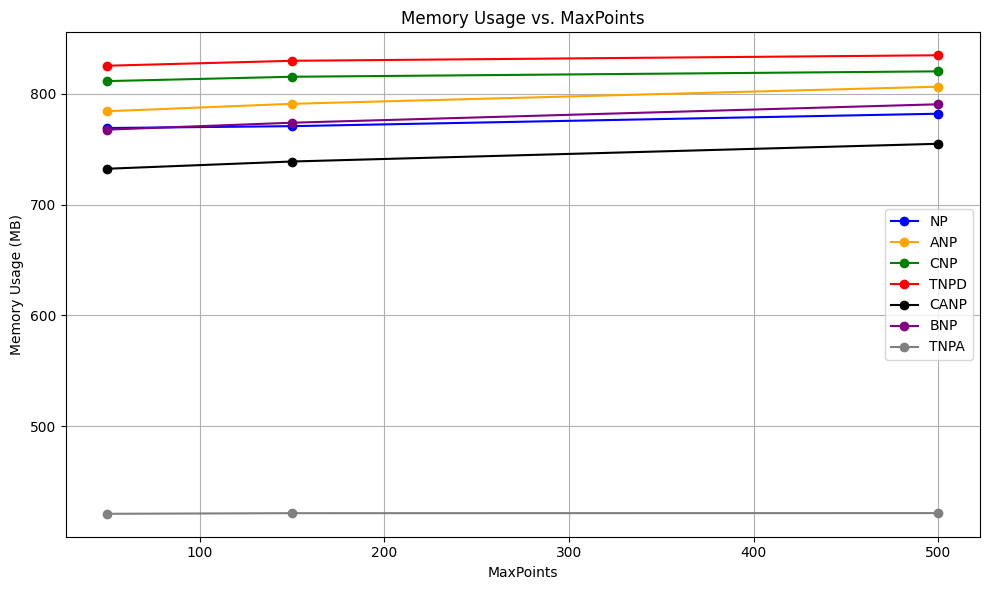

In [7]:
import matplotlib.pyplot as plt

models = ['NP', 'ANP', 'CNP', 'TNPD', 'CANP', 'BNP', 'TNPA']#BANP, TNPA 'LBANP8']
colors = ['blue', 'orange', 'green', 'red', 'black', 'purple' ,'grey', 'yellow']

plt.figure(figsize=(10, 6))

for model, color in zip(models, colors):
    plt.plot(mod_track['MaxPoints'], mod_track[f'{model}_Memory'], marker='o', color=color, label=model)

plt.title('Memory Usage vs. MaxPoints')
plt.xlabel('MaxPoints')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

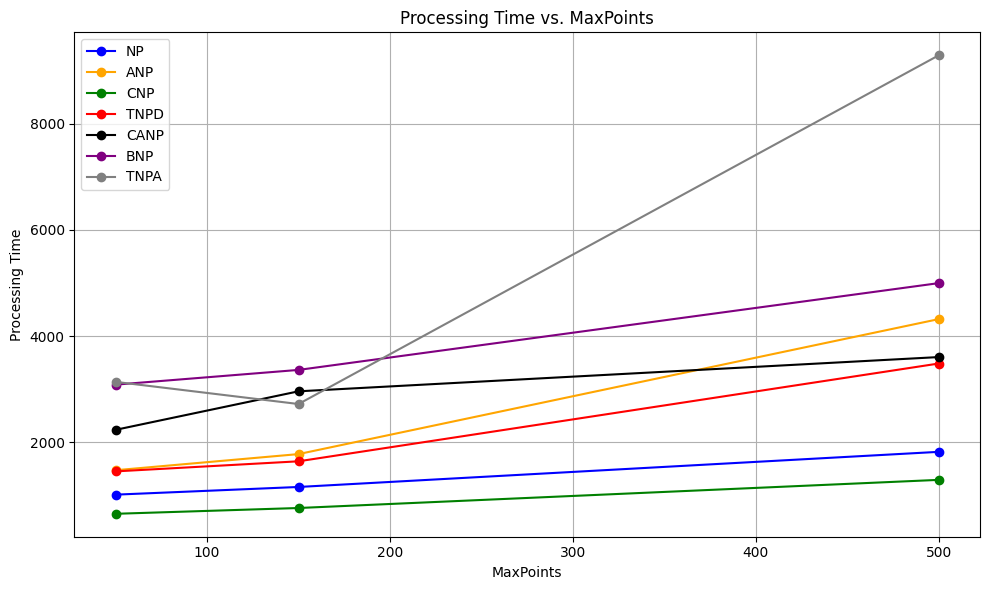

In [8]:
models = ['NP', 'ANP', 'CNP', 'TNPD', 'CANP', 'BNP', 'TNPA']#BANP, TNPA 'LBANP8']
colors = ['blue', 'orange', 'green', 'red', 'black', 'purple' ,'grey', 'yellow']


plt.figure(figsize=(10, 6))

for model, color in zip(models, colors):
    plt.plot(mod_track['MaxPoints'], mod_track[f'{model}_Time'], marker='o', color=color, label=model)

plt.title('Processing Time vs. MaxPoints')
plt.xlabel('MaxPoints')
plt.ylabel('Processing Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

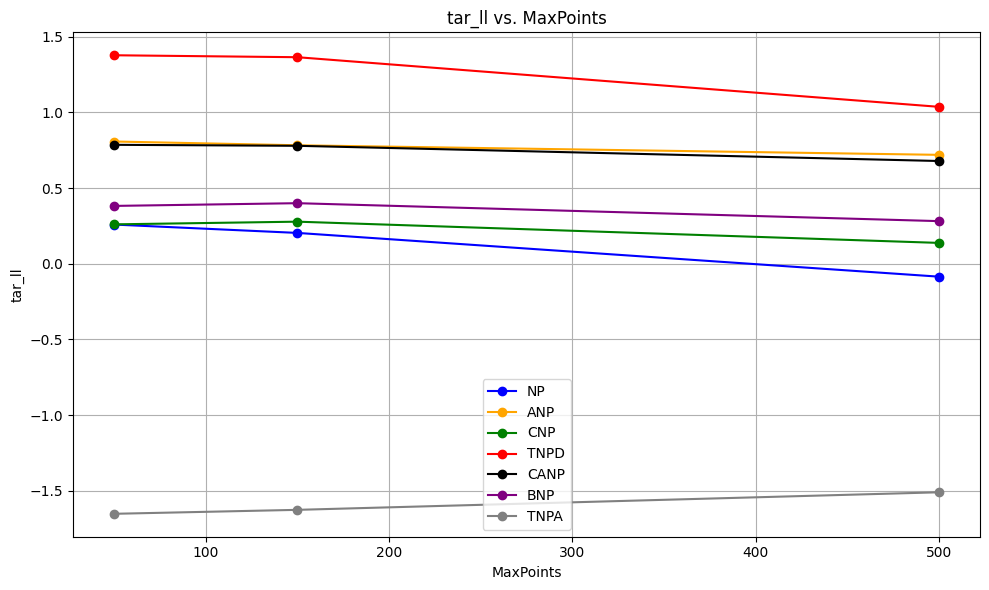

In [9]:
models = ['NP', 'ANP', 'CNP', 'TNPD', 'CANP', 'BNP', 'TNPA']#BANP, TNPA 'LBANP8']
colors = ['blue', 'orange', 'green', 'red', 'black', 'purple' ,'grey', 'yellow']


plt.figure(figsize=(10, 6))

for model, color in zip(models, colors):
    plt.plot(mod_track['MaxPoints'], mod_track[f'{model}_tar_ll'], marker='o', color=color, label=model)

plt.title('tar_ll vs. MaxPoints')
plt.xlabel('MaxPoints')
plt.ylabel('tar_ll')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Testing for different values of L

In [1]:
%reset -f
import time
import psutil

for l_vals in [8, 64, 128]:
    
    #start track execution time
    start_time = time.time()
    #starttrack memory
    process1 = psutil.Process()
    memory_usage1 = process1.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage1, "MB")


    #run model:
    %run gp.py --mode train --expid lbanp-num_latents-8 --model lbanp --num_latents {l_vals} --max_num_points 150 --num_steps 50000

    #track time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    #track memory
    process2 = psutil.Process()
    memory_usage2 = process2.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage2, "MB")
    print("Memory usage:", memory_usage2-memory_usage1, "MB")

Memory usage: 68.3984375 MB
Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


Experiment: lbanp-lbanp-num_latents-8
Total number of parameters: 784834



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


lbanp:lbanp-num_latents-8 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6614 loss 0.6614 (14.634 secs)
lbanp:lbanp-num_latents-8 step 400 lr 4.999e-04 [train_loss] tar_ll -0.5650 loss 0.5650 (14.052 secs)
lbanp:lbanp-num_latents-8 step 600 lr 4.998e-04 [train_loss] tar_ll -0.4314 loss 0.4314 (13.744 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.997e-04 [train_loss] tar_ll -0.2684 loss 0.2684 (14.572 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 4.995e-04 [train_loss] tar_ll -0.0248 loss 0.0248 (14.086 secs)
lbanp:lbanp-num_latents-8 step 1200 lr 4.993e-04 [train_loss] tar_ll -0.0134 loss 0.0134 (14.410 secs)
lbanp:lbanp-num_latents-8 step 1400 lr 4.990e-04 [train_loss] tar_ll 0.1698 loss -0.1698 (14.357 secs)
lbanp:lbanp-num_latents-8 step 1600 lr 4.987e-04 [train_loss] tar_ll 0.2980 loss -0.2980 (14.476 secs)
lbanp:lbanp-num_latents-8 step 1800 lr 4.984e-04 [train_loss] tar_ll 0.4493 loss -0.4493 (14.485 secs)
lbanp:lbanp-num_latents-8 step 2000 lr 4.980e-04 [train_loss] tar_ll 0.3759 l

Execution time: 4457.026439905167 seconds
Memory usage: 744.46484375 MB
Memory usage: 676.06640625 MB
Memory usage: 744.46484375 MB
Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


lbanp:lbanp-num_latents-8 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6771 loss 0.6771 (14.885 secs)
lbanp:lbanp-num_latents-8 step 400 lr 4.999e-04 [train_loss] tar_ll -0.5786 loss 0.5786 (14.948 secs)
lbanp:lbanp-num_latents-8 step 600 lr 4.998e-04 [train_loss] tar_ll -0.5062 loss 0.5062 (14.820 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.997e-04 [train_loss] tar_ll -0.3057 loss 0.3057 (14.717 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 4.995e-04 [train_loss] tar_ll -0.0813 loss 0.0813 (15.078 secs)
lbanp:lbanp-num_latents-8 step 1200 lr 4.993e-04 [train_loss] tar_ll -0.0839 loss 0.0839 (14.900 secs)
lbanp:lbanp-num_latents-8 step 1400 lr 4.990e-04 [train_loss] tar_ll 0.1923 loss -0.1923 (14.672 secs)
lbanp:lbanp-num_latents-8 step 1600 lr 4.987e-04 [train_loss] tar_ll 0.2882 loss -0.2882 (14.663 secs)
lbanp:lbanp-num_latents-8 step 1800 lr 4.984e-04 [train_loss] tar_ll 0.5115 loss -0.5115 (14.716 secs)
lbanp:lbanp-num_latents-8 step 2000 lr 4.980e-04 [train_loss] tar_ll 0.3573 l

Execution time: 4547.074417114258 seconds
Memory usage: 748.92578125 MB
Memory usage: 4.4609375 MB
Memory usage: 748.92578125 MB
Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


lbanp:lbanp-num_latents-8 step 200 lr 5.000e-04 [train_loss] tar_ll -0.6496 loss 0.6496 (15.756 secs)
lbanp:lbanp-num_latents-8 step 400 lr 4.999e-04 [train_loss] tar_ll -0.5962 loss 0.5962 (14.930 secs)
lbanp:lbanp-num_latents-8 step 600 lr 4.998e-04 [train_loss] tar_ll -0.5153 loss 0.5153 (15.248 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.997e-04 [train_loss] tar_ll -0.3377 loss 0.3377 (15.282 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 4.995e-04 [train_loss] tar_ll -0.0407 loss 0.0407 (15.400 secs)
lbanp:lbanp-num_latents-8 step 1200 lr 4.993e-04 [train_loss] tar_ll -0.0175 loss 0.0175 (15.090 secs)
lbanp:lbanp-num_latents-8 step 1400 lr 4.990e-04 [train_loss] tar_ll 0.2219 loss -0.2219 (15.446 secs)
lbanp:lbanp-num_latents-8 step 1600 lr 4.987e-04 [train_loss] tar_ll 0.3589 loss -0.3589 (15.061 secs)
lbanp:lbanp-num_latents-8 step 1800 lr 4.984e-04 [train_loss] tar_ll 0.6056 loss -0.6056 (14.958 secs)
lbanp:lbanp-num_latents-8 step 2000 lr 4.980e-04 [train_loss] tar_ll 0.5740 l

Execution time: 6251.444495677948 seconds
Memory usage: 752.765625 MB
Memory usage: 3.83984375 MB


In [13]:
mod_track={
    'l': [8, 64, 128],
    'memory': [744.46484375,748.92578125, 752.765625],
    'time':[4457.026439905167,4547.074417114258,6251.444495677948],
    'tar_ll': [1.1506,1.2820,1.2664], 
    'loss': [-1.1506,-1.2820,-1.2664],
    'parameters':[784834,788418,792514]
}

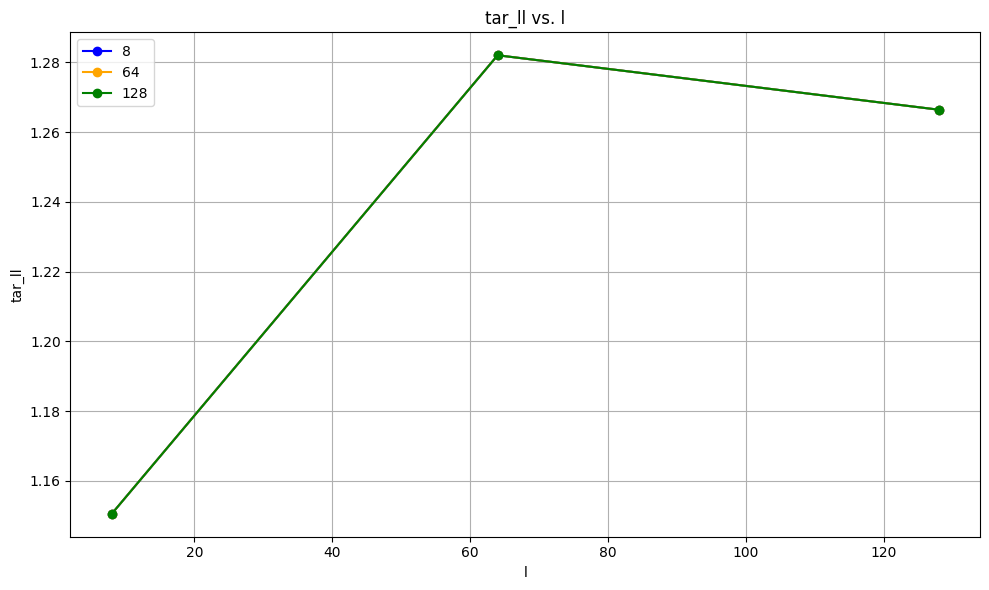

In [14]:
latentes = [8,64,128]#, 'LBANP8']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 6))

for model, color in zip(latentes, colors):
    plt.plot(mod_track['l'], mod_track['tar_ll'], marker='o', color=color, label=model)

plt.title('tar_ll vs. l')
plt.xlabel('l')
plt.ylabel('tar_ll')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

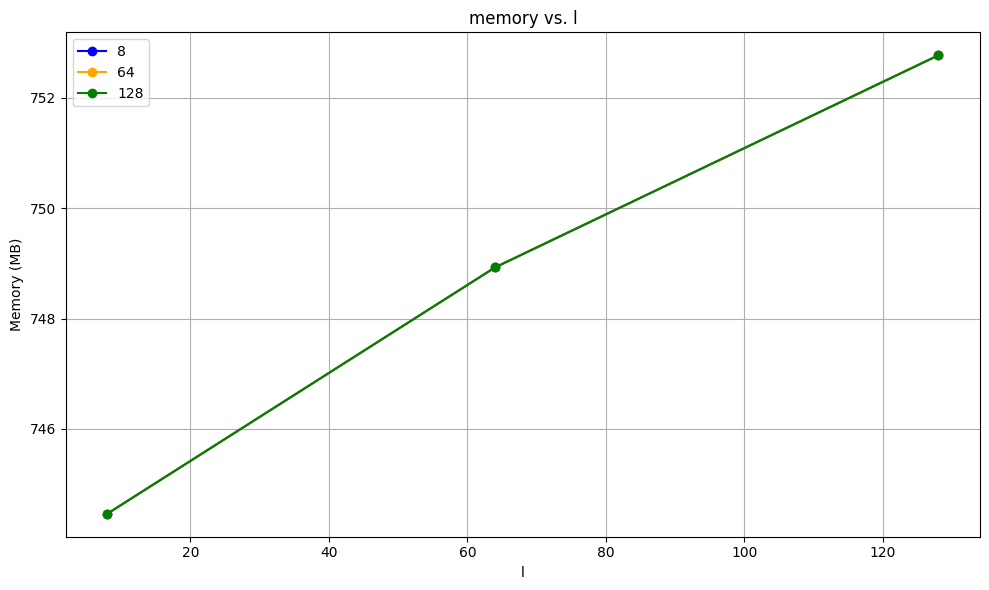

In [15]:
latentes = [8,64,128]#, 'LBANP8']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 6))

for model, color in zip(latentes, colors):
    plt.plot(mod_track['l'], mod_track['memory'], marker='o', color=color, label=model)

plt.title('memory vs. l')
plt.xlabel('l')
plt.ylabel('Memory (MB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
%reset -f
import time
import psutil

for l_vals in [8]:
    
    #start track execution time
    start_time = time.time()
    #starttrack memory
    process1 = psutil.Process()
    memory_usage1 = process1.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage1, "MB")


    #run model:
    %run gp.py --mode train --expid lbanp-num_latents-8 --model lbanp --num_latents {l_vals} --num_steps 1000

    #track time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    #track memory
    process2 = psutil.Process()
    memory_usage2 = process2.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage2, "MB")
    print("Memory usage:", memory_usage2-memory_usage1, "MB")

Experiment: lbanp-lbanp-num_latents-8
Experiment: lbanp-lbanp-num_latents-8
Total number of parameters: 784834

Total number of parameters: 784834



Memory usage: 711.80078125 MB
Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


lbanp:lbanp-num_latents-8 step 200 lr 4.523e-04 [train_loss] tar_ll -0.7144 loss 0.7144 (24.254 secs)
lbanp:lbanp-num_latents-8 step 200 lr 4.523e-04 [train_loss] tar_ll -0.7144 loss 0.7144 (24.254 secs)
lbanp:lbanp-num_latents-8 step 400 lr 3.273e-04 [train_loss] tar_ll -0.6606 loss 0.6606 (22.494 secs)
lbanp:lbanp-num_latents-8 step 400 lr 3.273e-04 [train_loss] tar_ll -0.6606 loss 0.6606 (22.494 secs)
lbanp:lbanp-num_latents-8 step 600 lr 1.727e-04 [train_loss] tar_ll -0.5683 loss 0.5683 (22.777 secs)
lbanp:lbanp-num_latents-8 step 600 lr 1.727e-04 [train_loss] tar_ll -0.5683 loss 0.5683 (22.777 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.775e-05 [train_loss] tar_ll -0.5182 loss 0.5182 (22.724 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.775e-05 [train_loss] tar_ll -0.5182 loss 0.5182 (22.724 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 0.000e+00 [train_loss] tar_ll -0.4858 loss 0.4858 (24.603 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 0.000e+00 [train_loss] tar_ll -0.4858 loss

Execution time: 237.14434790611267 seconds
Memory usage: 744.52734375 MB
Memory usage: 32.7265625 MB


In [4]:
%reset -f
import time
import psutil

for l_vals in [8]:
    
    #start track execution time
    start_time = time.time()
    #starttrack memory
    process1 = psutil.Process()
    memory_usage1 = process1.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage1, "MB")


    #run model:
    %run gp.py --mode train --expid lbanp-num_latents-8 --model lbanp --num_latents {l_vals} --num_steps 1000

    #track time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    #track memory
    process2 = psutil.Process()
    memory_usage2 = process2.memory_info().rss / 1024 / 1024  # in MB
    print("Memory usage:", memory_usage2, "MB")
    print("Memory usage:", memory_usage2-memory_usage1, "MB")

Memory usage: 1008.52734375 MB
Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


Experiment: lbanp-lbanp-num_latents-8
Total number of parameters: 784834



/rds/user/fz287/hpc-work/MLMI4/evalsets\gp
rbf-seed0.tar


lbanp:lbanp-num_latents-8 step 200 lr 4.523e-04 [train_loss] tar_ll -0.7552 loss 0.7552 (23.039 secs)
lbanp:lbanp-num_latents-8 step 400 lr 3.273e-04 [train_loss] tar_ll -0.6494 loss 0.6494 (21.714 secs)
lbanp:lbanp-num_latents-8 step 600 lr 1.727e-04 [train_loss] tar_ll -0.5708 loss 0.5708 (21.830 secs)
lbanp:lbanp-num_latents-8 step 800 lr 4.775e-05 [train_loss] tar_ll -0.5670 loss 0.5670 (22.549 secs)
lbanp:lbanp-num_latents-8 step 1000 lr 0.000e+00 [train_loss] tar_ll -0.5620 loss 0.5620 (26.165 secs)
100%|##########| 3000/3000 [01:57<00:00, 25.44it/s]
lbanp:lbanp-num_latents-8 rbf tar_ll -0.5588 loss 0.5588 (117.912 secs)


Execution time: 236.12142848968506 seconds
Memory usage: 815.8515625 MB
Memory usage: -192.67578125 MB


# INFERENCE TESTS

In [14]:
  # Define the directory path
import os
directory = "/rds/user/fz287/hpc-work/MLMI4/results/gp/"
# List files in the directory
files = os.listdir(directory)
# Print the list of files
for file in files:
    print(file)

anp
banp
bnp
canp
cnp
isanp
lbanp
np
tnpa
tnpd


In [ ]:
directory = "/rds/user/fz287/hpc-work/MLMI4/results/gp/"
# List files in the directory
files = os.listdir(directory)
# Print the list of files
for file in files:
    print(file)

In [25]:
import os
import torch

def load_saved_model(model_name, lbanp_latents=None):
  # Define the directory path
    if lbanp_latents==None:
        directory = "/rds/user/fz287/hpc-work/MLMI4/results/gp/"+model_name+"/"+model_name
    else:
        directory = "/rds/user/fz287/hpc-work/MLMI4/results/gp/"+model_name+"/"+model_name+"-num_latents-"+str(lbanp_latents)
    
    args={
    'model':model_name,
    # LBANP Arguments
    'num_latents':lbanp_latents,
    'num_latents_per_layer':8,
    'd_model':64,
    'emb_depth':4,
    'dim_feedforward':128,
    'nhead':4,
    'dropout':0.0,
    'num_layers':6,
    # OOD settings
    'eval_kernel':'rbf',
    't_noise':None,
    }
    
    model_cls = getattr(load_module(f'models/'+args['model']+'.py'), args['model'].upper())

    with open(f'configs/gp/'+args['model']+'.yaml', 'r') as f:
        config = yaml.safe_load(f)

    print(config)

    for key, val in args.items(): # Override the default arguments
        if key in config:
            config[key] = val
            print(f"Overriding argument {key}: {config[key]}")
    
    model = model_cls(**config)
    model.cuda()
    

    # Define the path to the checkpoint file
    checkpoint_path = directory+'/ckpt.tar'
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path)
    # Access the model state from the loaded checkpoint
    model_state = checkpoint['model']
    # Assuming you have already created your model object, load the model state
    model.load_state_dict(model_state)
    return model

In [26]:
modelito=load_saved_model(model_name='np', lbanp_latents=None)

{'dim_x': 1, 'dim_y': 1, 'dim_hid': 128, 'dim_lat': 128, 'enc_pre_depth': 4, 'enc_post_depth': 2, 'dec_depth': 3}


In [ ]:
#--num_ctx 10 --num_tar 10
train_seed

In [2]:
%run gp.py --mode eval --expid lbanp-num_latents-8 --model lbanp --num_latents 8 --custom_eval True --num_ctx 10 --num_tar 10

Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   None None


100%|##########| 3000/3000 [00:06<00:00, 456.88it/s]


Starting evaluation


100%|##########| 3000/3000 [01:11<00:00, 41.74it/s]
lbanp:lbanp-num_latents-8 rbf tar_ll -0.5588 loss 0.5588 (71.873 secs)
lbanp:lbanp-num_latents-8 rbf tar_ll -0.5588 loss 0.5588 (71.873 secs)


Execution time: 71873.43978881836 miliseconds
EVal has finished


In [8]:
%run gp_track.py --mode eval --expid lbanp-num_latents-8 --model tnpd --custom_eval True --num_tar 10 --num_ctx 10 

Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   10 10


100%|##########| 3000/3000 [00:06<00:00, 487.63it/s]


Starting evaluation


C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\cuda\memory.py:303: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
100%|##########| 3000/3000 [00:17<00:00, 173.62it/s]
tnpd:lbanp-num_latents-8 rbf tar_ll 0.6120 loss -0.6120 (17.296 secs)


Execution time: 17278.765625 miliseconds
Execution time: 5.759588541666667 miliseconds per batch
Initial Memory Usage: 21.24951171875 MB
Final Memory Usage: 21.8818359375 MB
Memory Usage Change: 0.63232421875 MB
Memory Usage Change: 0.00021077473958333332 MB
Eval has finished


In [3]:
%run gp_track.py --mode prof --expid lbanp-num_latents-8 --model tnpd --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1 --eval_batch_size 10 --eval_num_samples 20

Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6


TypeError: eval() takes 2 positional arguments but 3 were given

In [2]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [6]:
%run gp_track.py --mode prof --expid lbanp-num_latents-8 --model tnpd --custom_eval True --num_tar 10 --num_ctx 100 --eval_num_batches 1 --eval_batch_size 10

Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
Starting evaluation with 100 context points


100%|##########| 1/1 [00:00<00:00, 71.55it/s]

Evaluation with 100 context points has finished
Filename: C:\Users\jmlr9\OneDrive - University of Cambridge\Courses Material\MLMI 4 Advanced Machine Learning\Project\code\latent-bottlenecked-anp-main\latent-bottlenecked-anp-main\regression\gp_track.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   122    666.5 MiB    666.5 MiB           1   @profile
   123                                         def profile_memory(args, model, num_ctx):
   124    666.5 MiB      0.0 MiB           1       path, filename = get_eval_path(args)
   125    666.5 MiB      0.0 MiB           1       if not osp.isfile(osp.join(path, filename)):
   126                                                 print('generating evaluation sets...')
   127                                                 gen_evalset(args)
   128                                         
   129    666.5 MiB      0.0 MiB           1       print(f"Starting evaluation with {num_ctx} context points")
   130    666.5 MiB      0.0 M

In [12]:
%run gp_track.py --mode prof --expid lbanp-num_latents-128_matern --model lbanp --custom_eval True --num_tar 100 --num_ctx 100 --num_latents 128 

Overriding argument num_latents: 128
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
Starting evaluation with 100 context points


100%|##########| 1/1 [00:00<00:00, 26.10it/s]

Evaluation with 100 context points has finished
Filename: C:\Users\jmlr9\OneDrive - University of Cambridge\Courses Material\MLMI 4 Advanced Machine Learning\Project\code\latent-bottlenecked-anp-main\latent-bottlenecked-anp-main\regression\gp_track.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   122    683.8 MiB    683.8 MiB           1   @profile
   123                                         def profile_memory(args, model, num_ctx):
   124    683.8 MiB      0.0 MiB           1       path, filename = get_eval_path(args)
   125    683.8 MiB      0.0 MiB           1       if not osp.isfile(osp.join(path, filename)):
   126                                                 print('generating evaluation sets...')
   127                                                 gen_evalset(args)
   128                                         
   129    683.8 MiB      0.0 MiB           1       print(f"Starting evaluation with {num_ctx} context points")
   130    683.8 MiB      0.0 M

In [5]:
%run gp_track.py --mode prof --expid lbanp-num_latents-8 --model tnpd --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1 --eval_batch_size 10 --eval_num_samples 20

Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
Starting evaluation with 10 context points


  0%|          | 0/3000 [00:00<?, ?it/s]C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\transformer.py:562: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ..\aten\src\ATen\native\transformers\attention.cpp:152.)
  return torch._transformer_encoder_layer_fwd(
100%|##########| 3000/3000 [00:27<00:00, 110.88it/s]

Evaluation with 10 context points has finished
Filename: C:\Users\jmlr9\OneDrive - University of Cambridge\Courses Material\MLMI 4 Advanced Machine Learning\Project\code\latent-bottlenecked-anp-main\latent-bottlenecked-anp-main\regression\gp_track.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   122    763.2 MiB    763.2 MiB           1   @profile
   123                                         def profile_memory(args, model, num_ctx):
   124    763.2 MiB      0.0 MiB           1       path, filename = get_eval_path(args)
   125    763.2 MiB      0.0 MiB           1       if not osp.isfile(osp.join(path, filename)):
   126                                                 print('generating evaluation sets...')
   127                                                 gen_evalset(args)
   128                                         
   129    763.2 MiB      0.0 MiB           1       print(f"Starting evaluation with {num_ctx} context points")
   130    783.3 MiB     20.1 Mi

In [5]:
%run gp_track.py --mode eval --expid lbanp-num_latents-8 --model lbanp --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1

Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   10 10


100%|##########| 1/1 [00:00<00:00, 368.60it/s]


Starting evaluation


100%|##########| 1/1 [00:00<00:00, 37.96it/s]
lbanp:lbanp-num_latents-8 rbf tar_ll -0.4332 loss 0.4332 (0.031 secs)


Execution time: 0.21196800470352173 miliseconds
Initial Memory Usage: 20.41259765625 MB
Final Memory Usage: 20.56884765625 MB
Memory Usage Change: 0.15625 MB
Eval has finished


In [8]:
%run gp_track.py --mode eval --expid lbanp-num_latents-8 --model lbanp --num_latents 8 --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1

Overriding argument num_latents: 8
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   10 10


100%|##########| 1/1 [00:00<00:00, 500.16it/s]


Starting evaluation


100%|##########| 1/1 [00:00<00:00, 13.89it/s]
lbanp:lbanp-num_latents-8 rbf tar_ll -0.4332 loss 0.4332 (0.073 secs)


Memory used for inference: 0.00244140625 MB
Eval has finished


In [3]:
%run gp_track.py --mode eval --expid lbanp-num_latents-64_rbf --model lbanp --num_latents 64 --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1

Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   10 10


100%|##########| 1/1 [00:00<00:00, 334.69it/s]


Starting evaluation


100%|##########| 1/1 [00:00<00:00, 14.04it/s]
lbanp:lbanp-num_latents-64_rbf rbf tar_ll 0.8357 loss -0.8357 (0.074 secs)


Memory used for inference: 0.00244140625 MB
Eval has finished


In [3]:
%run gp_track.py --mode eval --expid lbanp-num_latents-64_rbf --model lbanp --num_latents 64 --custom_eval True --num_tar 10 --num_ctx 1000 --eval_num_batches 1

Overriding argument num_latents: 64
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   1000 10


100%|##########| 1/1 [00:00<00:00,  3.51it/s]


Starting evaluation


100%|##########| 1/1 [00:00<00:00, 10.32it/s]
lbanp:lbanp-num_latents-64_rbf rbf tar_ll 2.3701 loss -2.3701 (0.099 secs)


Memory used for inference: 0.00244140625 MB
Memory used for inference: 0.0009765625 MB
Eval has finished


In [4]:
%run gp_track.py --mode eval --expid tnpa_matern --model tnpa --custom_eval True --num_tar 10 --num_ctx 10 --eval_num_batches 1

Overriding argument pretrain: False
Overriding argument d_model: 64
Overriding argument emb_depth: 4
Overriding argument dim_feedforward: 128
Overriding argument nhead: 4
Overriding argument dropout: 0.0
Overriding argument num_layers: 6
True
generating evaluation sets...
Generating Evaluation Sets with rbf kernel
Generating Evaluation sets with context and target points:   10 10


100%|##########| 1/1 [00:00<00:00, 523.76it/s]


Starting evaluation


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\jmlr9\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\transformer.py:562: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ..\aten\src\ATen\native\transformers\attention.cpp:152.)
  return torch._transformer_encoder_layer_fwd(
100%|##########| 1/1 [00:00<00:00, 19.60it/s]
tnpa:tnpa_matern rbf tar_ll 1.1956 loss -1.1956 (0.052 secs)


Memory used for inference: 0.0009765625 MB
Eval has finished
